<p style="color:#003399; background-color:#ffcc00; padding: 20px; font-size: 26px">Download the IKEA furniture database.</p><p>Загрузите базу данных мебели ИКЕА.</p>

<h2 style="color:#003399">Import libraries</h2>

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import math
import sklearn as skl
import re

<h2 style="color:#003399">Import dataset</h2>

<img src="ikea-logo.png">

In [164]:
pd.options.display.float_format = "{:.2f}".format
ikea = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col=0).drop_duplicates()
ikea.head()

item_id                   name       category   price     old_price  \
0  90420332               FREKVENS  Bar furniture  265.00  No old price   
1    368814              NORDVIKEN  Bar furniture  995.00  No old price   
2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture 2095.00  No old price   
3  80155205                   STIG  Bar furniture   69.00  No old price   
4  30180504                NORBERG  Bar furniture  225.00  No old price   

   sellable_online                                               link  \
0             True  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...   
1            False  https://www.ikea.com/sa/en/p/nordviken-bar-tab...   
2            False  https://www.ikea.com/sa/en/p/nordviken-nordvik...   
3             True  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...   
4             True  https://www.ikea.com/sa/en/p/norberg-wall-moun...   

  other_colors                                  short_description  \
0           No           Bar table, in/outdoor,          51x51 cm   
1           No                      Bar table,          140x80 cm   
2           No                         Bar table and 4 bar stools   
3          Yes            Bar stool with backrest,          74 cm   
4           No          Wall-mounted drop-leaf table,         ...   

               designer  depth  height  width  
0  Nicholai Wiig Hansen    NaN   99.00  51.00  
1     Francis Cayouette    NaN  105.00  80.00  
2     Francis Cayouette    NaN     NaN    NaN  
3         Henrik Preutz  50.00  100.00  60.00  
4        Marcus Arvonen  60.00   43.00  74.00

<p style="color:#003399; background-color:#ffcc00; padding: 20px; font-size: 26px">Perform exploratory data analysis on the dataset, including descriptive statistics and visualizations. Describe the results.</p><p>Выполните исследовательский анализ данных для набора данных, включая описательную статистику и визуализацию. Опишите результаты.</p>

In [165]:
ikea.shape

(3694, 13)

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">We can see that there are 3694 instances and 13 attributes in the data set.</p>

In [166]:
ikea.size

48022

<div style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">
    <p>Content</p>
    <ul>
        <li>$item\_id$ : item id wich can be used later to merge with other IKEA dataframes</li>
        <li>$name$ : the commercial name of collection </li>
        <li>$category$:the furniture category that the item belongs to (Sofas, beds, chairs, Trolleys,…)</li>
        <li>$price$: the current price in Saudi Riyals as it is shown in the website</li>
        <li>$old\_price$: the price of item in Saudi Riyals before discount</li>
        <li>$short\_description$: a brief description of the item</li>
        <li>$designer$: The name of the designer who designed the item.</li>
        <li>$width$ : Width of the item in Centimeter</li>
        <li>$height$ : Height of the item in Centimeter</li>
        <li>$depth$ : Depth of the item in Centimeter</li>
        <li>$sellable\_online$ : if the item is available for online purchasing or in-stores only (Boolean)</li>
        <li>$other\_colors$ : if other colors are available for the item, or just one color as displayed in the website   (Boolean)</li>
        <li>$link$ : the web link of the item</li>
    </ul>
</div>

In [167]:
ikea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


In [168]:
ikea.describe()

item_id   price   depth  height   width
count     3694.00 3694.00 2231.00 2706.00 3105.00
mean  48632396.79 1078.21   54.38  101.68  104.47
std   28887094.10 1374.65   29.96   61.10   71.13
min      58487.00    3.00    1.00    1.00    1.00
25%   20390574.00  180.90   38.00   67.00   60.00
50%   49288078.00  544.70   47.00   83.00   80.00
75%   70403572.75 1429.50   60.00  124.00  140.00
max   99932615.00 9585.00  257.00  700.00  420.00

In [169]:
import warnings
warnings.filterwarnings("ignore")
def countanalyse(plott, table, arr, a, b, name, hue):
    fig, axes = plt.subplots(figsize=(24,a*7))
    fig.suptitle(name,fontsize=30)
    for  i, el in enumerate(arr):
        plt.subplot(a, b, i+1)
        plt.xticks(rotation=90)
        if type(el) == str:
            plt.title(el,  fontsize=20)
        else:
            plt.title(el.name,   fontsize=20)
        sns.set(context='talk',style='white', palette='Set1',font_scale=1)
        if plott=='histplot_hue':
            sns.set(palette='Set1')
            sns.histplot(data=table, x=el, hue=hue)
        if plott=='histplot':
            sns.set(palette='Set1')
            sns.histplot(data=table, x=el)
        if plott == 'boxplot':
            sns.boxplot(data=table, x=el)
        if plott == 'barh':
            el.plot.barh()
        if plott == 'displot':
            sns.set(font_scale=1.5)
            z_score = stats.zscore(table[el].to_numpy(),ddof=0, nan_policy='omit')
            sns.distplot(table[el], color='#003399',label =  f'Z-score: {len(z_score[z_score>3]): .2f}\n'
                                                             f'Skewness: {table[el].dropna().skew():.2f}\n'
                                                             f'Kurtosis: {table[el].dropna().kurt():.2f}\n')
            plt.legend(loc = 'upper right', frameon=False)
        if plott == 'countplot':
            axes=sns.countplot(data=table, x=el, palette=sns.color_palette("Set1"))
            axes.bar_label(container=axes.containers[0], label_type='edge')
        if plott == 'countplot_hue':
            sns.countplot(data=table, x=el, hue=hue, palette=sns.color_palette("Set1",4))
        if plott == 'pie':
            explodes = tuple(0.1 for di in range(0, len(table[el].unique())))
            plt.pie(table[el].value_counts(), explode = explodes, labels=table[el].unique(), autopct='%1.1f%%',startangle=45)

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">There are a mixture of 8 categorical and  5 numerical variables in the dataset.</p>

<h2 style="color:#003399;text-decoration: underline" >CATEGORICAL</h2>

In [170]:
categorical_var = [var for var in ikea.columns if ikea[var].dtype==object]
print('The categorical variables are: {}'.format(categorical_var))

The categorical variables are: ['name', 'category', 'old_price', 'link', 'other_colors', 'short_description', 'designer']


In [171]:
for var in categorical_var:
    print(var, ' contains ', len(ikea[var].unique()), ' labels')

name  contains  607  labels
category  contains  17  labels
old_price  contains  365  labels
link  contains  2962  labels
other_colors  contains  2  labels
short_description  contains  1706  labels
designer  contains  381  labels


In [172]:
ikea[categorical_var].isnull().sum()

name                 0
category             0
old_price            0
link                 0
other_colors         0
short_description    0
designer             0
dtype: int64

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">There is no missing number in categorical variables</p>

In [173]:
for var in categorical_var:
    print(var, ikea[var].sort_values().unique()[10:15])

name ['ALVARET' 'ANGERSBY' 'ANTILOP' 'ANVÄNDBAR' 'ARKELSTORP']
category ['Room dividers' 'Sideboards, buffets & console tables'
 'Sofas & armchairs' 'TV & media furniture' 'Tables & desks']
old_price ['SR 1,120' 'SR 1,125' 'SR 1,145' 'SR 1,150' 'SR 1,180']
link ['https://www.ikea.com/sa/en/p/aepplaroe-corner-section-outdoor-brown-stained-brown-50205179/'
 'https://www.ikea.com/sa/en/p/aepplaroe-drop-leaf-table-outdoor-brown-stained-brown-40208531/'
 'https://www.ikea.com/sa/en/p/aepplaroe-easy-chair-outdoor-brown-stained-froesoen-duvholmen-dark-grey-s89259963/'
 'https://www.ikea.com/sa/en/p/aepplaroe-gateleg-table-for-wall-outdoor-brown-stained-80291731/'
 'https://www.ikea.com/sa/en/p/aepplaroe-gateleg-table-outdoor-brown-stained-brown-50208535/']
other_colors []
short_description ['        1 section/shelves,          89x50x179 cm'
 '        1 section/shelves/drawers,          48x30x179 cm'
 '        1 shelf section,          92x36x181 cm' '        1-seat module'
 '        1-seat sec

<h2 style="color:#003399">CATEGORY</h2>

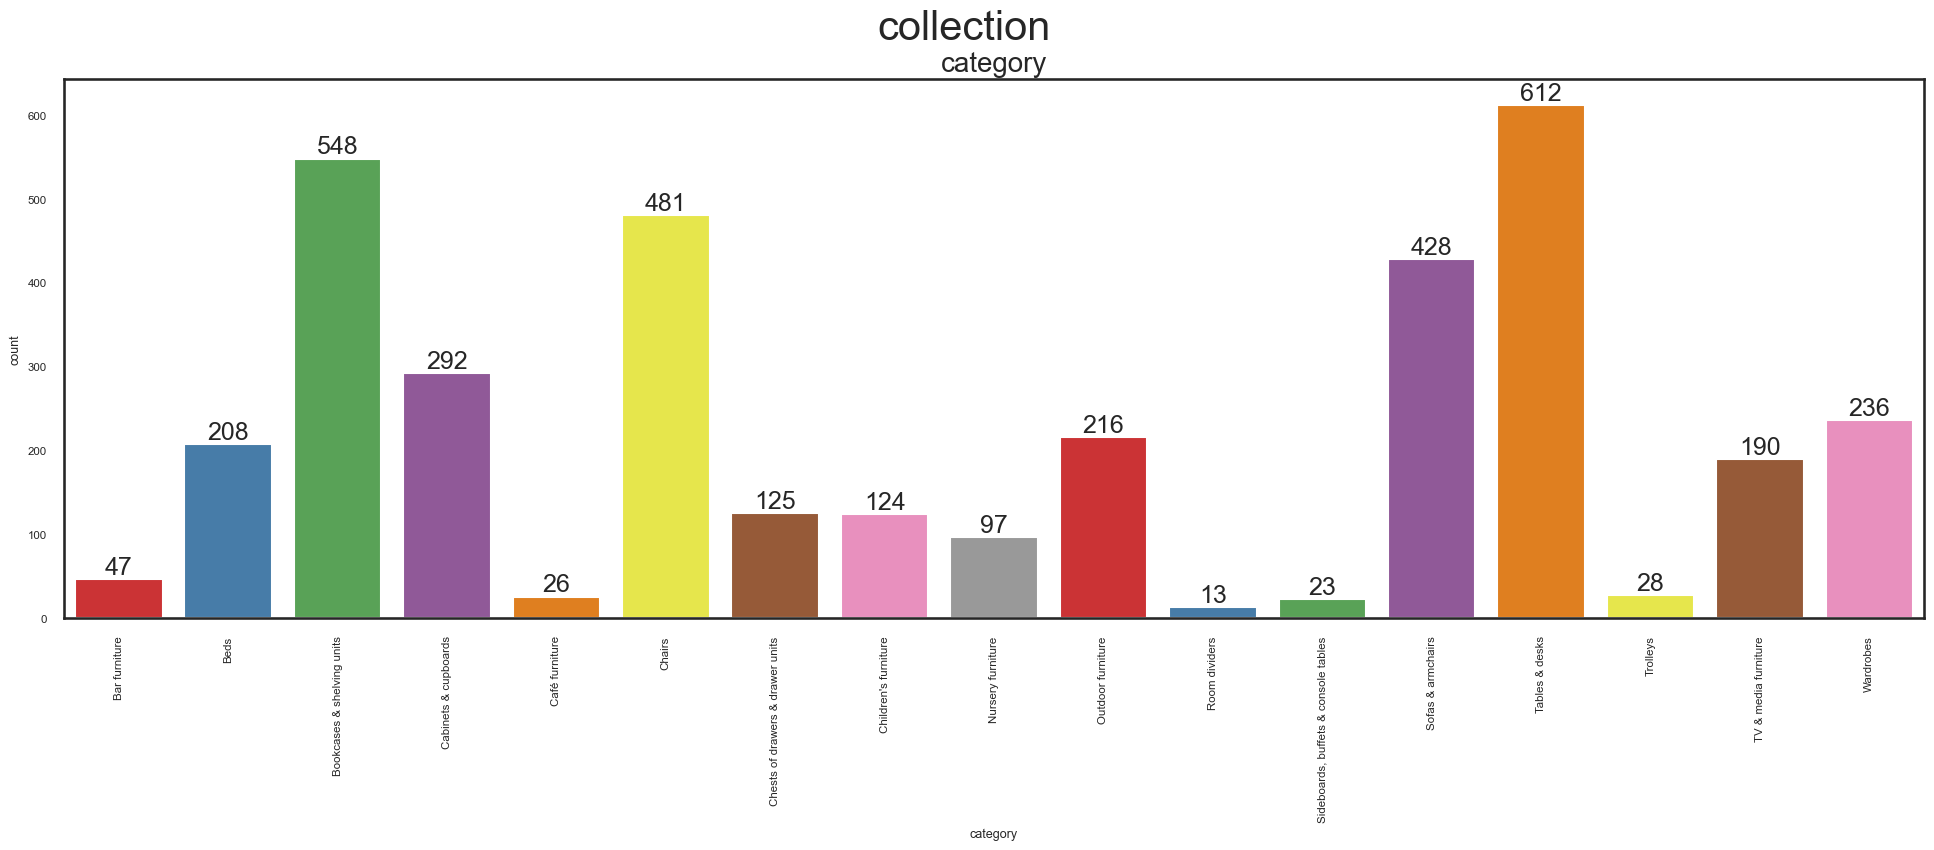

In [174]:
countanalyse('countplot', ikea, ['category'], 1,1, 'collection','')

<h2 style="color:#003399">COLLECTION</h2>

In [175]:
ikea.rename(columns={'name': 'collection'}, inplace=True)
ikea.columns

Index(['item_id', 'collection', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

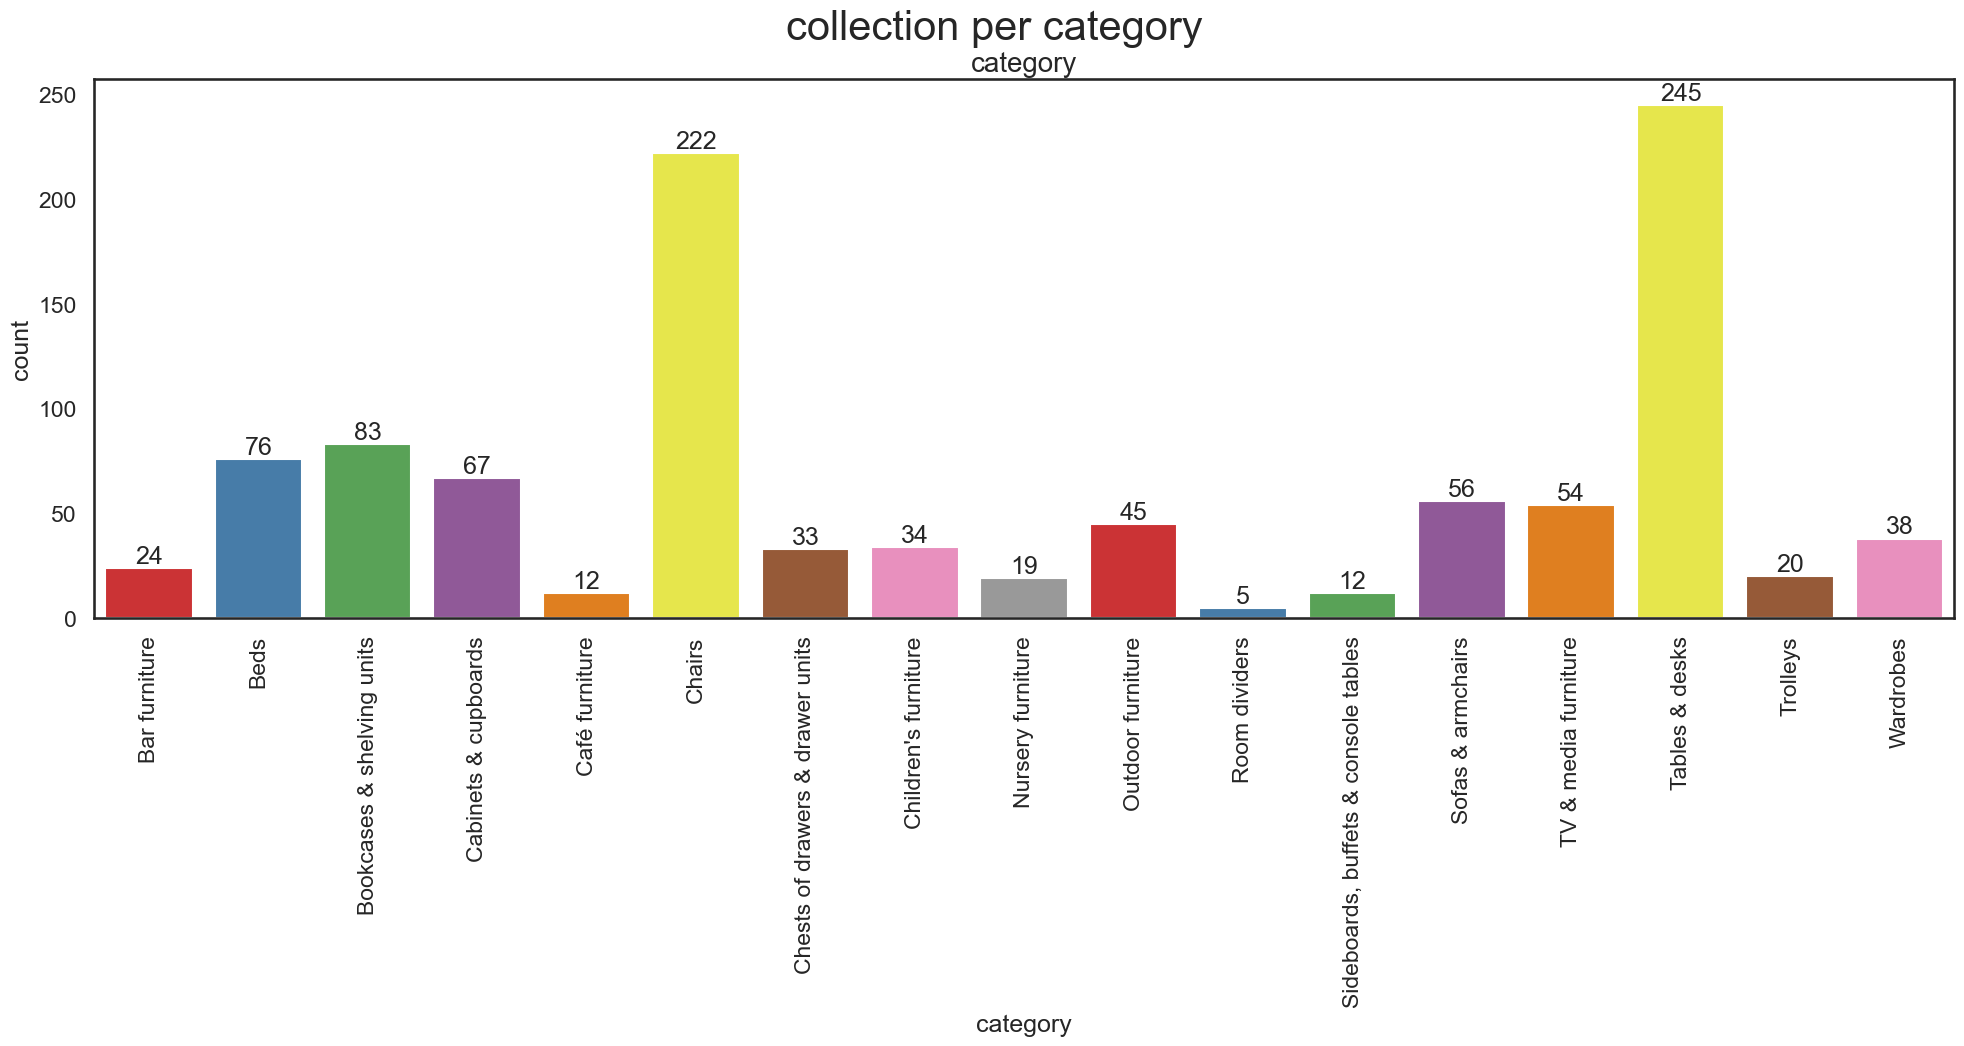

In [176]:
aa=ikea[["category","collection",'item_id']].groupby(["category","collection"]).count().reset_index()
countanalyse('countplot', aa, ['category'], 1,1, 'collection per category','')

In [177]:
#dropping not informative columns
ikea.drop(columns=['link'], inplace=True)

<h2 style="color:#003399">SHORT_DESCRIPTION</h2>

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">to decide which category to keep in each of the duplicate products, we will check the name of these products and which category they usually belong to. For this and further work with the data, we need to parse the 'short_description' column</p>
<p>для принятия решения какую из категорий оставить в каждом из дублированных товаров, мы проверим наименование этих товаров и к какой категории они обычно относятся. Для этого и дальнейшей работе с данными нам понадобится разобрать колонку 'short_description'</p>

In [178]:
a = ikea['short_description']
print(a.unique())

['        Bar table, in/outdoor,          51x51 cm'
 '        Bar table,          140x80 cm'
 '        Bar table and 4 bar stools' ...
 '        Wardrobe combination,          75x60x201 cm'
 '        Wardrobe combination,          200x66x236 cm'
 '        1 section,          92x51x222-350 cm']


<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">we see that it describes a specific product name, with dimensions. We will separate the data (we may need information about the sizes) we use information about the product for further work with the data and in building the model</p>
</p>видим, что в ней описывается конкретное наменование товара, с размерами. Разделим данные (возможно информация о размерах нам понадобится) информацию о товаре используем для дольнейшей работы с данными и в построении модели</p>

In [179]:
ikea[['size','cm']] = ikea['short_description'].str.extract(r'(,\s.*(mm|cm)$)', expand=False)

ikea['name']=ikea['short_description'].str.extract(r'([0-9]?.*[,\b])')
ikea['name'].fillna(ikea['short_description'].str.strip(), inplace=True)

ikea['size'] = ikea['size'].str.strip()
ikea['size'] = ikea['size'].str.replace(r'^.*,', '', regex=True).str.strip()
ikea['size'] = ikea['size'].str.replace(r'\s+(mm|cm)', '', regex=True).str.strip()

ikea['size'] = ikea['size'].str.replace(r'\s', 'x', regex=True)

ikea['name']=ikea['name'].str.strip()
ikea['name']=ikea['name'].replace(r'(,$)', '', regex=True)
ikea[['short_description','name', 'size','cm']].sort_values(by='name').head()

short_description  \
431           1 sec/storage unit w foldable table,  ...   
3653                   1 section,          44x55x216 cm   
3606                   1 section,          84x55x216 cm   
3689               1 section,          92x51x222-350 cm   
281                    1 section,          78x31x171 cm   

                                     name           size  cm  
431   1 sec/storage unit w foldable table  89x30-104x179  cm  
3653                            1 section      44x55x216  cm  
3606                            1 section      84x55x216  cm  
3689                            1 section  92x51x222-350  cm  
281                             1 section      78x31x171  cm

In [180]:
#dropping not informative columns
ikea.drop(columns=['short_description'], inplace=True)

<h2 style="color:#003399">REMOVE DUPLICATED ITEMS</h2>

In [181]:
ikea[ikea['item_id']==20330599]

item_id collection                    category  price     old_price  \
679   20330599    UPPLEVA  Bookcases & shelving units 199.00  No old price   
1088  20330599    UPPLEVA        Cabinets & cupboards 199.00  No old price   
3334  20330599    UPPLEVA        TV & media furniture 199.00  No old price   

      sellable_online other_colors  \
679              True           No   
1088             True           No   
3334             True           No   

                                               designer  depth  height  width  \
679   203.305.99 The TV-bracket can be angled for ch...    NaN     NaN    NaN   
1088  203.305.99 The TV-bracket can be angled for ch...    NaN     NaN    NaN   
3334  203.305.99 The TV-bracket can be angled for ch...    NaN     NaN    NaN   

     size   cm                    name  
679   NaN  NaN  Bracket for TV, swivel  
1088  NaN  NaN  Bracket for TV, swivel  
3334  NaN  NaN  Bracket for TV, swivel

<img src="ikea22.jpg">

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">After checking the data for a pair of random item_ids, we see that there are duplicate rows in our table that are duplicated in different categories. To build a model, we better get rid of duplicate products. The site shows that this product does not belong to any of our categories. ('Storage & organization')
remove all duplicates by excluding the category column from the check</p>
<p>Проверив данные по паре случайных item_id мы видим что в нашей таблице есть дублированные строки, которые дублируются в разных категориях. Для построения модели нам лучше избавиться от повторяющихся товаров. На сайте видно, что данный товар не относится ни к одной из имеющихся у нас категорий. ('Storage & organization')
удалим все дубликаты, исключив из проверки столбец сategory</p>

In [182]:
print('all item_id :',len(list(ikea['item_id'])))
print('unique item_id:',len(ikea['item_id'].unique()))
print('dublicated item_id:',len(list(ikea['item_id']))-len(ikea['item_id'].unique()))

all item_id : 3694
unique item_id: 2962
dublicated item_id: 732


In [183]:
list_items = ikea[ikea.duplicated(subset=['item_id'], keep=False)==False]['item_id']
list_duplicated=ikea[ikea.duplicated(subset=['item_id'], keep=False)==True]
list_names = ikea[ikea.duplicated(subset=['item_id'], keep=False)==True] ['name'].unique()

ikea_cat_nam = ikea.loc[list_items.index] #таблица товаров ikea без дубликатов
ikea_cat_nam = ikea_cat_nam[ikea_cat_nam['name'].apply(lambda x: x in list_names)] #только строки с именами как у дубликатов

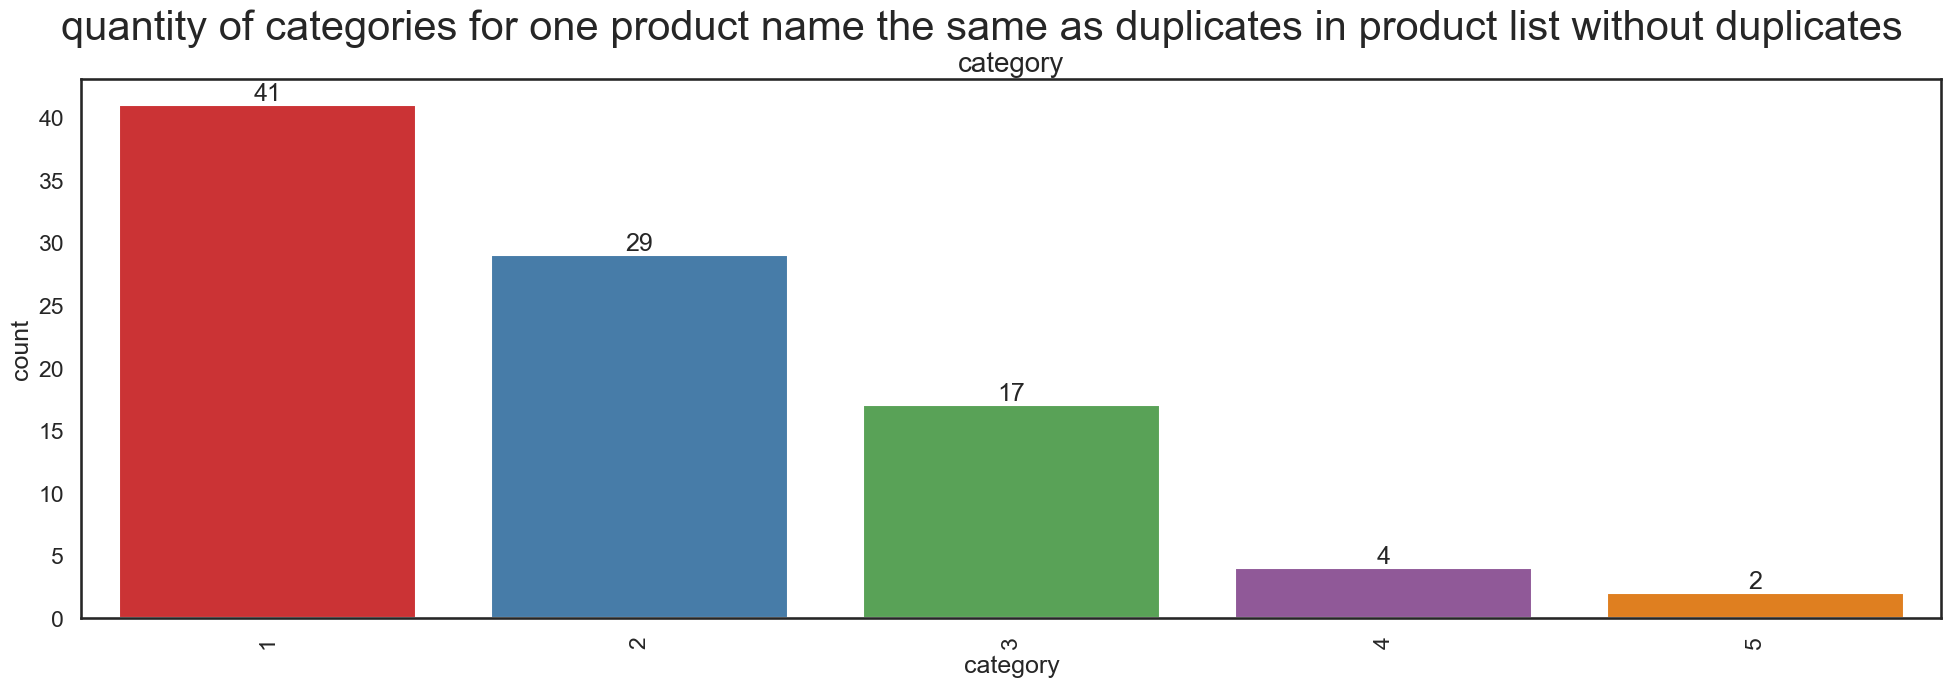

In [184]:
#групируем по 'name' и проверяем на кол-во уникальных категорий к которым они обычно относятся
ikea_cat_name = ikea_cat_nam[['name','category']].groupby(['name'])\
                                                 .agg(lambda x: len(x.unique()))\
                                                 .sort_values(by='category', ascending=False).reset_index()
countanalyse('countplot', ikea_cat_name, ['category'], 1,1, 'quantity of categories for one product name the same as duplicates in product list without duplicates','')

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">41 product names are usually found in only one category, we will display these categories and replace them in duplicates
52 in different categories</p>
<p>41 наименование товаров обычно находится только в одной категории, выведем эти категории и заменим в дупликатах
52 в разных категориях</p>

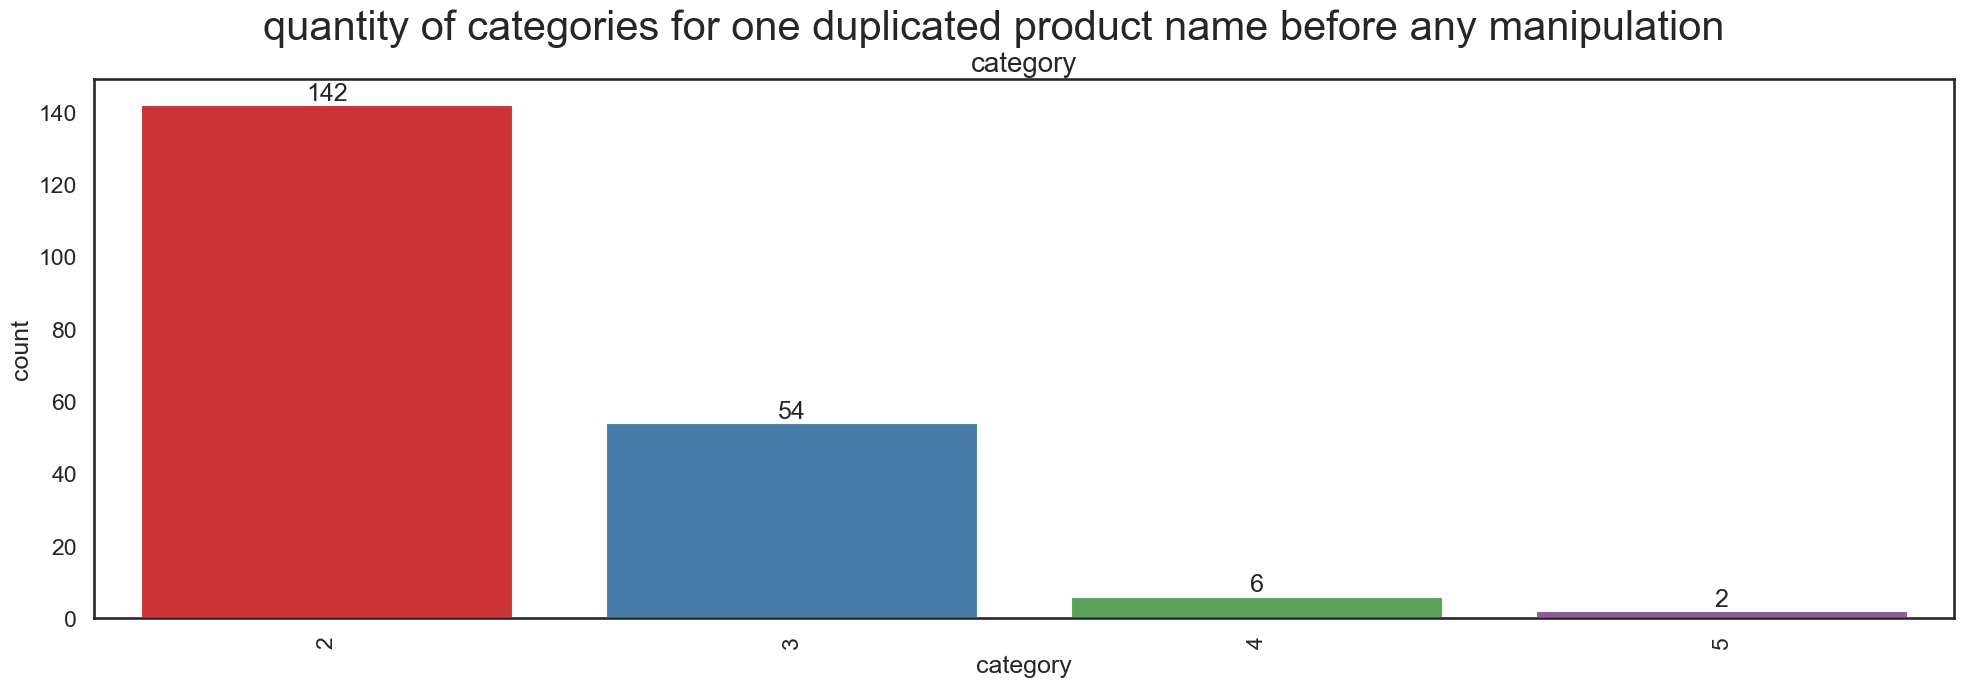

In [185]:
a = ikea[ikea.duplicated(subset=['item_id'], keep=False)==True] #берем список дублированных товаров
b = a[['name','category']].groupby('name').agg(lambda x: len(x.unique())) #группируем по имени и считаем в какое кол-во категорий входит товар
b.reset_index().sort_values(by='category')
countanalyse('countplot', b, ['category'], 1,1, 'quantity of categories for one duplicated product name before any manipulation','')

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">we see that 142 products are in two categories, and 54 in 3, and so on.
We will replace the categories with those that are usually included in only one category.</p>
<p>мы видим, что 142 товара находится в двух категориях, а 54 в 3-х и т.д. 
Произведем замену категорий на те которые входит обычно только в одну категорию.</p>

In [186]:
ikea_cat_name_false = ikea_cat_name[ikea_cat_name['category']==1] #выбираем товары входящие только в одну категорию
ikea_cat_name_true = ikea_cat_name[ikea_cat_name['category']>1] #выьираем товары входящие в несколдько категорий

ikea_cat_false = ikea_cat_nam[ikea_cat_nam['name'].apply(lambda x: x in ikea_cat_name_false['name'].unique())]
ikea_cat_false = ikea_cat_false[['name','category']].groupby(['name', 'category']).count().reset_index()

ikea_cat_true = ikea_cat_nam[ikea_cat_nam['name'].apply(lambda x: x in ikea_cat_name_true['name'].unique())]
ikea_cat_true = ikea_cat_true[['name','category']].groupby('name').agg(lambda x: x.unique()).reset_index()

In [187]:
dict_name_false = dict(zip(ikea_cat_false['name'], ikea_cat_false['category'])) #создаем словарь где ключи имена обычно входящие в одну категорию и значения-категории
for key in dict_name_false: #проходим по ключам
    ikea.loc[(ikea.duplicated(subset=['item_id'], keep=False)==True)& (ikea['name']==key), 'category'] = dict_name_false[key]
    #и везде где в таблице есть дублированные элементы с именем ключа меняем на категорию в словаре

<Figure size 1400x400 with 0 Axes>

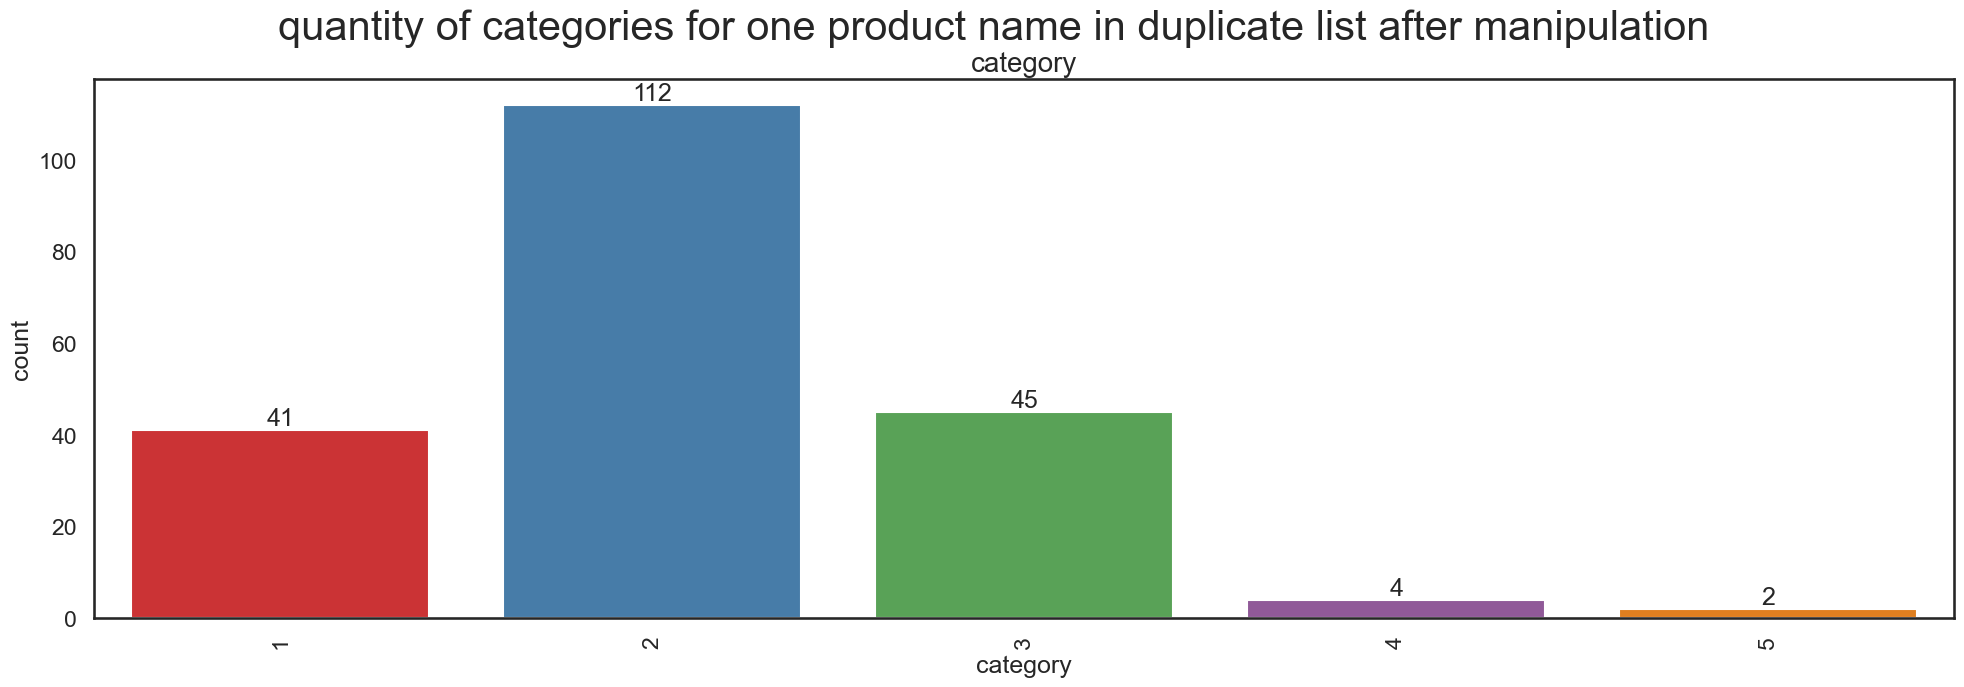

In [188]:
a = ikea[ikea.duplicated(subset=['item_id'], keep=False)==True]
b = a[['name','category']].groupby('name').agg(lambda x: len(x.unique()))
b.reset_index().sort_values(by='category')
fig = plt.figure(figsize=(14, 4))
countanalyse('countplot', b, ['category'], 1,1, 'quantity of categories for one product name in duplicate list after manipulation','')

In [189]:
# теперь мы заменим данные у тех инем которы обычно входят в несколько категорий - нам нужно чиоб хоть одна из категорий совпала с теми что есть у дубликатов 
dict_name_true = dict(zip(ikea_cat_true['name'], ikea_cat_true['category']))
ikea_dup = ikea[['name', 'category']][(ikea.duplicated(subset=['item_id'], keep=False)==True)].groupby(['name']).agg(lambda x: x.unique()).reset_index()

dict_name_dup=dict(zip(ikea_dup['name'], ikea_dup['category']))
dict_name_dup

for key in dict_name_true:
    for el in dict_name_true[key]:
        if el in dict_name_dup[key]:
            ikea.loc[(ikea.duplicated(subset=['item_id'], keep=False)==True) & (ikea['name']==key), 'category']=el

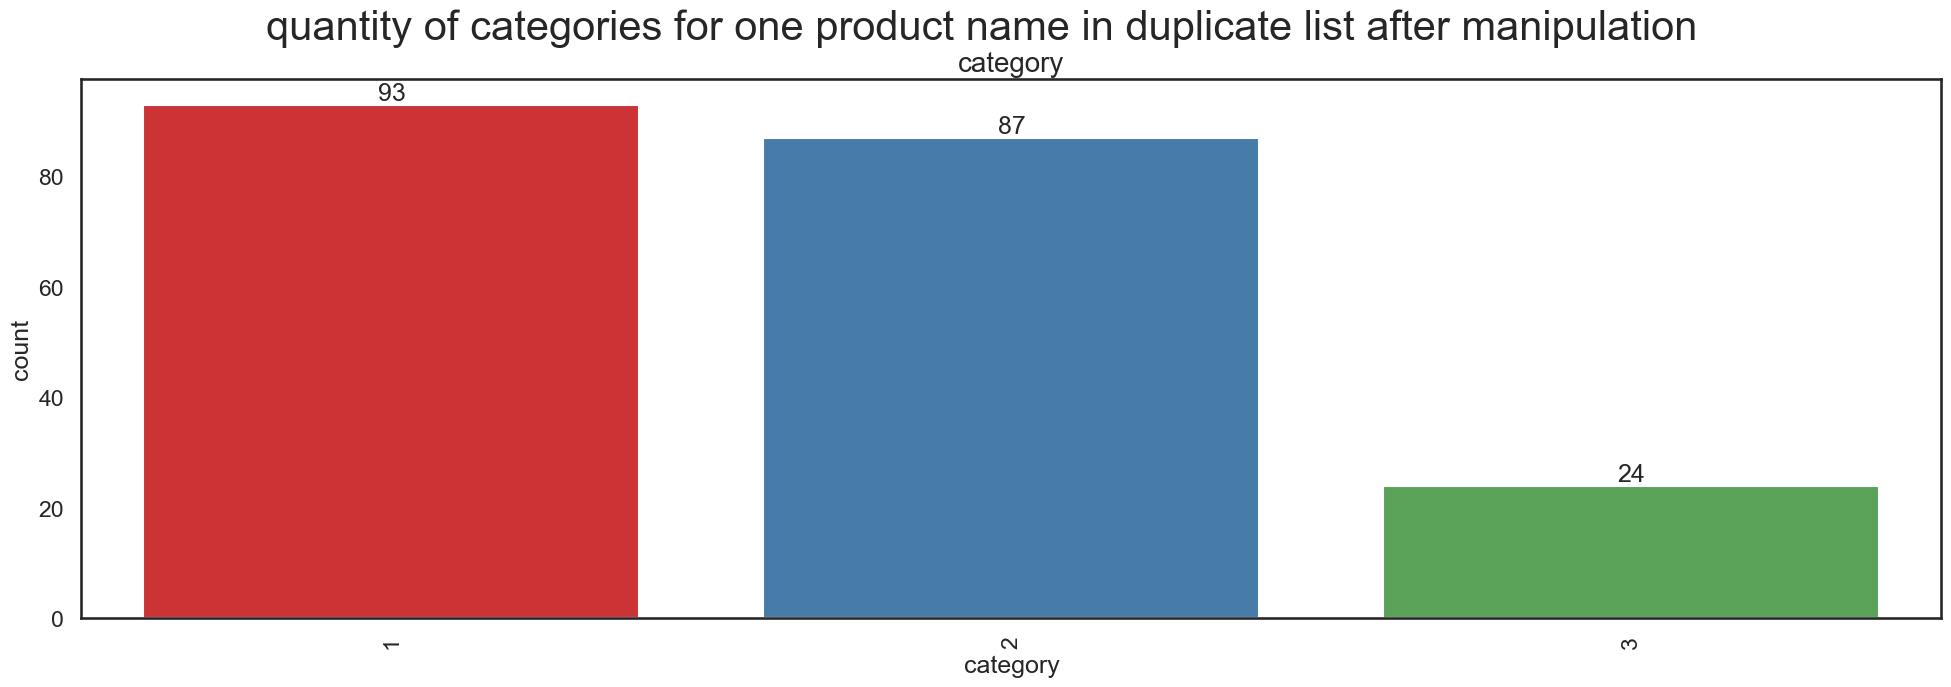

In [190]:
a = ikea[ikea.duplicated(subset=['item_id'], keep=False)==True]
b = a[['name','category']].groupby('name').agg(lambda x: len(x.unique()))
b.reset_index()
countanalyse('countplot', b, ['category'], 1,1, 'quantity of categories for one product name in duplicate list after manipulation','')

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">
we see that many product names are still included in different categories, so we will remove duplicates and leave only the first</p>
<p>мы видим что многие наименования товаров все еще входят в разные категории, значит мы удалим дубликаты и оставим только первые</p>

In [191]:
col=[var for var in ikea.columns if var != 'category'] #создаем список колонок исключая колонку category
print(col)
ikea.drop_duplicates(subset=col,keep='first',inplace=True) # удаляем все дубликаты оставляя первые в таблице 
ikea.shape #проверяем как изменился размер таблицы

['item_id', 'collection', 'price', 'old_price', 'sellable_online', 'other_colors', 'designer', 'depth', 'height', 'width', 'size', 'cm', 'name']


(2962, 14)

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">
check out our updated table</p>
<p>изучим нашу обновленную таблицу</p>

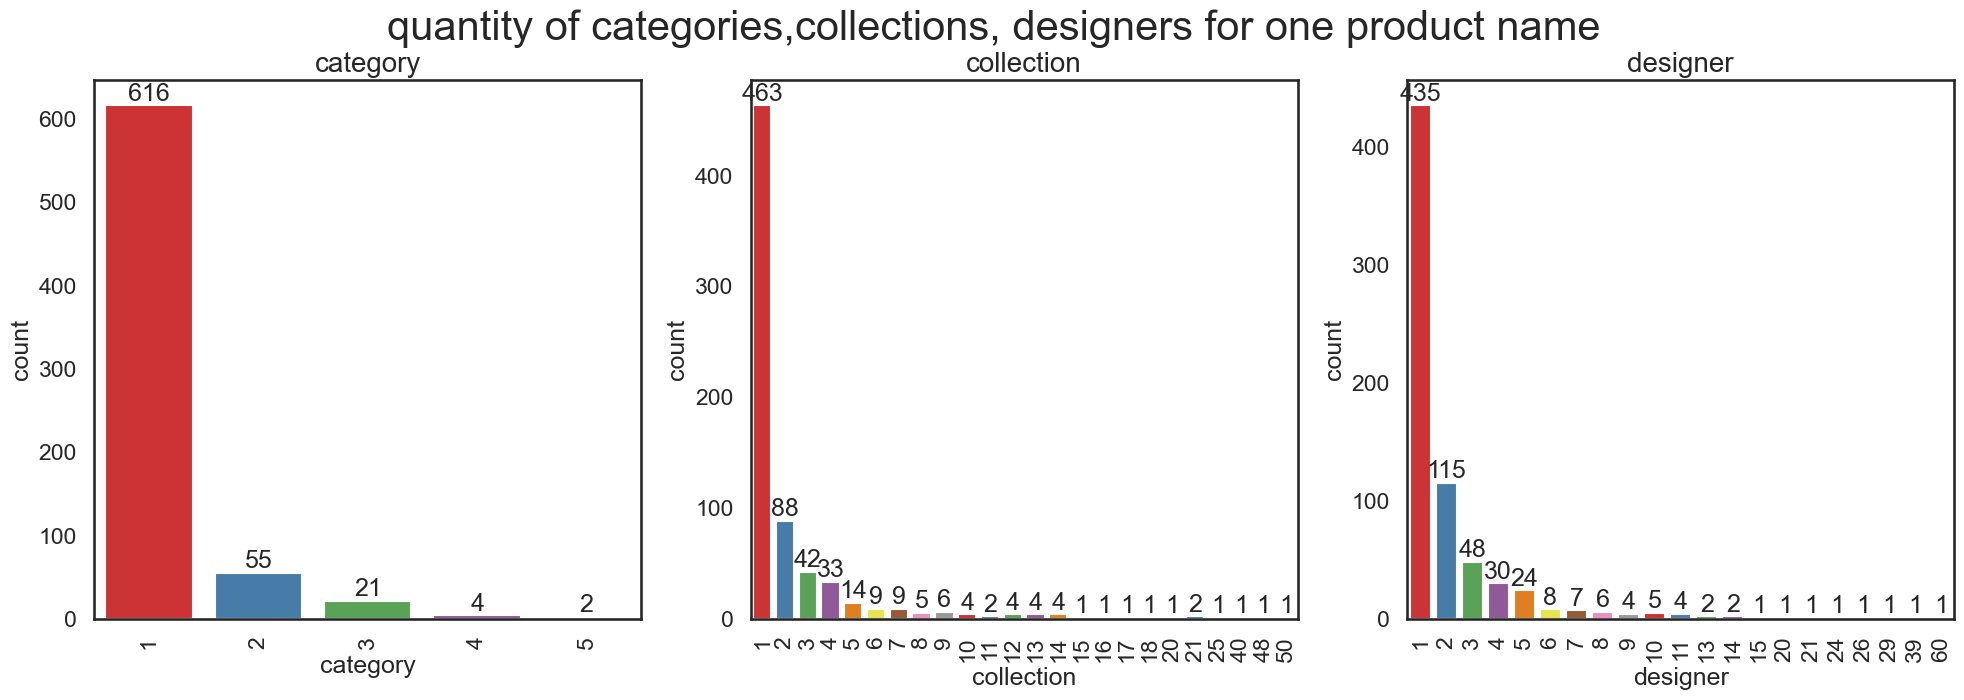

In [192]:
ikea_name_cat = ikea[['name','category', 'collection', 'designer']].groupby(['name'])\
                                                       .agg(lambda x: len(x.unique()))\
                                                       .sort_values(by='category', ascending=False).reset_index()
countanalyse('countplot', ikea_name_cat, ['category', 'collection','designer'], 1,3, 'quantity of categories,collections, designers for one product name','')

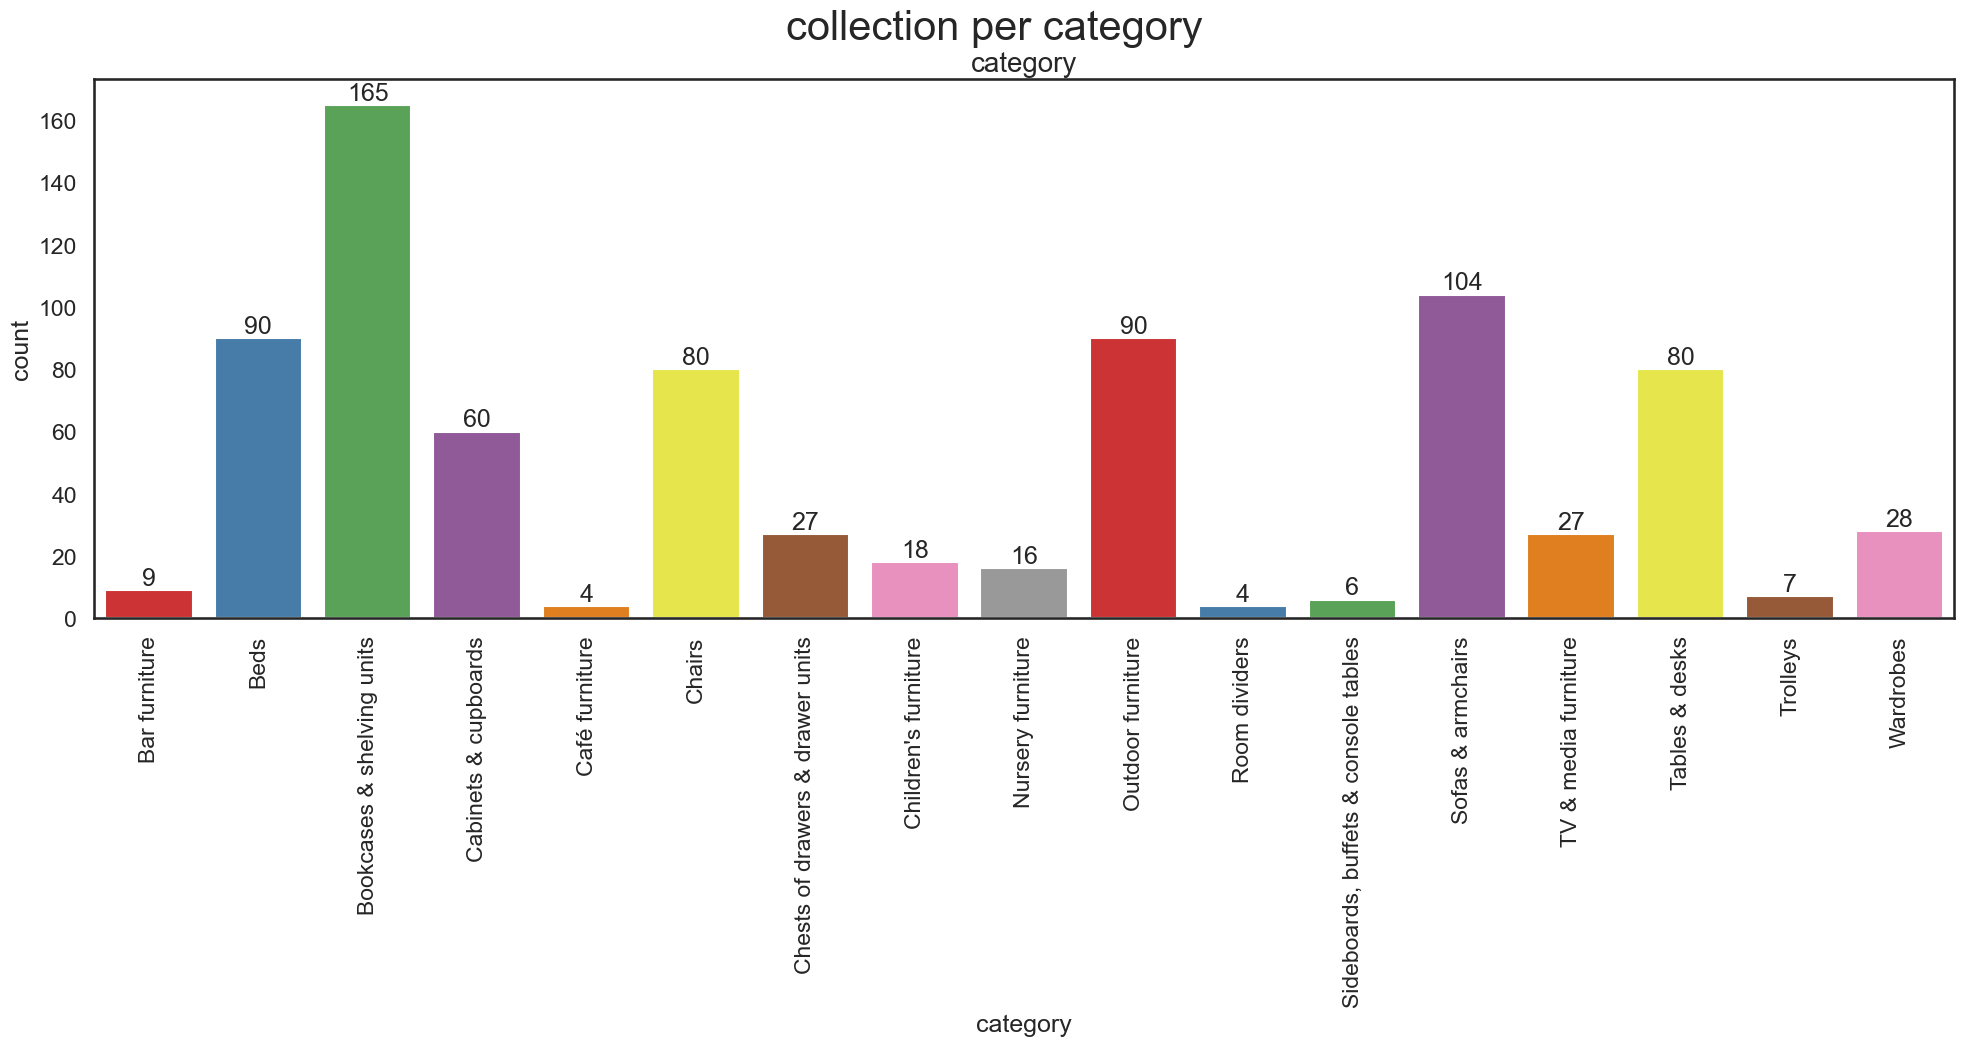

In [193]:
aa=ikea[["category","name",'item_id']].groupby(["category","name"]).count().reset_index()
countanalyse('countplot', aa, ['category'], 1,1, 'collection per category','')

In [194]:
ikea.isnull().sum()

item_id               0
collection            0
category              0
price                 0
old_price             0
sellable_online       0
other_colors          0
designer              0
depth              1118
height              726
width               442
size                859
cm                  859
name                  0
dtype: int64

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">at the same time, let's check whether our assumption was that products with the same id differ only in category</p>
<p>заодно проверим было ли наше предположение про то, что товары с одинаковым id различаются только category</p>

In [195]:
print('all id',len(list(ikea['item_id'])))
print('unique id',len(ikea['item_id'].unique()))

all id 2962
unique id 2962


<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">we see that our assumption was justified and we got rid of all duplicates. Back to clearing the designer column</p>
<p>мы видим, что наше предположение оправдалось и мы избавились от всех дубликатов. Вернемся к очищению колонки designer</p>

<h2 style="color:#003399">DESIGNER</h2>

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">there is some data in designer column, that don't looks good. Let's explore them closer. 
we can see, that these data start with id. </p>

In [196]:
mess_designer = ikea.loc[lambda x: x['designer'].str.match("[0-9]")==True]
mess_designer.shape

(102, 14)

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">So we have 143 rows with mess data in designer column</p>

In [197]:
mess_id_item = list(mess_designer['item_id'])

In [198]:
mess_designer = ikea.loc[lambda x: x['designer'].str.match("[0-9]")==True] #выводим снова строки с грязными данными
mess_designer.shape

(102, 14)

In [199]:
mess_designer.head(3)

item_id collection category  price     old_price  sellable_online  \
51   50468953  VATTVIKEN     Beds 995.00  No old price             True   
77   90331091     RIDABU     Beds 100.00        SR 125             True   
104  44361010      BRYNE     Beds  49.00  No old price             True   

    other_colors                                           designer  depth  \
51            No  504.689.53 Small and easy-to-place chair-bed w...  83.00   
77            No  903.310.91 The door can be hung with the openi...    NaN   
104           No  443.610.10 Easy to keep clean since you can re...    NaN   

     height  width    size   cm          name  
51    86.00  92.00     NaN  NaN  Armchair-bed  
77   120.00  40.00  40x120   cm   Mirror door  
104     NaN    NaN     NaN  NaN           Net

<img src='ikea443.jpg'>

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">so we have 102 rows with dirty data that start with their item_id data. But we can change this data for 'Fabric' as we see that this kind of items has no designer name - probably they made by partners.</p>

In [200]:
ikea['designer'] = ikea['designer'].str.replace('(^[0-9]+.+)', 'Fabric', regex=True)

In [201]:
ikea[ikea['designer']=='Fabric'].head()

item_id collection           category  price     old_price  \
51   50468953  VATTVIKEN               Beds 995.00  No old price   
77   90331091     RIDABU               Beds 100.00        SR 125   
104  44361010      BRYNE               Beds  49.00  No old price   
122  70284203     ASKEBY  Sofas & armchairs 995.00  No old price   
132  90299449    TUFFING               Beds 645.00  No old price   

     sellable_online other_colors designer  depth  height  width    size   cm  \
51              True           No   Fabric  83.00   86.00  92.00     NaN  NaN   
77              True           No   Fabric    NaN  120.00  40.00  40x120   cm   
104             True           No   Fabric    NaN     NaN    NaN     NaN  NaN   
122             True           No   Fabric  72.00   72.00 149.00     NaN  NaN   
132             True           No   Fabric    NaN  179.00  97.00  90x200   cm   

                  name  
51        Armchair-bed  
77         Mirror door  
104                Net  
122  Two-seat sofa-bed  
132     Loft bed frame

In [202]:
mess_designer = ikea.loc[lambda x: x['designer'].str.match("[0-9]")==True] #выводим снова строки с грязными данными
mess_designer.shape

(0, 14)

In [203]:
ikea.designer.isnull().sum()# проверяем колонку дизайнеров на наличие NaN 

0

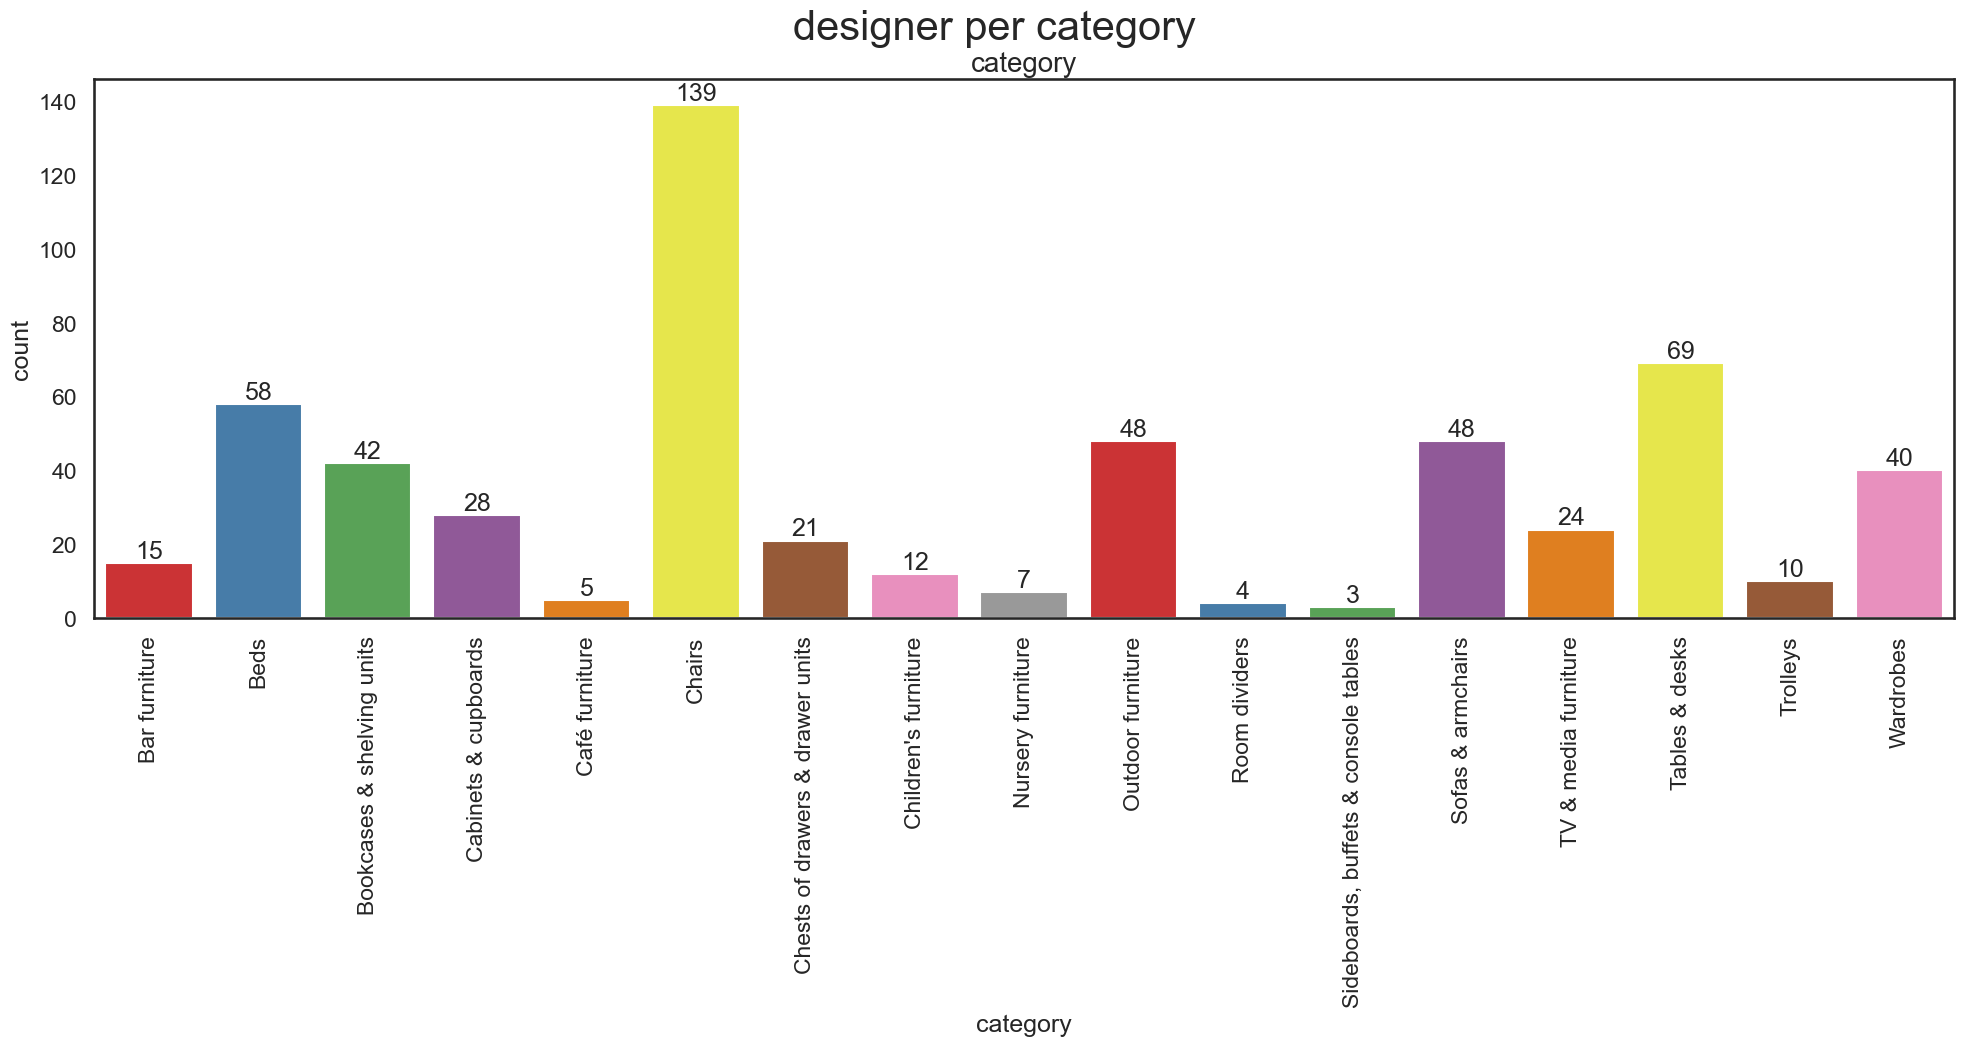

In [204]:
gr_tab=ikea[["category","designer",'item_id']].groupby(["category","designer"]).count().reset_index()
countanalyse('countplot', gr_tab, ['category'], 1,1, 'designer per category','')

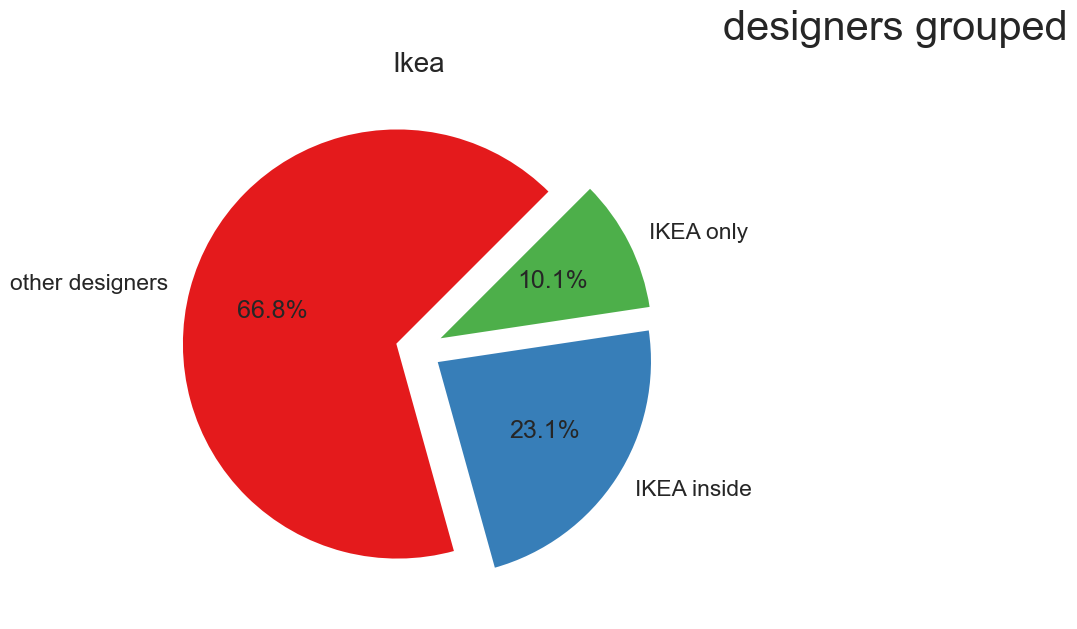

In [205]:
# ikea['only_Ikea']= ikea['designer']=='IKEA of Sweden'
def ikea_if(x):
    if x =='IKEA of Sweden':
        return 'IKEA only'
    else:
        if re.match(r'(IKEA of Sweden)',str(x)):
            return 'IKEA inside'
        else:
            return 'other designers'
    
ikea['Ikea']=ikea['designer'].apply(lambda x: ikea_if(x))
countanalyse('pie',ikea,['Ikea'],1,2,'designers grouped','')

Text(0, 0.5, 'price')

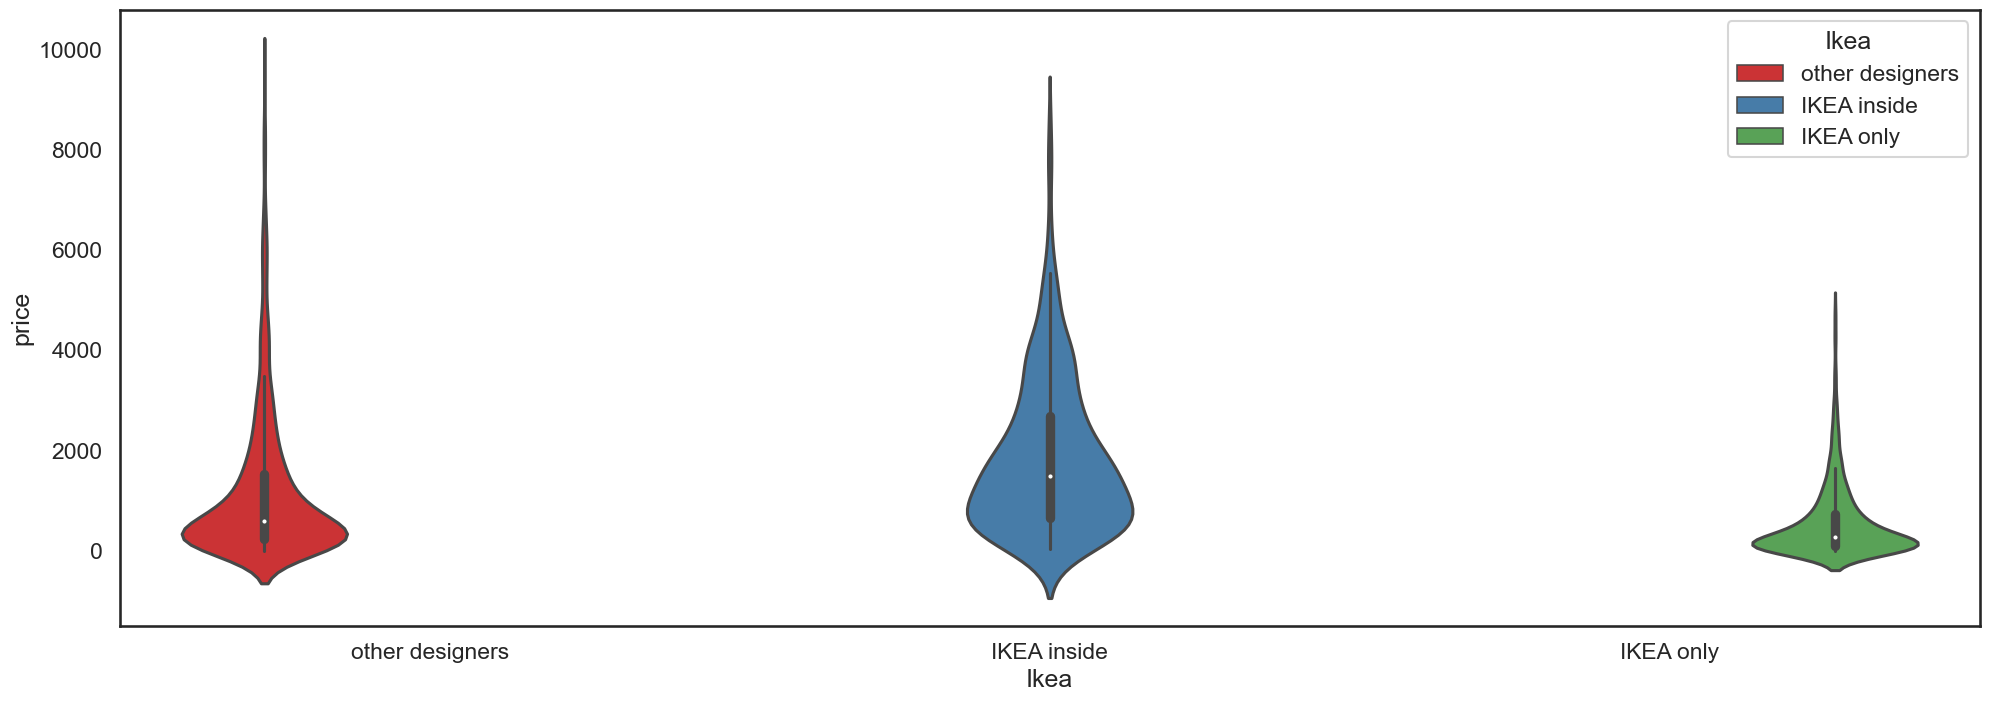

In [206]:
fig, axes = plt.subplots(figsize=(24,8))
sns.set(palette='Set1',context='talk', style='white')
sns.violinplot(data=ikea, x='Ikea', y='price', hue='Ikea')
plt.ylabel('price')

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">we can see that IKEA of Sweeden acts as a designer in 33% of products, of which in 23% it also attracts additional designers to product design. And in 66.6% of cases they are not involved in the design.
having studied information about IKEA, I found that the IKEA design department is quite small, not more than 10 people, their palette is to attract talented designers to collaborate and develop individual models.</p><p>мы видим, что IKEA of Sweeden в 33% товаров выступает дизайнером из них в 23% привлекает к дизайну товаров еще и дополнительных дизайнеров. А в 66.6% случаев они не участвуют в дизайне.
изучив информацию о IKEA, я обнаружила, что дизайнерский отдел IKEA довольно маленький не ьлоее 10 человек, их палитика - привлечение талантливых дизайнеров для коллаборации и разраьотки отдельных моделей.</p>

<h2 style="color:#003399">COLLECTION_SET, DESIGNER_SET</h2>

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">Then we see that part of data has more then one designer and more then 1 collection. Exploring links we can see that some of them are sets of items in one product, and other just have several designers.</p>

In [207]:
ikea['collection_set'] = ikea['collection'].str.strip().str.split('/').str.len()
ikea['designer_set'] = ikea['designer'].str.strip().str.split('/').str.len()

In [208]:
tab_set=ikea[['collection_set','designer_set']].groupby(['collection_set','designer_set']).count()
tab_set

Empty DataFrame
Columns: []
Index: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 6), (2, 7), (3, 2), (3, 3), (3, 7)]

In [ ]:
# countanalyse('countplot', ikea, ['designer_set', 'collection_set'], 1,2, 'кол_во товаров по кол-ву товаров в сете','')
countanalyse('pie', ikea, ['collection_set', 'designer_set'], 1,2, 'кол_во товаров по кол-ву товаров в сете','')

Text(0, 0.5, 'price')

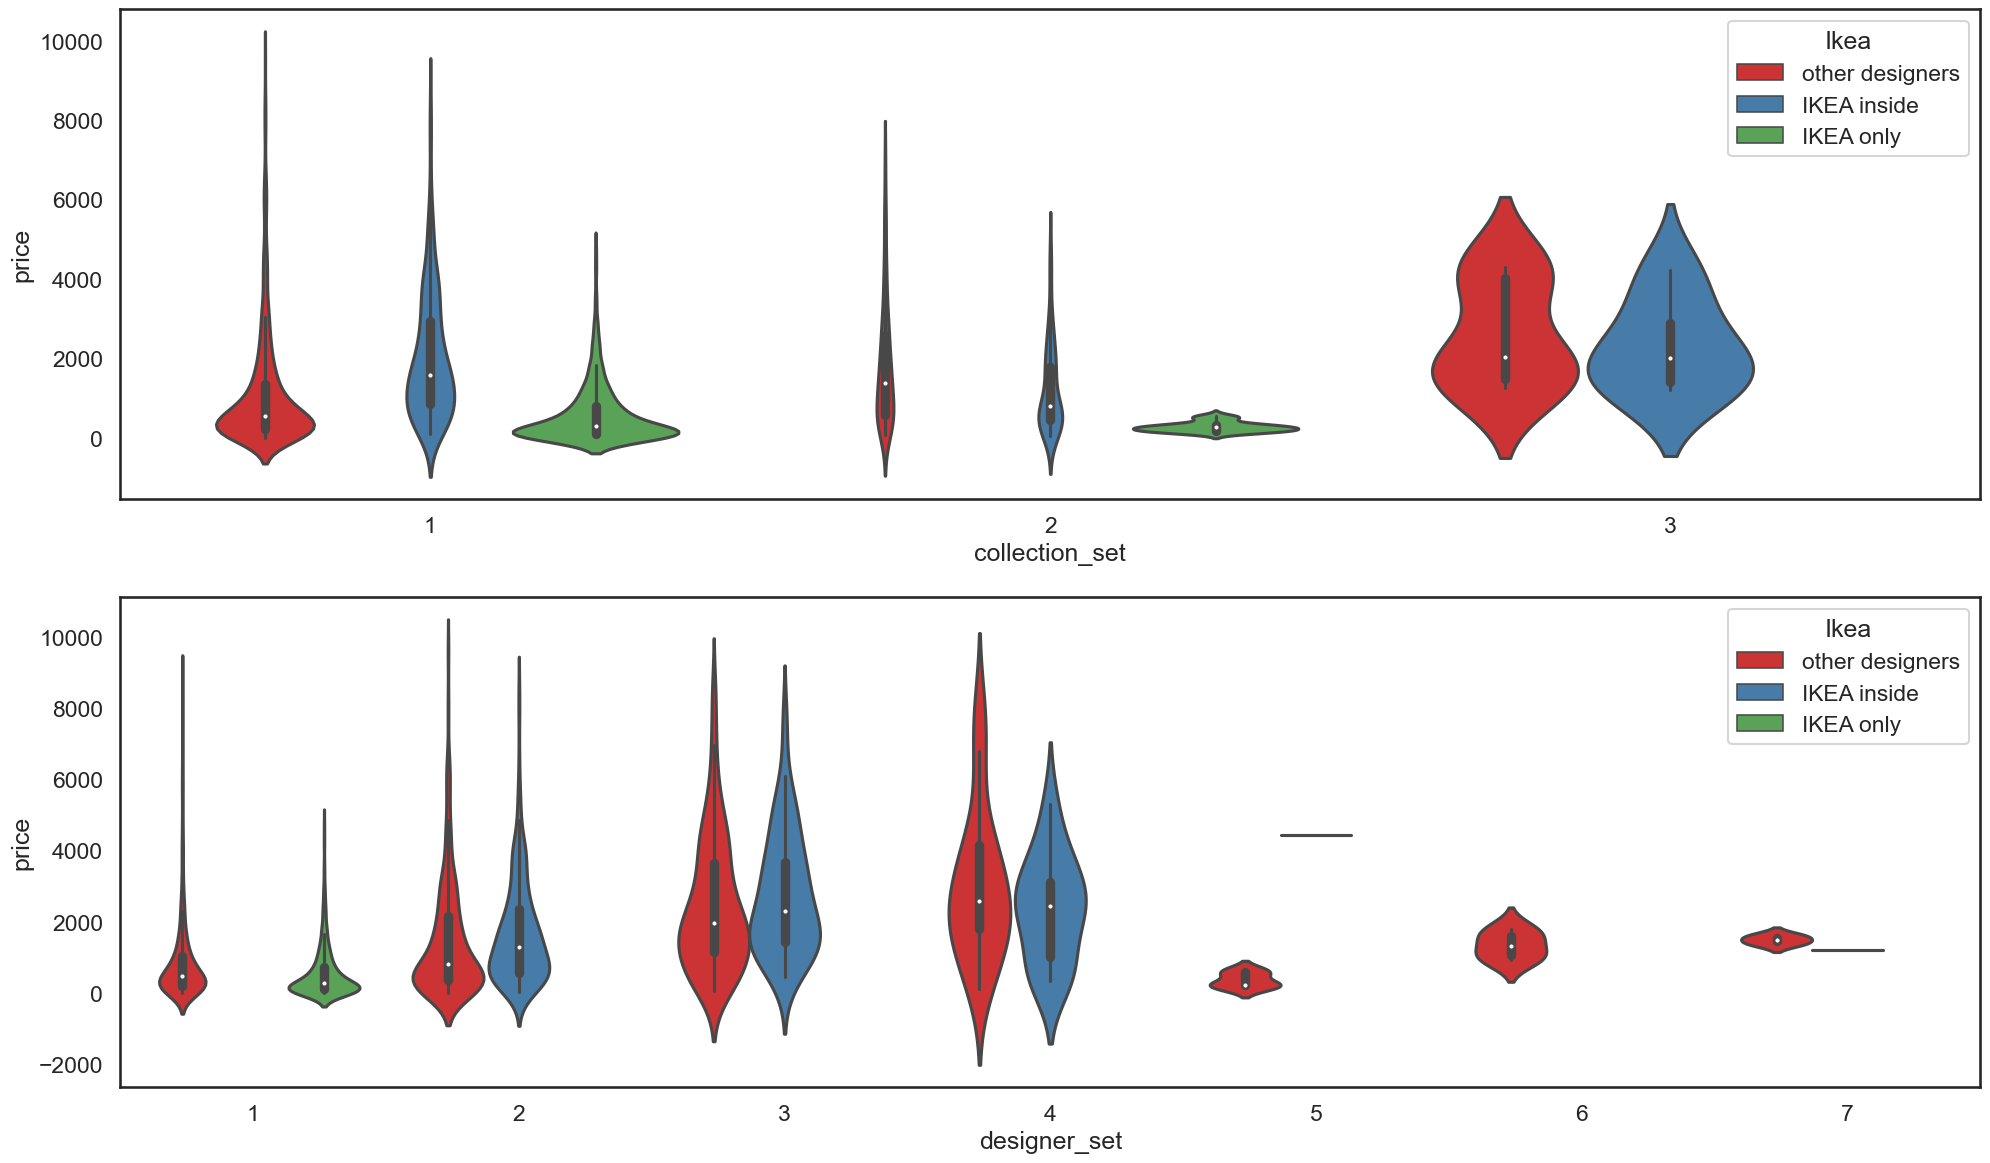

In [210]:
fig, axes = plt.subplots(2,1,figsize=(24,14))
sns.set(palette='Set1',context='talk', style='white')
sns.violinplot(ax=axes[0], data=ikea, x='collection_set', y='price', hue='Ikea')
sns.violinplot(ax=axes[1], data=ikea, x='designer_set', y='price', hue='Ikea')
plt.ylabel('price')

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">sort data in columns: 'collection','designer','name' alphabetically</p><p>отсортируем данные в колонках: 'collection','designer','name' по алфавиту</p>

In [211]:
ikea['designer']=ikea['designer'].apply(lambda x: '/'.join(sorted(x.split('/'))))
ikea['collection']=ikea['collection'].apply(lambda x: '/'.join(sorted(x.split('/'))))
ikea['name']=ikea['name'].apply(lambda x: '/'.join(sorted(x.split('/'))))

In [212]:
ikea[(ikea['collection_set']==1) & (ikea['designer_set']>1)].head(50)

item_id  collection        category   price     old_price  \
6    70404875    FRANKLIN   Bar furniture  129.00  No old price   
8    50406465    FRANKLIN   Bar furniture  129.00  No old price   
10   90404879    FRANKLIN   Bar furniture  149.00  No old price   
18   70246089     JANINGE   Bar furniture  595.00  No old price   
19   60406785    FRANKLIN   Bar furniture  149.00  No old price   
22   10281354     JANINGE   Bar furniture  595.00  No old price   
30   40339004    NORRÅKER  Café furniture  595.00  No old price   
31   39184324  HENRIKSDAL   Bar furniture  435.00  No old price   
35   20429010    NORRÅKER   Bar furniture  395.00  No old price   
47   29123958      MINNEN            Beds  395.00        SR 445   
48   49278341     BRIMNES            Beds  895.00        SR 925   
50   89326463      PLATSA            Beds 2111.00      SR 2,205   
52   69326609       SLÄKT            Beds  540.00  No old price   
53   59099136     BRIMNES            Beds  795.00  No old price   
55   69277307     LEIRVIK            Beds 1195.00  No old price   
57   89931560      HEMNES            Beds  675.00        SR 895   
59   59248612      NEIDEN            Beds  199.00  No old price   
60   19254209     SAGSTUA            Beds  545.00  No old price   
61   20400691     BRIMNES            Beds  575.00  No old price   
62   39019701     ASKVOLL            Beds  445.00  No old price   
63   69912770      TRYSIL            Beds  525.00  No old price   
64   29931596        MALM            Beds  495.00  No old price   
67   19175957        MALM            Beds  920.00  No old price   
69   39122072      LAUVIK            Beds 1729.00      SR 2,435   
70   79902935     BRIMNES            Beds  575.00  No old price   
72   99157983     NESTTUN            Beds  595.00  No old price   
73   69057522    TYSSEDAL            Beds 1395.00  No old price   
76   89227731       SLÄKT            Beds  995.00  No old price   
78   69185435     KRITTER            Beds  360.00  No old price   
79   29194427      HEMNES            Beds 1375.00      SR 1,595   
83   39248608      NEIDEN            Beds  399.00  No old price   
84   69323757      MINNEN            Beds  395.00  No old price   
85   79227755       SLÄKT            Beds  375.00  No old price   
87   79247598   BJÖRKSNÄS            Beds 2040.00  No old price   
90   20424362    FYRESDAL            Beds  549.00  No old price   
92   39931609        MALM            Beds  945.00  No old price   
97   89019992       TARVA            Beds  871.00        SR 940   
102  79129986       GJÖRA            Beds 1640.00  No old price   
105  80253809        KURA            Beds  745.00  No old price   
110  29188822      HEMNES            Beds 1145.00  No old price   
112  19009562        MALM            Beds  545.00  No old price   
113  99239451       SLÄKT            Beds  620.00  No old price   
114  99287550    DELAKTIG            Beds 2195.00  No old price   
115  19268763       STUVA            Beds 1725.00  No old price   
116  29250753      LAUVIK            Beds 2425.00      SR 3,245   
118  89186778  KONGSFJORD            Beds 8551.00      SR 8,735   
119   9306416      NYHAMN            Beds 1470.00  No old price   
120  50340163      NYHAMN            Beds  450.00  No old price   
121  29291956       SLÄKT            Beds 1395.00  No old price   
123  20228709     BRIMNES            Beds  220.00  No old price   

     sellable_online other_colors                                  designer  \
6               True           No                       K Hagberg/M Hagberg   
8               True           No                       K Hagberg/M Hagberg   
10              True           No                       K Hagberg/M Hagberg   
18              True           No           Caroline/John/Jonas/Paul/Petrus   
19              True           No                       K Hagberg/M Hagberg   
22              True           No           Caroline/John/Jonas/Paul/Petrus   
30              True          Yes  

<h2 style="color:#003399">SIZE</h2>

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">next, consider the data in the size column</p><p>далее рассмотрим данные в колонке size</p>

In [213]:
#выводим все возможные разделители в 'size'
symb=ikea['size'].apply(lambda x: re.findall('[^0-9]', str(x)))
symb_set=set()
for i in symb:
    symb_set.update(i)
print(symb_set)

{'x', 'n', '-', '/', 'a', '.'}


In [214]:
ikea[ikea['size'].str.contains('\/')==True].head(5)

item_id collection                    category   price     old_price  \
15   29304826   TOMMARYD              Tables & desks  695.00  No old price   
182  10372976     NORDLI                        Beds  695.00  No old price   
289  69155853      BILLY  Bookcases & shelving units 1510.00  No old price   
551  29277352      ALGOT  Bookcases & shelving units  183.60        SR 266   
638  19191896      BESTÅ  Bookcases & shelving units 2930.00  No old price   

     sellable_online other_colors                        designer  depth  \
15              True           No                 Maja Ganszyniec    NaN   
182             True           No                    Ola Wihlborg    NaN   
289             True          Yes  Gillis Lundgren/IKEA of Sweden  28.00   
551             True           No               Francis Cayouette    NaN   
638             True          Yes                  IKEA of Sweden    NaN   

     height  width            size  cm                                name  \
15   105.00  70.00      130x70/105  cm                               Table   
182   84.00 240.00         140/160  cm                           Headboard   
289  237.00 280.00  215/135x28x237  cm                            Bookcase   
551  197.00  66.00    66x41/61x197  cm                Wall upright/shelves   
638  211.00 300.00   300x20/40x211  cm  TV storage combination/glass doors   

                Ikea  collection_set  designer_set  
15   other designers               1             1  
182  other designers               1             1  
289  other designers               1             2  
551  other designers               1             1  
638        IKEA only               1             1

<img src='ikea130_70_105.jpg'>

In [215]:
ikea[ikea['size'].str.contains('\.')==True].head(2)

item_id collection category  price     old_price  sellable_online  \
1213  90175000    JUSTINA   Chairs  19.00  No old price             True   
1230    410101    VIPPÄRT   Chairs  29.00  No old price             True   

     other_colors        designer  depth  height  width          size  cm  \
1213           No  IKEA of Sweden  40.00     NaN    NaN  35/42x40x4.0  cm   
1230           No  IKEA of Sweden  38.00     NaN  38.00     38x38x6.5  cm   

               name       Ikea  collection_set  designer_set  
1213      Chair pad  IKEA only               1             1  
1230  Chair cushion  IKEA only               1             1

<img src="ikea_mat.jpg">

In [216]:
ikea[ikea['size'].str.contains('-')==True].head(2)

item_id collection                    category   price     old_price  \
7    60155602    DALFRED               Bar furniture  195.00  No old price   
260  99303461       IVAR  Bookcases & shelving units 1385.00      SR 1,390   

     sellable_online other_colors        designer  depth  height  width  \
7               True           No     Sarah Fager  50.00     NaN  50.00   
260             True           No  IKEA of Sweden    NaN  179.00 175.00   

               size  cm                                 name             Ikea  \
7             63-74  cm                            Bar stool  other designers   
260  175x30-104x179  cm  Shelv unit w table/cabinets/drawers        IKEA only   

     collection_set  designer_set  
7                 1             1  
260               1             1

<img src="ikea_stool.jpg">

In [217]:
ikea['size']=ikea['size'].replace({'^/':'','[0-9]+\-':'','\/':'x'},regex=True) #очищаем данные от / в начале строки 
# значение где данные стоят через / или - означают, что товар может изменять размер значит мы можем поставить меньшее значение
#х является разделителем

In [218]:
ikea[['name','size']].tail(4)

name        size
3689   1 section   92x51x350
3690  2 sections  135x51x350
3691  2 sections  175x51x350
3692  3 sections  178x51x350

In [219]:
symb=ikea['size'].apply(lambda x: re.findall('[^0-9]', str(x)))
symb_set=set()
for i in symb:
    symb_set.update(i)
print(symb_set)

{'a', 'x', '.', 'n'}


<h2 style="color:#003399">CM</h2>

In [220]:
ikea.cm.unique()

array(['cm', nan, 'mm'], dtype=object)

In [221]:
ikea[ikea['cm']=='mm']

item_id collection                    category  price     old_price  \
346   40347886    EDVALLA  Bookcases & shelving units  25.00  No old price   
389   80336433    GUBBARP        TV & media furniture   3.00  No old price   
433   50046152      HEDRA        TV & media furniture   9.00  No old price   
436     338412   BAGGANÄS        TV & media furniture  27.00  No old price   
437   20348896   ÖSTERNÄS  Bookcases & shelving units  49.00  No old price   
450     347888    EDVALLA  Bookcases & shelving units  25.00  No old price   
460   10338421   BAGGANÄS  Bookcases & shelving units  27.00  No old price   
472   40347508    ENERYDA        TV & media furniture  22.00  No old price   
498   50347503    ENERYDA        TV & media furniture  17.00  No old price   
503   60334312   BILLSBRO        TV & media furniture  35.00  No old price   
511   10334319   BILLSBRO        TV & media furniture  55.00  No old price   
530   80322855  BERGHALLA        TV & media furniture  22.00  No old price   
534   30338415   BAGGANÄS  Bookcases & shelving units  22.00  No old price   
552   70347516    ENERYDA  Bookcases & shelving units  35.00  No old price   
556     347505    ENERYDA  Bookcases & shelving units  35.00  No old price   
579   70265247    MÖLLARP        TV & media furniture  17.00  No old price   
581   80339790     HACKÅS        TV & media furniture  17.00  No old price   
582   30342479     HACKÅS        TV & media furniture  32.00  No old price   
593   30236153     ORRNÄS        TV & media furniture  17.00  No old price   
611     338407   BAGGANÄS        TV & media furniture  35.00  No old price   
617   70323600   BILLSBRO        TV & media furniture  19.00  No old price   
618   50342478     HACKÅS        TV & media furniture  50.00  No old price   
623   70370352   MOSSARYD  Bookcases & shelving units  29.00  No old price   
651   60323592   BILLSBRO        TV & media furniture  15.00  No old price   
652   20273141    HISHULT        TV & media furniture  17.00  No old price   
653   50334303   BILLSBRO        TV & media furniture  25.00  No old price   
654   30373164  KLACKBERG        TV & media furniture  35.00  No old price   
662   90347515    ENERYDA        TV & media furniture  35.00  No old price   
663   40348895   ÖSTERNÄS  Bookcases & shelving units  70.00  No old price   
670   50334317   BILLSBRO        TV & media furniture  45.00  No old price   
672   70348894    BJÄRRED        TV & media furniture  49.00  No old price   
676   10323599   BILLSBRO        TV & media furniture  69.00  No old price   
684   30323598   BILLSBRO        TV & media furniture  49.00  No old price   
697   50357002    KALLRÖR        TV & media furniture  25.00  No old price   
698   20334314   BILLSBRO        TV & media furniture  15.00  No old price   
700   20338411   BAGGANÄS        TV & media furniture  50.00  No old price   
704   10273090    MÖLLARP        TV & media furniture  12.00  No old price   
710   50370353   MOSSARYD  Bookcases & shelving units  29.00  No old price   
723   30357003    KALLRÖR        TV & media furniture  45.00  No old price   
756   70348785   SKÄRHAMN        TV & media furniture  29.00  No old price   
768   90265246    HISHULT        TV & media furniture  35.00  No old price   
769   70236151     ORRNÄS        TV & media furniture  29.00  No old price   
770   50323597   BILLSBRO        TV & media furniture  35.00  No old price   
774   10357004    KALLRÖR        TV & media furniture  35.00  No old price   
907     347510    ENERYDA        Cabinets & cupboards  22.00  No old price   
937   20347514    ENERYDA        TV & media furniture  35.00  No old price   
963   60347507    ENERYDA        TV & media furniture  35.00  No old price   
995   90338422   BAGGANÄS        Cabinets & cupboards  27.00  No old price   
1004  10338416   BAGGANÄS        Cabinets & cupboards  27.00  No old price   
1041  30371056   SKÄRHAMN        Cabinets & cupboards  39.00  No old price   
1046  30338420   BAGGANÄS    

<img src="ikea_mm.jpg">

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">we will give the data in cm for those lines where cm = mm, we also see that in these lines width, depth height are also indicated in mm, we will translate them into cm too</p><p>приведем данные в см для тех строк где см = mm, мы также видим что в этих строках width, depth height также указаны в mm переведем их тоже в cm</p>

In [222]:
ikea.loc[ikea['cm'] == 'mm', 'size'] = ikea.loc[ikea['cm'] == 'mm', 'size'].map(lambda x: str(round(float(x),2)/10))
ikea['width'][ikea['cm']=='mm']=ikea['width'][ikea['cm']=='mm'].apply(lambda x: float(x)/10)
ikea['depth'][ikea['cm']=='mm']=ikea['depth'][ikea['cm']=='mm'].apply(lambda x: float(x)/10)
ikea['height'][ikea['cm']=='mm']=ikea['height'][ikea['cm']=='mm'].apply(lambda x: float(x)/10)
ikea[ikea['cm']=='mm']

item_id collection                    category  price     old_price  \
346   40347886    EDVALLA  Bookcases & shelving units  25.00  No old price   
389   80336433    GUBBARP        TV & media furniture   3.00  No old price   
433   50046152      HEDRA        TV & media furniture   9.00  No old price   
436     338412   BAGGANÄS        TV & media furniture  27.00  No old price   
437   20348896   ÖSTERNÄS  Bookcases & shelving units  49.00  No old price   
450     347888    EDVALLA  Bookcases & shelving units  25.00  No old price   
460   10338421   BAGGANÄS  Bookcases & shelving units  27.00  No old price   
472   40347508    ENERYDA        TV & media furniture  22.00  No old price   
498   50347503    ENERYDA        TV & media furniture  17.00  No old price   
503   60334312   BILLSBRO        TV & media furniture  35.00  No old price   
511   10334319   BILLSBRO        TV & media furniture  55.00  No old price   
530   80322855  BERGHALLA        TV & media furniture  22.00  No old price   
534   30338415   BAGGANÄS  Bookcases & shelving units  22.00  No old price   
552   70347516    ENERYDA  Bookcases & shelving units  35.00  No old price   
556     347505    ENERYDA  Bookcases & shelving units  35.00  No old price   
579   70265247    MÖLLARP        TV & media furniture  17.00  No old price   
581   80339790     HACKÅS        TV & media furniture  17.00  No old price   
582   30342479     HACKÅS        TV & media furniture  32.00  No old price   
593   30236153     ORRNÄS        TV & media furniture  17.00  No old price   
611     338407   BAGGANÄS        TV & media furniture  35.00  No old price   
617   70323600   BILLSBRO        TV & media furniture  19.00  No old price   
618   50342478     HACKÅS        TV & media furniture  50.00  No old price   
623   70370352   MOSSARYD  Bookcases & shelving units  29.00  No old price   
651   60323592   BILLSBRO        TV & media furniture  15.00  No old price   
652   20273141    HISHULT        TV & media furniture  17.00  No old price   
653   50334303   BILLSBRO        TV & media furniture  25.00  No old price   
654   30373164  KLACKBERG        TV & media furniture  35.00  No old price   
662   90347515    ENERYDA        TV & media furniture  35.00  No old price   
663   40348895   ÖSTERNÄS  Bookcases & shelving units  70.00  No old price   
670   50334317   BILLSBRO        TV & media furniture  45.00  No old price   
672   70348894    BJÄRRED        TV & media furniture  49.00  No old price   
676   10323599   BILLSBRO        TV & media furniture  69.00  No old price   
684   30323598   BILLSBRO        TV & media furniture  49.00  No old price   
697   50357002    KALLRÖR        TV & media furniture  25.00  No old price   
698   20334314   BILLSBRO        TV & media furniture  15.00  No old price   
700   20338411   BAGGANÄS        TV & media furniture  50.00  No old price   
704   10273090    MÖLLARP        TV & media furniture  12.00  No old price   
710   50370353   MOSSARYD  Bookcases & shelving units  29.00  No old price   
723   30357003    KALLRÖR        TV & media furniture  45.00  No old price   
756   70348785   SKÄRHAMN        TV & media furniture  29.00  No old price   
768   90265246    HISHULT        TV & media furniture  35.00  No old price   
769   70236151     ORRNÄS        TV & media furniture  29.00  No old price   
770   50323597   BILLSBRO        TV & media furniture  35.00  No old price   
774   10357004    KALLRÖR        TV & media furniture  35.00  No old price   
907     347510    ENERYDA        Cabinets & cupboards  22.00  No old price   
937   20347514    ENERYDA        TV & media furniture  35.00  No old price   
963   60347507    ENERYDA        TV & media furniture  35.00  No old price   
995   90338422   BAGGANÄS        Cabinets & cupboards  27.00  No old price   
1004  10338416   BAGGANÄS        Cabinets & cupboards  27.00  No old price   
1041  30371056   SKÄRHAMN        Cabinets & cupboards  39.00  No old price   
1046  30338420   BAGGANÄS    

In [223]:
ikea.drop(columns='cm', inplace=True)

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">look at the distribution of boolean data in a table</p><p>рассмотрим на распределение булевые данные в таблице</p>

In [ ]:
countanalyse('pie', ikea, ['sellable_online', 'other_colors'], 1,2, '','')

<h2 style="color:#003399">SELLABLE_ONLINE</h2>

In [225]:
#мы видим чио в колонке 'sellable_online' всего 0.6% значений False - рассмотрим их
tab_online_false=ikea[ikea['sellable_online']==False]
tab_online_false.head(5)

item_id             collection        category   price     old_price  \
1      368814              NORDVIKEN  Café furniture  995.00  No old price   
2     9333523   NORDVIKEN/NORDVIKEN    Bar furniture 2095.00  No old price   
36   80369112              NORDVIKEN   Bar furniture  275.00  No old price   
52   69326609                  SLÄKT            Beds  540.00  No old price   
160  19326428                  SLÄKT            Beds  520.00  No old price   

     sellable_online other_colors                        designer  depth  \
1              False           No               Francis Cayouette    NaN   
2              False           No               Francis Cayouette    NaN   
36             False           No               Francis Cayouette  47.00   
52             False           No  Ebba Strandmark/IKEA of Sweden    NaN   
160            False           No  Ebba Strandmark/IKEA of Sweden    NaN   

     height  width    size                                 name  \
1    105.00  80.00  140x80                            Bar table   
2       NaN    NaN     NaN           Bar table and 4 bar stools   
36   101.00  40.00      75              Bar stool with backrest   
52      NaN  91.00  80x200  Ext bed frame with slatted bed base   
160     NaN  91.00  80x200  Ext bed frame with slatted bed base   

                Ikea  collection_set  designer_set  
1    other designers               1             1  
2    other designers               2             1  
36   other designers               1             1  
52       IKEA inside               1             2  
160  other designers               1             2

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">we see that there is no reason to believe that goods are not sold online for reasons related to the information that is provided to us, and for a more detailed analysis, the sample is too small.</p><p>мы видим, что нет причины считать, что товары не продаются online по причинам связанным с той информацией, которая нам предоставлена, а для более детального анализа выборка слишком мала.</p>

In [226]:
ikea.drop(columns=['sellable_online'], inplace=True)

<h2 style="color:#003399">OLD_PRICE</h2>

In [227]:
ikea['old_price']

0       No old price
1       No old price
2       No old price
3       No old price
4       No old price
            ...     
3688    No old price
3689          SR 820
3690        SR 1,755
3691        SR 1,050
3692        SR 3,130
Name: old_price, Length: 2962, dtype: object

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">we change the 'old_price' column, which seems to show the price before the discount, which means those products for which there is no discount, you can put the same numbers as in price</p><p>изменяем колонку 'old_price' которая похоже показывает цену до скидки значит те товары на каторые нет скидки можно поставить те же цифры что и в price</p>

In [228]:
ikea['old_price']=ikea['old_price'].replace({',|SR|/[0-9].+':''},regex=True)
ikea['old__price'] = ikea[['old_price','price']].apply(lambda x: re.sub('No old price', str(x.price), x.old_price), axis=1)
ikea['old_price']=ikea['old__price'].astype(float)
categorical_var.remove('old_price')
ikea.drop(columns=['old__price'], inplace=True)

<h2 style="color:#003399">OTHER_COLORS</h2>

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">change the data in the 'other_colors' column to numeric 0, 1</p><p>изменим данные в колонке 'other_colors' на числовые 0, 1</p>

In [229]:
ikea['other_colors'].value_counts()

No     1637
Yes    1325
Name: other_colors, dtype: int64

In [ ]:
countanalyse('countplot_hue', ikea, ['category'], 1,1, 'price destribution','other_colors')

In [231]:
ikea.replace({'other_colors': {'No':0,'Yes':1}}, inplace=True)

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">we see that the link column is useless and we don’t need short_description anymore, so we delete it, we will leave only the reminder https://www.ikea.com/sa/en/, we will also delete the 'sellable_online' column, since the information in it is not useful to us for model building.</p><p>мы видим что колонка link бесполезна и short_description нам уже не понадобится, так что ее мы удаляем оставим только напоминалку https://www.ikea.com/sa/en/, также удалим колонку 'sellable_online' так как информация в ней нам не пригодится для почстроения модели.</p>

In [232]:
categorical_var = [var for var in ikea.columns if ikea[var].dtype==object]
print('The categorical variables are: {}'.format(categorical_var))
for var in categorical_var:
    
    print(var, ' contains ', len(ikea[var].unique()), ' labels')

The categorical variables are: ['collection', 'category', 'designer', 'size', 'name', 'Ikea']
collection  contains  607  labels
category  contains  17  labels
designer  contains  200  labels
size  contains  1029  labels
name  contains  697  labels
Ikea  contains  3  labels


<h2 style="color:#003399;text-decoration: underline">NUMERICAL</h2>

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">consider numerical data</p><p>рассмотрим числовые данные</p>


In [233]:
numerical_var = [var for var in ikea.columns if ikea[var].dtype != 'O' ]
print('The numerical variables are: {}'.format(numerical_var))

The numerical variables are: ['item_id', 'price', 'old_price', 'other_colors', 'depth', 'height', 'width', 'collection_set', 'designer_set']


<h2 style="color:#003399">WIDTH __ DEPTH __ HEIGHT + GABARITY</h2>

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">check data for outliers</p><p>проверим данные на выбросы</p>

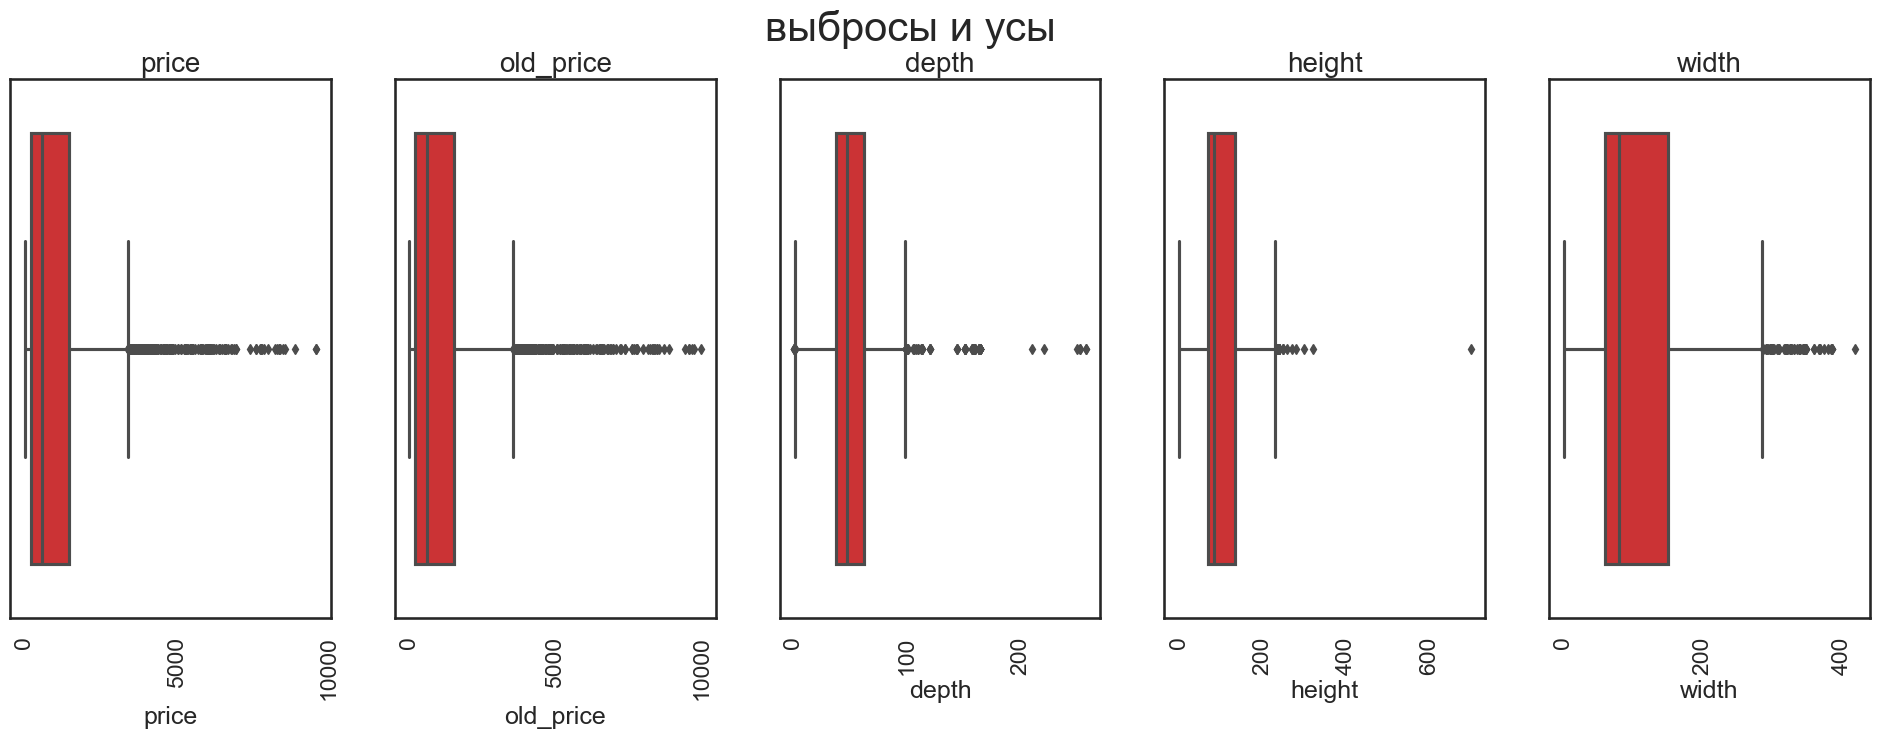

In [234]:
countanalyse('boxplot', ikea, ['depth','height','width'], 1,5, 'выбросы и усы','')

In [235]:
ikea[ikea.height>600]

item_id collection        category  price  old_price  other_colors  \
2884  80278273     HILVER  Tables & desks 100.00     100.00             0   

       designer  depth  height  width size             name             Ikea  \
2884  Chenyi Ke    NaN  700.00    NaN   70  Leg cone-shaped  other designers   

      collection_set  designer_set  
2884               1             1

<img src="ikea70.jpg">

In [236]:
ikea.loc[ikea['item_id'] == 80278273, 'height']=ikea.loc[ikea['item_id'] == 80278273, 'height'].replace(700,70)

In [237]:
ikea.loc[ikea['item_id'] == 80278273, 'height']

2884   70.00
Name: height, dtype: float64

In [239]:
ikea[ikea['depth']>250]

item_id collection           category   price  old_price  other_colors  \
2283  69254810    GRÖNLID  Sofas & armchairs 6575.00    6575.00             1   
2289  59193723      KIVIK  Sofas & armchairs 8295.00    8295.00             1   
2385  49252949      KIVIK  Sofas & armchairs 6895.00    6895.00             1   
2559  89256610    GRÖNLID  Sofas & armchairs 8900.00    8900.00             0   

                               designer  depth  height  width size  \
2283  Ehlén Johansson/Francis Cayouette 252.00  104.00 327.00  NaN   
2289                       Ola Wihlborg 257.00   83.00 368.00  NaN   
2385                       Ola Wihlborg 257.00   83.00 328.00  NaN   
2559                  Francis Cayouette 252.00  104.00 327.00  NaN   

               name             Ikea  collection_set  designer_set  
2283  U-shaped sofa  other designers               1             2  
2289  U-shaped sofa  other designers               1             1  
2385  U-shaped sofa  other designers               1             1  
2559  U-shaped sofa  other designers               1             1

In [240]:
ikea[ikea['width']>400]

item_id collection   category   price  old_price  other_colors  \
3586  59324385     PLATSA  Wardrobes 3113.00    3535.00             0   

                         designer  depth  height  width        size  \
3586  IKEA of Sweden/Ola Wihlborg  42.00  241.00 420.00  420x42x241   

                                  name             Ikea  collection_set  \
3586  Storage comb w 6 doors+3 drawers  other designers               1   

      designer_set  
3586             2

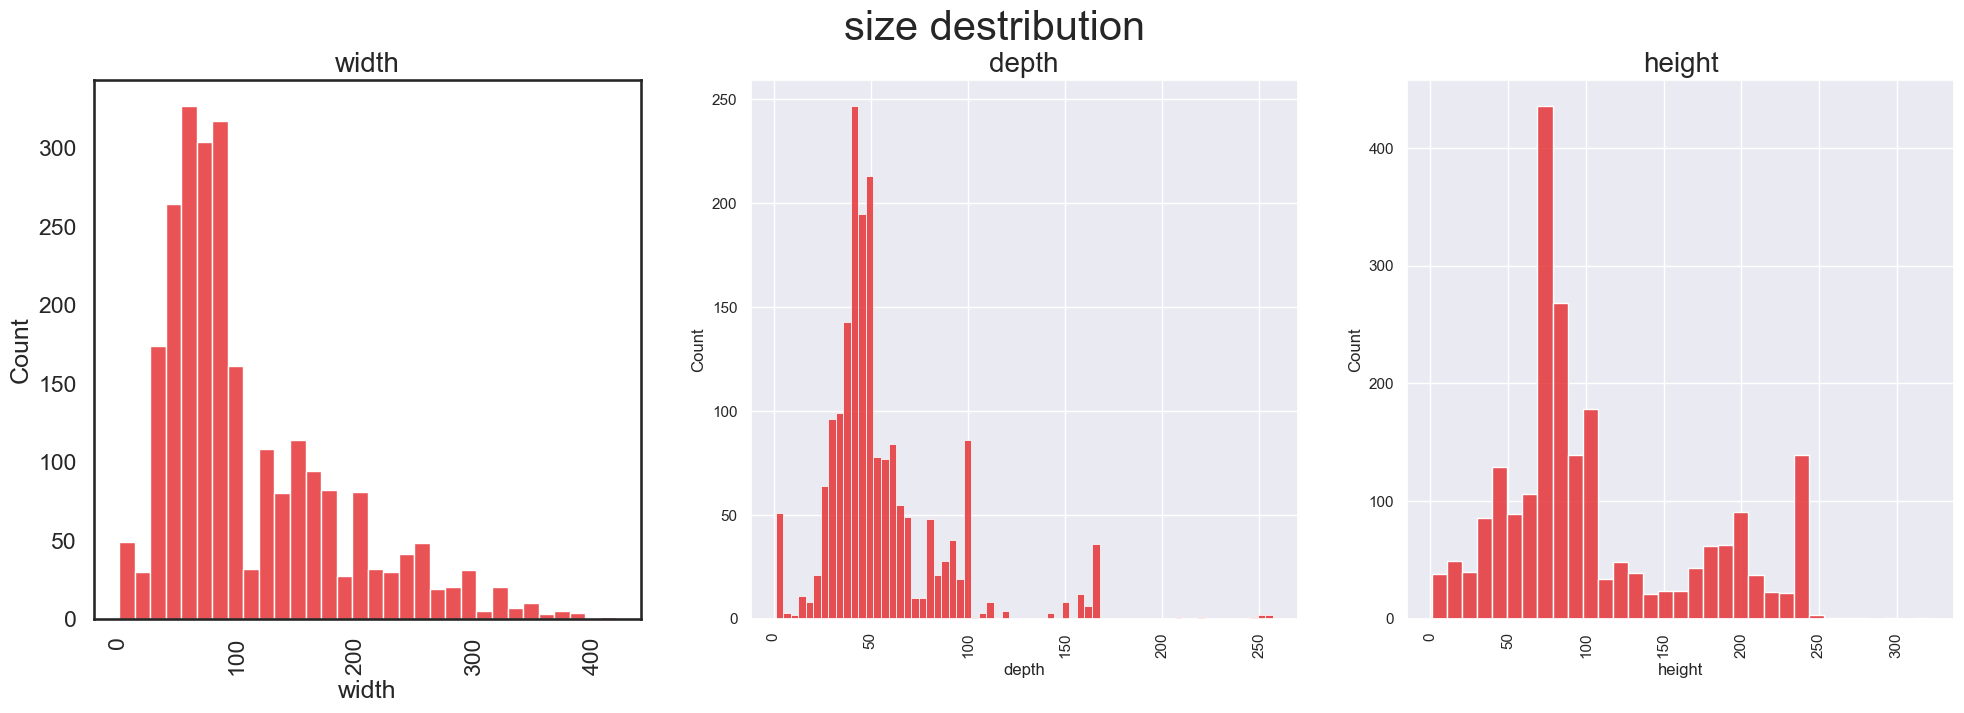

In [242]:
countanalyse('histplot', ikea, ['width','depth','height','gabarity'], 1,3, 'size destribution','')

In [243]:
print(' depth null  {:.2f}%\n height null {:.2f}%\n width null  {:.2f}%'.\
      format(ikea.depth.isnull().sum()*100/len(ikea.depth),\
             ikea.height.isnull().sum()*100/len(ikea.height),\
             ikea.width.isnull().sum()*100/len(ikea.width)))

 depth null  37.74%
 height null 24.51%
 width null  14.92%


In [244]:
print(
'depth  isnull - height notnull - width  notnull {:.2f}%\n\
height isnull - depth  notnull - width  notnull {:.2f}%\n\
width  isnull - depth  notnull - height notnull {:.2f}%\n\
width  isnull - depth  isnull - height isnull {:.2f}%'.
format(len(ikea[(ikea['height'].notnull()) & (ikea['depth'].isnull()) & (ikea['width'].notnull())])*100/len(ikea),\
       len(ikea[(ikea['height'].isnull()) & (ikea['depth'].notnull()) & (ikea['width'].notnull())])*100/len(ikea),\
       len(ikea[(ikea['height'].notnull()) & (ikea['depth'].notnull()) & (ikea['width'].isnull())])*100/len(ikea),\
       len(ikea[(ikea['height'].isnull()) & (ikea['depth'].isnull()) & (ikea['width'].isnull())])*100/len(ikea))
     )

depth  isnull - height notnull - width  notnull 18.03%
height isnull - depth  notnull - width  notnull 6.35%
width  isnull - depth  notnull - height notnull 0.68%
width  isnull - depth  isnull - height isnull 10.40%


In [245]:
ikea['size'] = ikea['size'].apply(lambda x: str(x).split('x')) 
#сплитуем по 'x', получаем 2,3 или 4 значения (но мы не знаем точно порядок значений), 
#поэтому будем использовать только те знаяения, которые соотвествуют строкам, 
#в которых отсутствует одно из значений и подставим, то которое не встречается в существующих двух но есть в size  

In [246]:
ikea[['width','depth','height','size']].isnull().sum()

width      442
depth     1118
height     726
size         0
dtype: int64

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">fill in some of the cells based on the information in the size column</p><p>заполним часть клеток исходя из информации в колонке size </p>

In [247]:
def replace_size(ikea_1):
    for i, el in ikea_1.iterrows():
        if ikea_1.loc[i,['width','height','depth']].isnull().sum() == 1:
            arr_j = []
            arr_i = []
            for j in el['size']:
                if j != 'nan':
                    reg=""
                    if re.search(r'\.', j) is None:
                        reg = r"^"+str(j)+"(\.0+)|"+str(j)[0:-1]+"[0-9]{1}(\.0+)"
                    else:
                        reg = r"^"+str(j)+"|"+str(j)[0:-1]+"[0-9]{1}"
                    if (re.match(reg, str(el.width)) is None) and (re.match(reg, str(el.height)) is None) and (re.match(reg, str(el.depth)) is None):
                        arr_j.append(j)
                    else:
                        arr_i.append(j)
            if (len(arr_j) == 1):
                ikea_1.loc[i, ['width','height','depth']] = ikea_1.loc[i, ['width','height','depth']].fillna(float(arr_j[0]))
                ikea_1.loc[i,'gabarity'] = float(ikea_1.loc[i, 'width'])*float(ikea_1.loc[i, 'depth'])*float(ikea_1.loc[i, 'height'])/1000000
            if (len(arr_i)==2) and (re.search(r"^"+arr_i[0][0:-1]+"[0-9]{1}", arr_i[1]) is not None):
                ikea_1.loc[i, ['width','height','depth']] = ikea_1.loc[i, ['width','height','depth']].fillna(float(arr_i[0]))
                ikea_1.loc[i,'gabarity'] = float(ikea_1.loc[i, 'width'])*float(ikea_1.loc[i, 'depth'])*float(ikea_1.loc[i, 'height'])/1000000
        if (ikea_1.loc[i,['width','height','depth']].isnull().sum() != 0) and (len(ikea_1.loc[i, 'size'])==3):
            ikea_1.loc[i,'gabarity']=float(ikea_1.loc[i, 'size'][0])*float(ikea_1.loc[i, 'size'][1])*float(ikea_1.loc[i, 'size'][2])/1000000
        else:
            ikea_1.loc[i,'gabarity']=(ikea_1.loc[i, 'width']*ikea_1.loc[i, 'height']*ikea_1.loc[i, 'depth'])/1000000
    return ikea_1



In [248]:
replace_size(ikea)

item_id             collection        category   price  old_price  \
0     90420332               FREKVENS   Bar furniture  265.00     265.00   
1       368814              NORDVIKEN  Café furniture  995.00     995.00   
2      9333523   NORDVIKEN/NORDVIKEN    Bar furniture 2095.00    2095.00   
3     80155205                   STIG   Bar furniture   69.00      69.00   
4     30180504                NORBERG  Tables & desks  225.00     225.00   
...        ...                    ...             ...     ...        ...   
3688  89330653       MEHAMN/AULI/PAX        Wardrobes 2045.00    2045.00   
3689  99157902                ELVARLI       Wardrobes  750.00     820.00   
3690   9158152                ELVARLI       Wardrobes 1572.00    1755.00   
3691  59157541                ELVARLI       Wardrobes  924.00    1050.00   
3692  89157573                ELVARLI       Wardrobes 2745.00    3130.00   

      other_colors                        designer  depth  height  width  \
0                0            Nicholai Wiig Hansen  51.00   99.00  51.00   
1                0               Francis Cayouette 140.00  105.00  80.00   
2                0               Francis Cayouette    NaN     NaN    NaN   
3                1                   Henrik Preutz  50.00  100.00  60.00   
4                0                  Marcus Arvonen  60.00   43.00  74.00   
...            ...                             ...    ...     ...    ...   
3688             0  Ehlén Johansson/IKEA of Sweden  66.00  236.00 200.00   
3689             0                 Ehlén Johansson  50.00  350.00  91.00   
3690             0                 Ehlén Johansson  50.00  350.00 135.00   
3691             0                 Ehlén Johansson  50.00  350.00 175.00   
3692             0                 Ehlén Johansson  50.00  350.00 178.00   

                size                          name             Ikea  \
0           [51, 51]         Bar table, in/outdoor  other designers   
1          [140, 80]                     Bar table  other designers   
2              [nan]    Bar table and 4 bar stools  other designers   
3               [74]       Bar stool with backrest  other designers   
4           [74, 60]  Wall-mounted drop-leaf table  other designers   
...              ...                           ...              ...   
3688  [200, 66, 236]          Wardrobe combination      IKEA inside   
3689   [92, 51, 350]                     1 section  other designers   
3690  [135, 51, 350]                    2 sections  other designers   
3691  [175, 51, 350]                    2 sections  other designers   
3692  [178, 51, 350]                    3 sections  other designers   

      collection_set  designer_set  gabarity  
0                  1             1      0.26  
1                  1             1      1.18  
2                  2             1       NaN  
3                  1             1      0.30  
4                  1             1      0.19  
...              ...           ...       ...  
3688               3             2      3.12  
3689               1             1      1.59  
3690               1             1      2.36  
3691               1             1      3.06  
3692               1             1      3.12  

[2962 rows x 16 columns]

In [249]:
print(' depth null  {:.2f}%\n height null {:.2f}%\n width null  {:.2f}%\n gabarity null  {:.2f}%'.\
      format(ikea.depth.isnull().sum()*100/len(ikea.depth),\
             ikea.height.isnull().sum()*100/len(ikea.height),\
             ikea.width.isnull().sum()*100/len(ikea.width),\
             ikea.gabarity.isnull().sum()*100/len(ikea.gabarity)))

 depth null  25.22%
 height null 22.11%
 width null  14.69%
 gabarity null  28.19%


In [250]:
print(
'depth  isnull - height notnull - width  notnull {:.2f}%\n\
height isnull - depth  notnull - width  notnull {:.2f}%\n\
width  isnull - depth  notnull - height notnull {:.2f}%\n\
width  isnull - depth  isnull - height isnull {:.2f}%'.
format(len(ikea[(ikea['height'].notnull()) & (ikea['depth'].isnull()) & (ikea['width'].notnull())])*100/len(ikea),\
       len(ikea[(ikea['height'].isnull()) & (ikea['depth'].notnull()) & (ikea['width'].notnull())])*100/len(ikea),\
       len(ikea[(ikea['height'].notnull()) & (ikea['depth'].notnull()) & (ikea['width'].isnull())])*100/len(ikea),\
       len(ikea[(ikea['height'].isnull()) & (ikea['depth'].isnull()) & (ikea['width'].isnull())])*100/len(ikea))
     )

depth  isnull - height notnull - width  notnull 5.50%
height isnull - depth  notnull - width  notnull 3.95%
width  isnull - depth  notnull - height notnull 0.44%
width  isnull - depth  isnull - height isnull 10.40%


<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">our manipulations to restore data via 'size' did not affect those data where 2 or 3 sizes are missing, since we cannot guarantee that the data in 'size' matches the columns</p><p>наши манипуляции по восстановлению данных через 'size' не повлияли на те данные где отсутсвует 2 или 3 размера, так как мы не можем прогарантировать, что данные в 'size' соответствуют колонкам</p>

In [251]:
ikea[['width','depth','height', 'gabarity']].isnull().sum()

width       435
depth       747
height      655
gabarity    835
dtype: int64

In [252]:
# ikea.drop(columns=['item_id','size'], axis=1, inplace=True)

In [253]:
print(numerical_var)

['item_id', 'price', 'old_price', 'other_colors', 'depth', 'height', 'width', 'collection_set', 'designer_set']


In [254]:
ikea_na = ikea[(ikea['height'].isnull()) | (ikea['depth'].isnull()) | (ikea['width'].isnull())]
print(len(ikea_na))
round(len(ikea_na)*100/len(ikea), 2)

911


30.76

In [255]:
ikea_na.collection_set.value_counts()

1    780
2    131
Name: collection_set, dtype: int64

In [256]:
ikea.collection_set.value_counts()

1    2618
2     330
3      14
Name: collection_set, dtype: int64

In [257]:
ikea_na[ikea_na['collection_set']==2]['name'].unique()

array(['Bar table and 4 bar stools', 'Bar table and 2 bar stools',
       '2 doors/Loft bed combo w 2 drawer',
       '2 doors/Loft bed combo w 3 drawers',
       '2 doors/Loft bed combo w 4 drawers', 'Table and 2 chairs',
       'Swivel chair', 'Office chair with armrests',
       "Children's desk chair", 'Table and 4 chairs',
       'Table and 2 stools', 'Table and 6 chairs',
       'Table and 2 folding chairs', 'Table and 1 chair',
       'Table with 2 chairs and bench', 'Table and 6 armchairs',
       'Hammock with stand', 'Seat/back cushion, outdoor',
       'Chair cushion, outdoor', 'Back cushion, outdoor', 'Table'],
      dtype=object)

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">consider data on 'item_id' - 69304221</p><p>рассмотри данные по 'item_id' - 69304221</p>

In [258]:
ikea[ikea['name']=='Bar table and 4 bar stools']

item_id             collection       category   price  old_price  \
2    9333523   NORDVIKEN/NORDVIKEN   Bar furniture 2095.00    2095.00   
9   69304221     EKEDALEN/EKEDALEN   Bar furniture 2176.00    2375.00   
38  29304223     EKEDALEN/EKEDALEN   Bar furniture 2375.00    2375.00   
39  49304217     EKEDALEN/EKEDALEN   Bar furniture 2176.00    2375.00   

    other_colors           designer  depth  height  width   size  \
2              0  Francis Cayouette    NaN     NaN    NaN  [nan]   
9              0    Ehlén Johansson    NaN     NaN    NaN  [nan]   
38             0    Ehlén Johansson    NaN     NaN    NaN  [120]   
39             0    Ehlén Johansson    NaN     NaN    NaN  [120]   

                          name             Ikea  collection_set  designer_set  \
2   Bar table and 4 bar stools  other designers               2             1   
9   Bar table and 4 bar stools  other designers               2             1   
38  Bar table and 4 bar stools  other designers               2             1   
39  Bar table and 4 bar stools  other designers               2             1   

    gabarity  
2        NaN  
9        NaN  
38       NaN  
39       NaN

<img src='ikea_table.jpg'>

In [259]:
ikea[ikea['item_id']==10400540]

item_id collection       category  price  old_price  other_colors  \
25  10400540   EKEDALEN  Bar furniture 345.00     345.00             0   

           designer  depth  height  width  size                     name  \
25  Ehlén Johansson  52.00  114.00  43.00  [75]  Bar stool with backrest   

               Ikea  collection_set  designer_set  gabarity  
25  other designers               1             1      0.25

In [260]:
ikea[ikea['item_id']==90400517]

item_id collection        category  price  old_price  other_colors  \
23  90400517   EKEDALEN  Café furniture 796.00     995.00             0   

           designer  depth  height  width       size       name  \
23  Ehlén Johansson 120.00  105.00  80.00  [120, 80]  Bar table   

               Ikea  collection_set  designer_set  gabarity  
23  other designers               1             1      1.01

In [261]:
ikea[ikea['name']=='Handle'].head(6)

item_id collection                    category  price  old_price  \
503  60334312   BILLSBRO        TV & media furniture  35.00      35.00   
511  10334319   BILLSBRO        TV & media furniture  55.00      55.00   
530  80322855  BERGHALLA        TV & media furniture  22.00      22.00   
552  70347516    ENERYDA  Bookcases & shelving units  35.00      35.00   
579  70265247    MÖLLARP        TV & media furniture  17.00      17.00   
582  30342479     HACKÅS        TV & media furniture  32.00      32.00   

     other_colors                designer  depth  height  width    size  \
503             0  A Fredriksson/H Preutz    NaN     NaN    NaN  [32.0]   
511             1  A Fredriksson/H Preutz    NaN     NaN    NaN  [72.0]   
530             1  A Fredriksson/H Preutz   3.20    5.60   0.90   [5.6]   
552             1       Francis Cayouette   3.00   11.20   1.70  [11.2]   
579             0     K Hagberg/M Hagberg   2.80   10.60   0.90  [10.6]   
582             0  J Löfgren/J Pettersson   1.80   10.00   2.40  [10.0]   

       name             Ikea  collection_set  designer_set  gabarity  
503  Handle  other designers               1             2       NaN  
511  Handle  other designers               1             2       NaN  
530  Handle  other designers               1             2      0.00  
552  Handle  other designers               1             1      0.00  
579  Handle  other designers               1             2      0.00  
582  Handle  other designers               1             2      0.00

In [262]:
ikea.drop(columns=['size','item_id'],inplace=True)

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">we see that the number of missing values in three columns is 10.4%, some of them refer to goods assembled in a set, which means that the dimensions of the goods are combined and we can neglect them</p><p>мы видим, что кол_во пропущенных значений в трех колонках составляет 10.4 % чясть из них относится к товарам собранным в сет а значит габариты товара сборные и можем пренебречь ими </p>

In [263]:
ikea[['depth','height','width','gabarity']].isnull().sum()

depth       747
height      655
width       435
gabarity    835
dtype: int64

In [ ]:
set2=ikea[(ikea["collection_set"]==2) & (ikea['gabarity'].isnull()==True)]
ikea = ikea.drop(index=set2.index)
countanalyse('countplot', ikea, ['collection_set'],1,1,'','')

In [265]:
ikea[['depth','height','width','gabarity']].isnull().sum()

depth       645
height      563
width       383
gabarity    728
dtype: int64

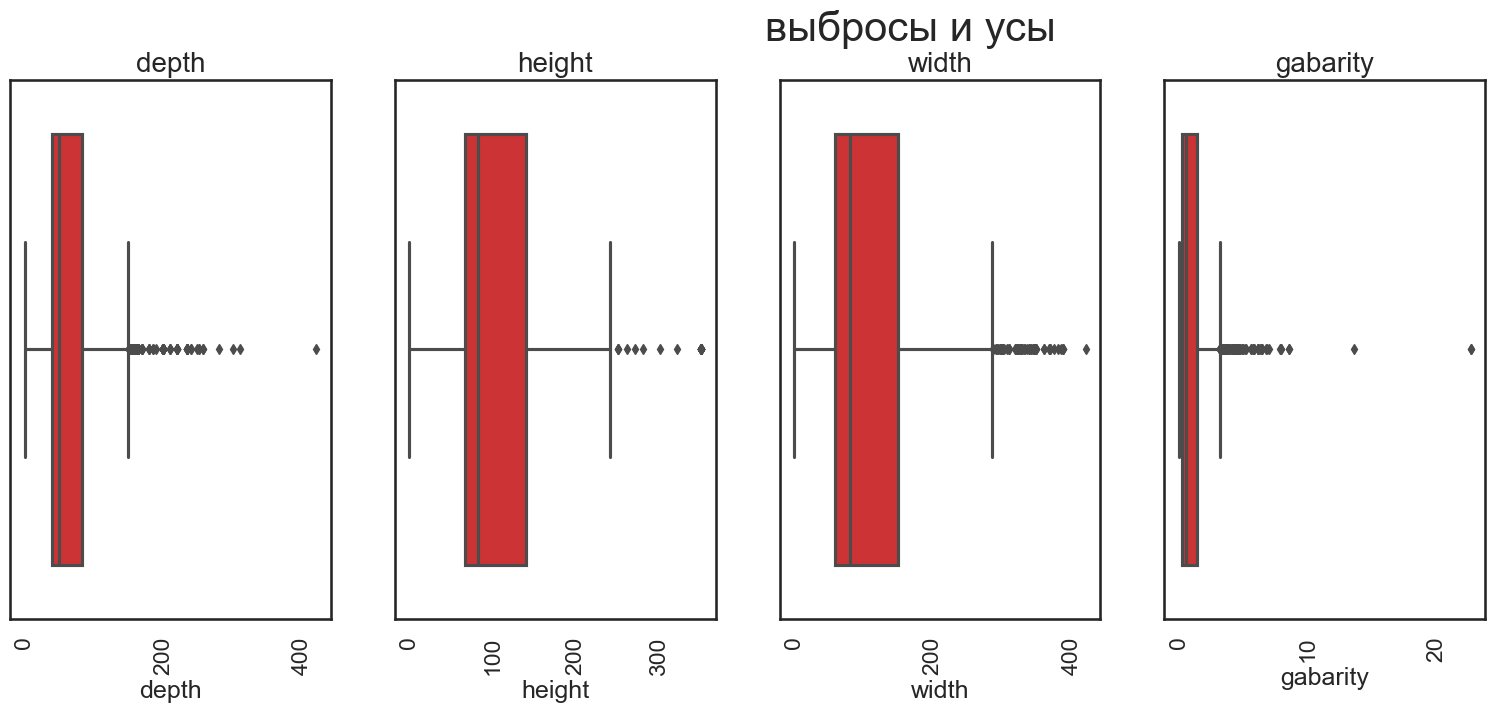

In [266]:
countanalyse('boxplot', ikea, ['depth','height', 'width','gabarity'], 1,5, 'выбросы и усы','')

<h2 style="color:#003399">PRICE</h2>

In [ ]:
countanalyse('boxplot', ikea, ['price','old_price'], 1,2, 'выбросы и усы','')

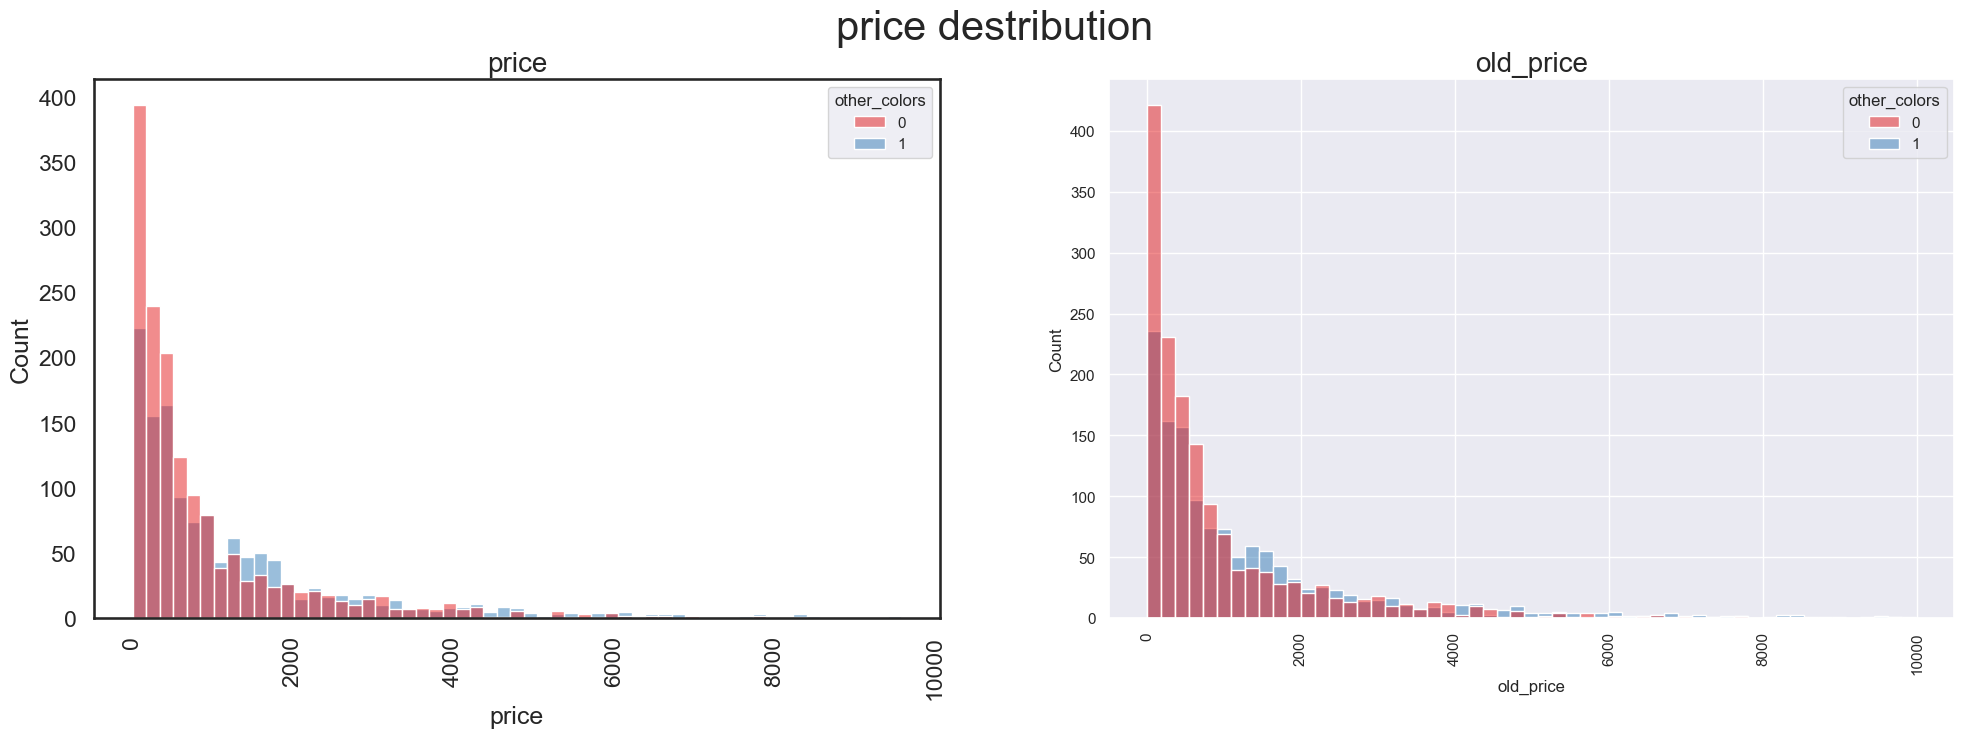

In [267]:
countanalyse('histplot_hue', ikea, ['price','old_price'], 1,2, 'price destribution','other_colors')

наличие других цветов не повлияло на наличие скидки

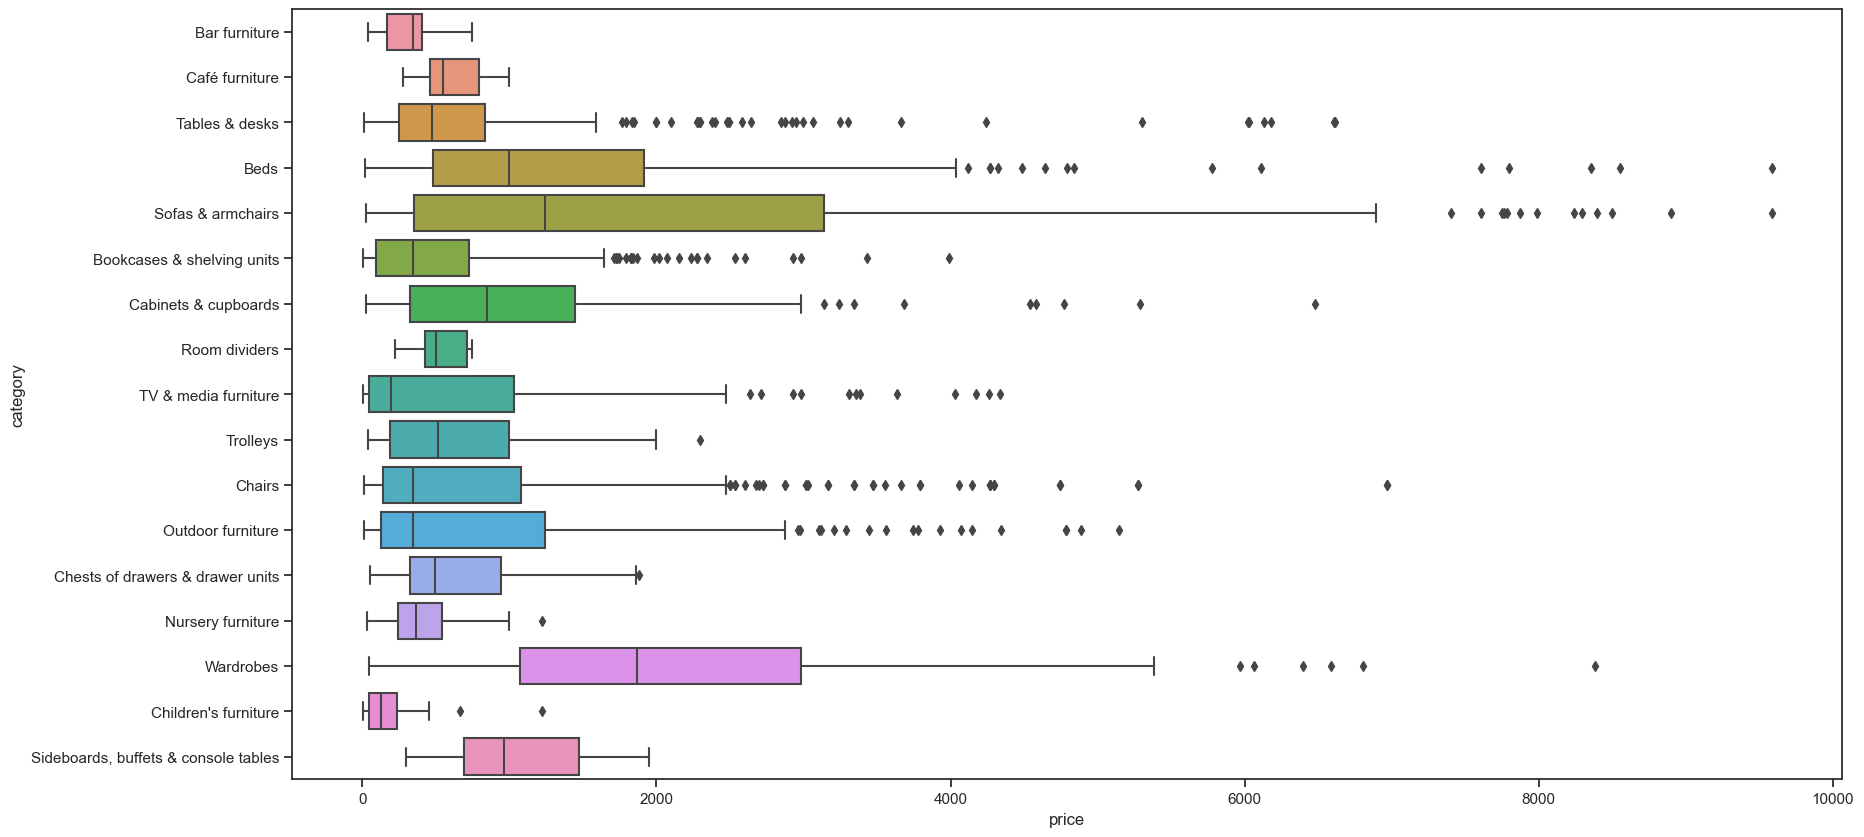

In [268]:
fig = plt.figure(figsize=(20, 10))
with sns.axes_style(style='ticks'):
    sns.boxplot("price", "category", data=ikea)

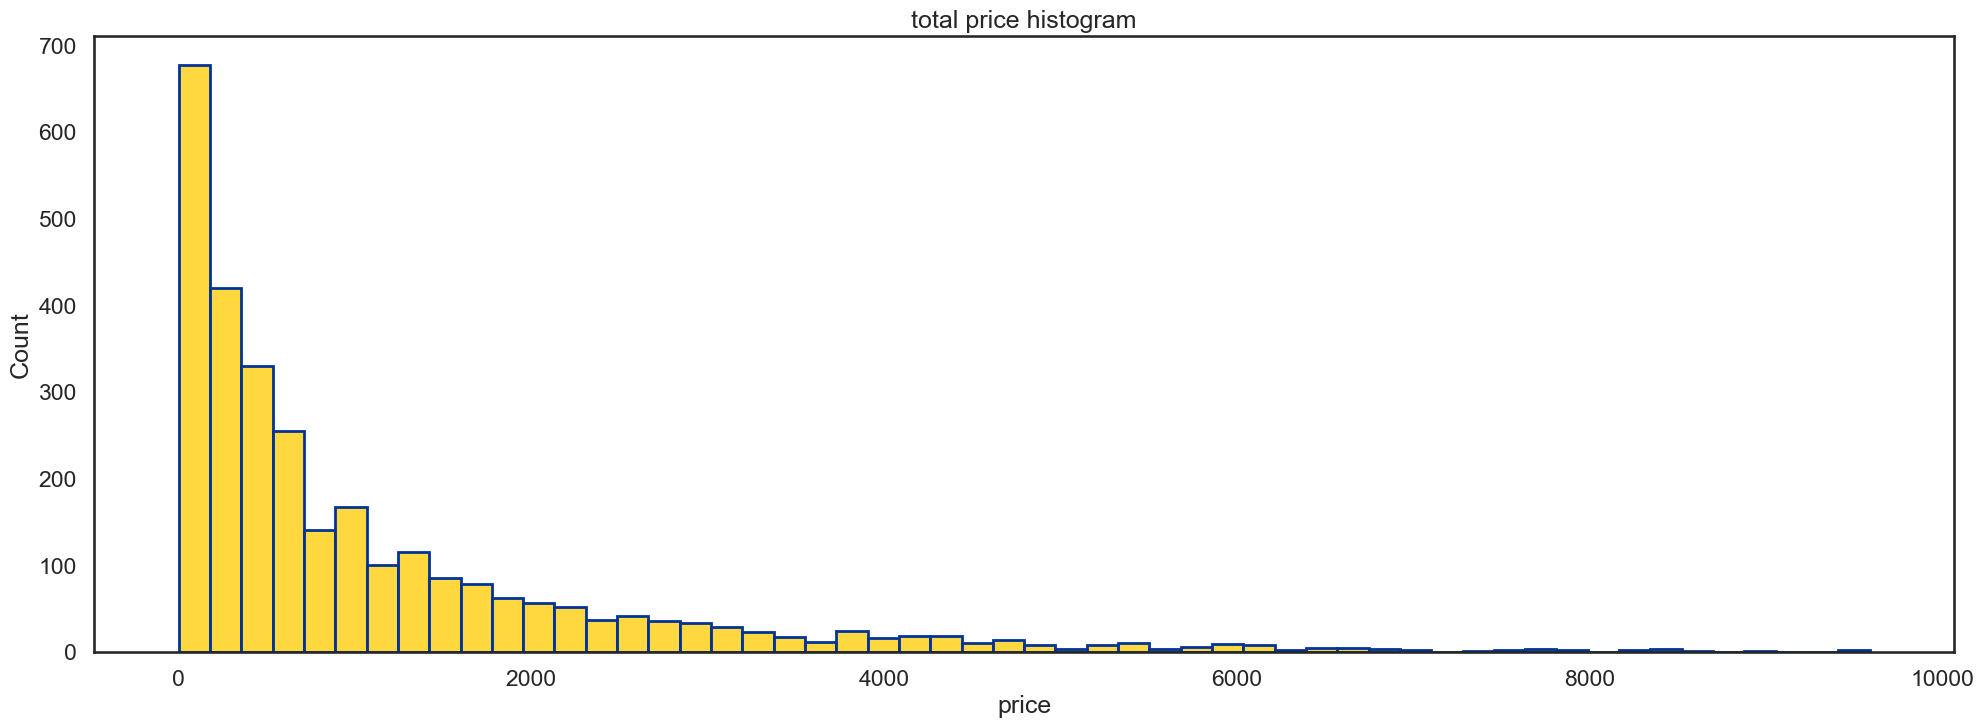

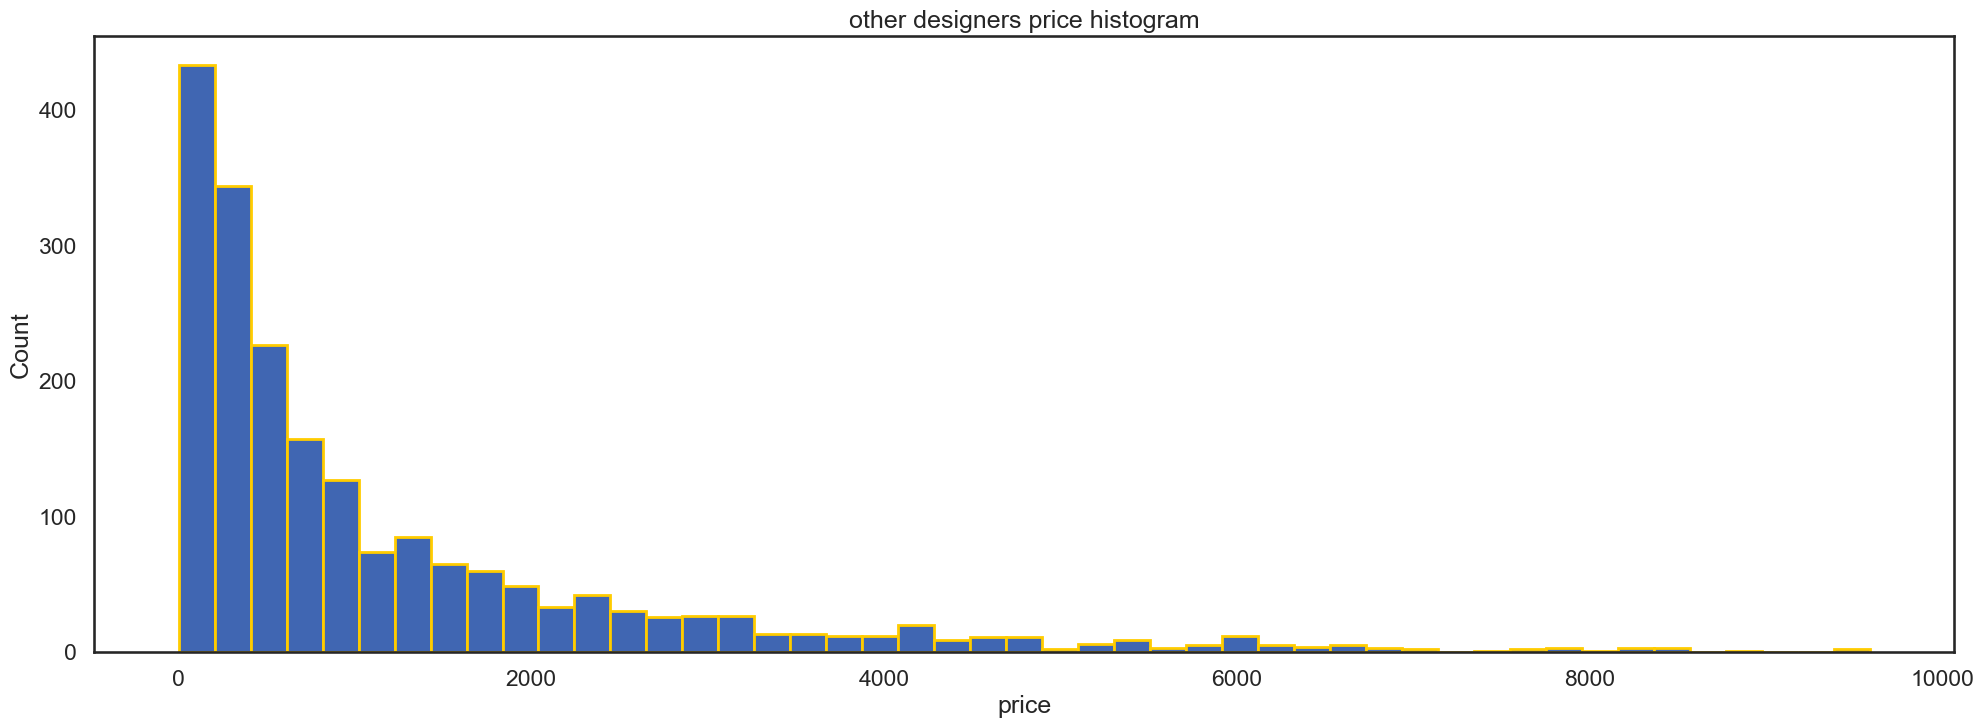

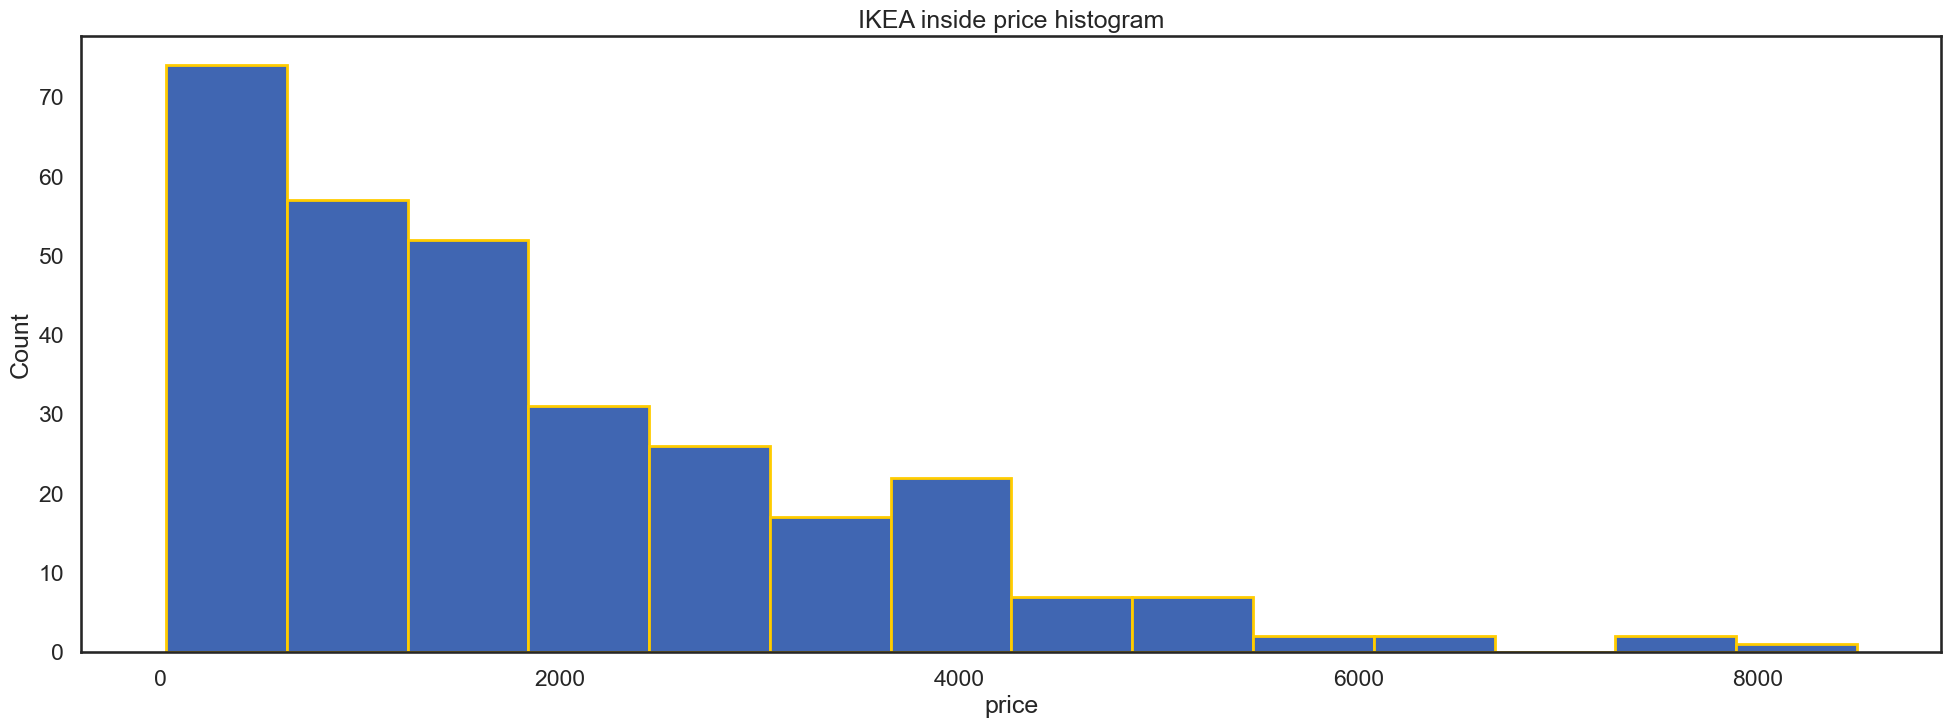

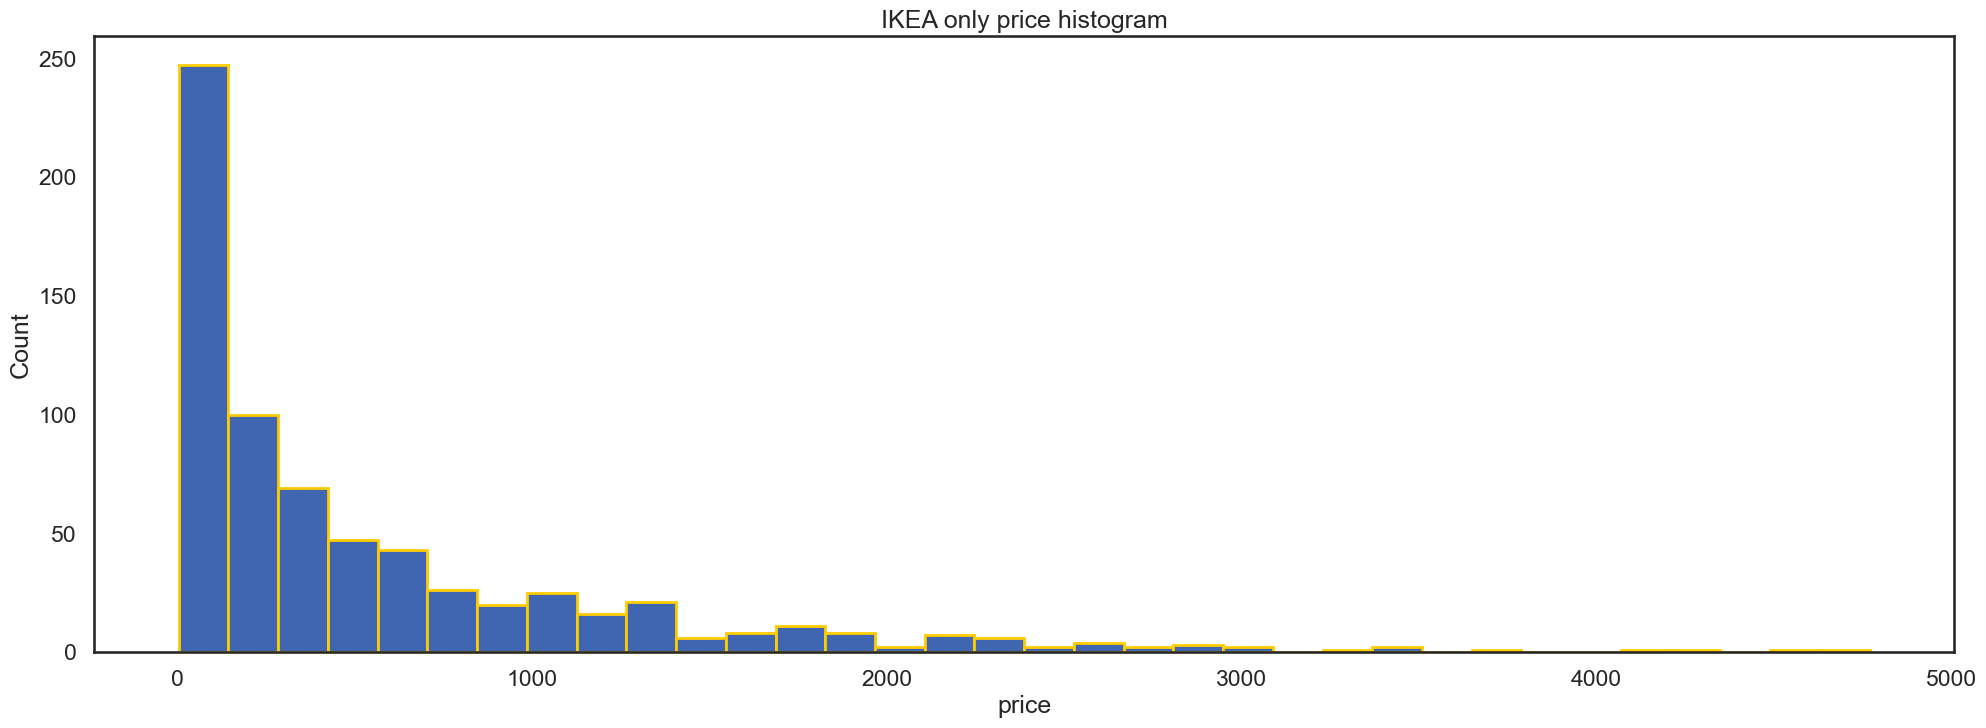

In [241]:
fig, axes = plt.subplots(figsize=(24,8))
sns.histplot(data=ikea, x='price', color='#ffcc00',linewidth=2, edgecolor="#003399")
plt.title('total price histogram')
for i in ikea['Ikea'].unique():
    fig, axes = plt.subplots(figsize=(24,8))
    sns.set(1,3,context='talk', style='white')
    tab = ikea[ikea['Ikea']==i]
    
    sns.histplot(data=tab, x='price',color='#003399',linewidth=2, edgecolor='#ffcc00')
    plt.title(f'{i} price histogram')

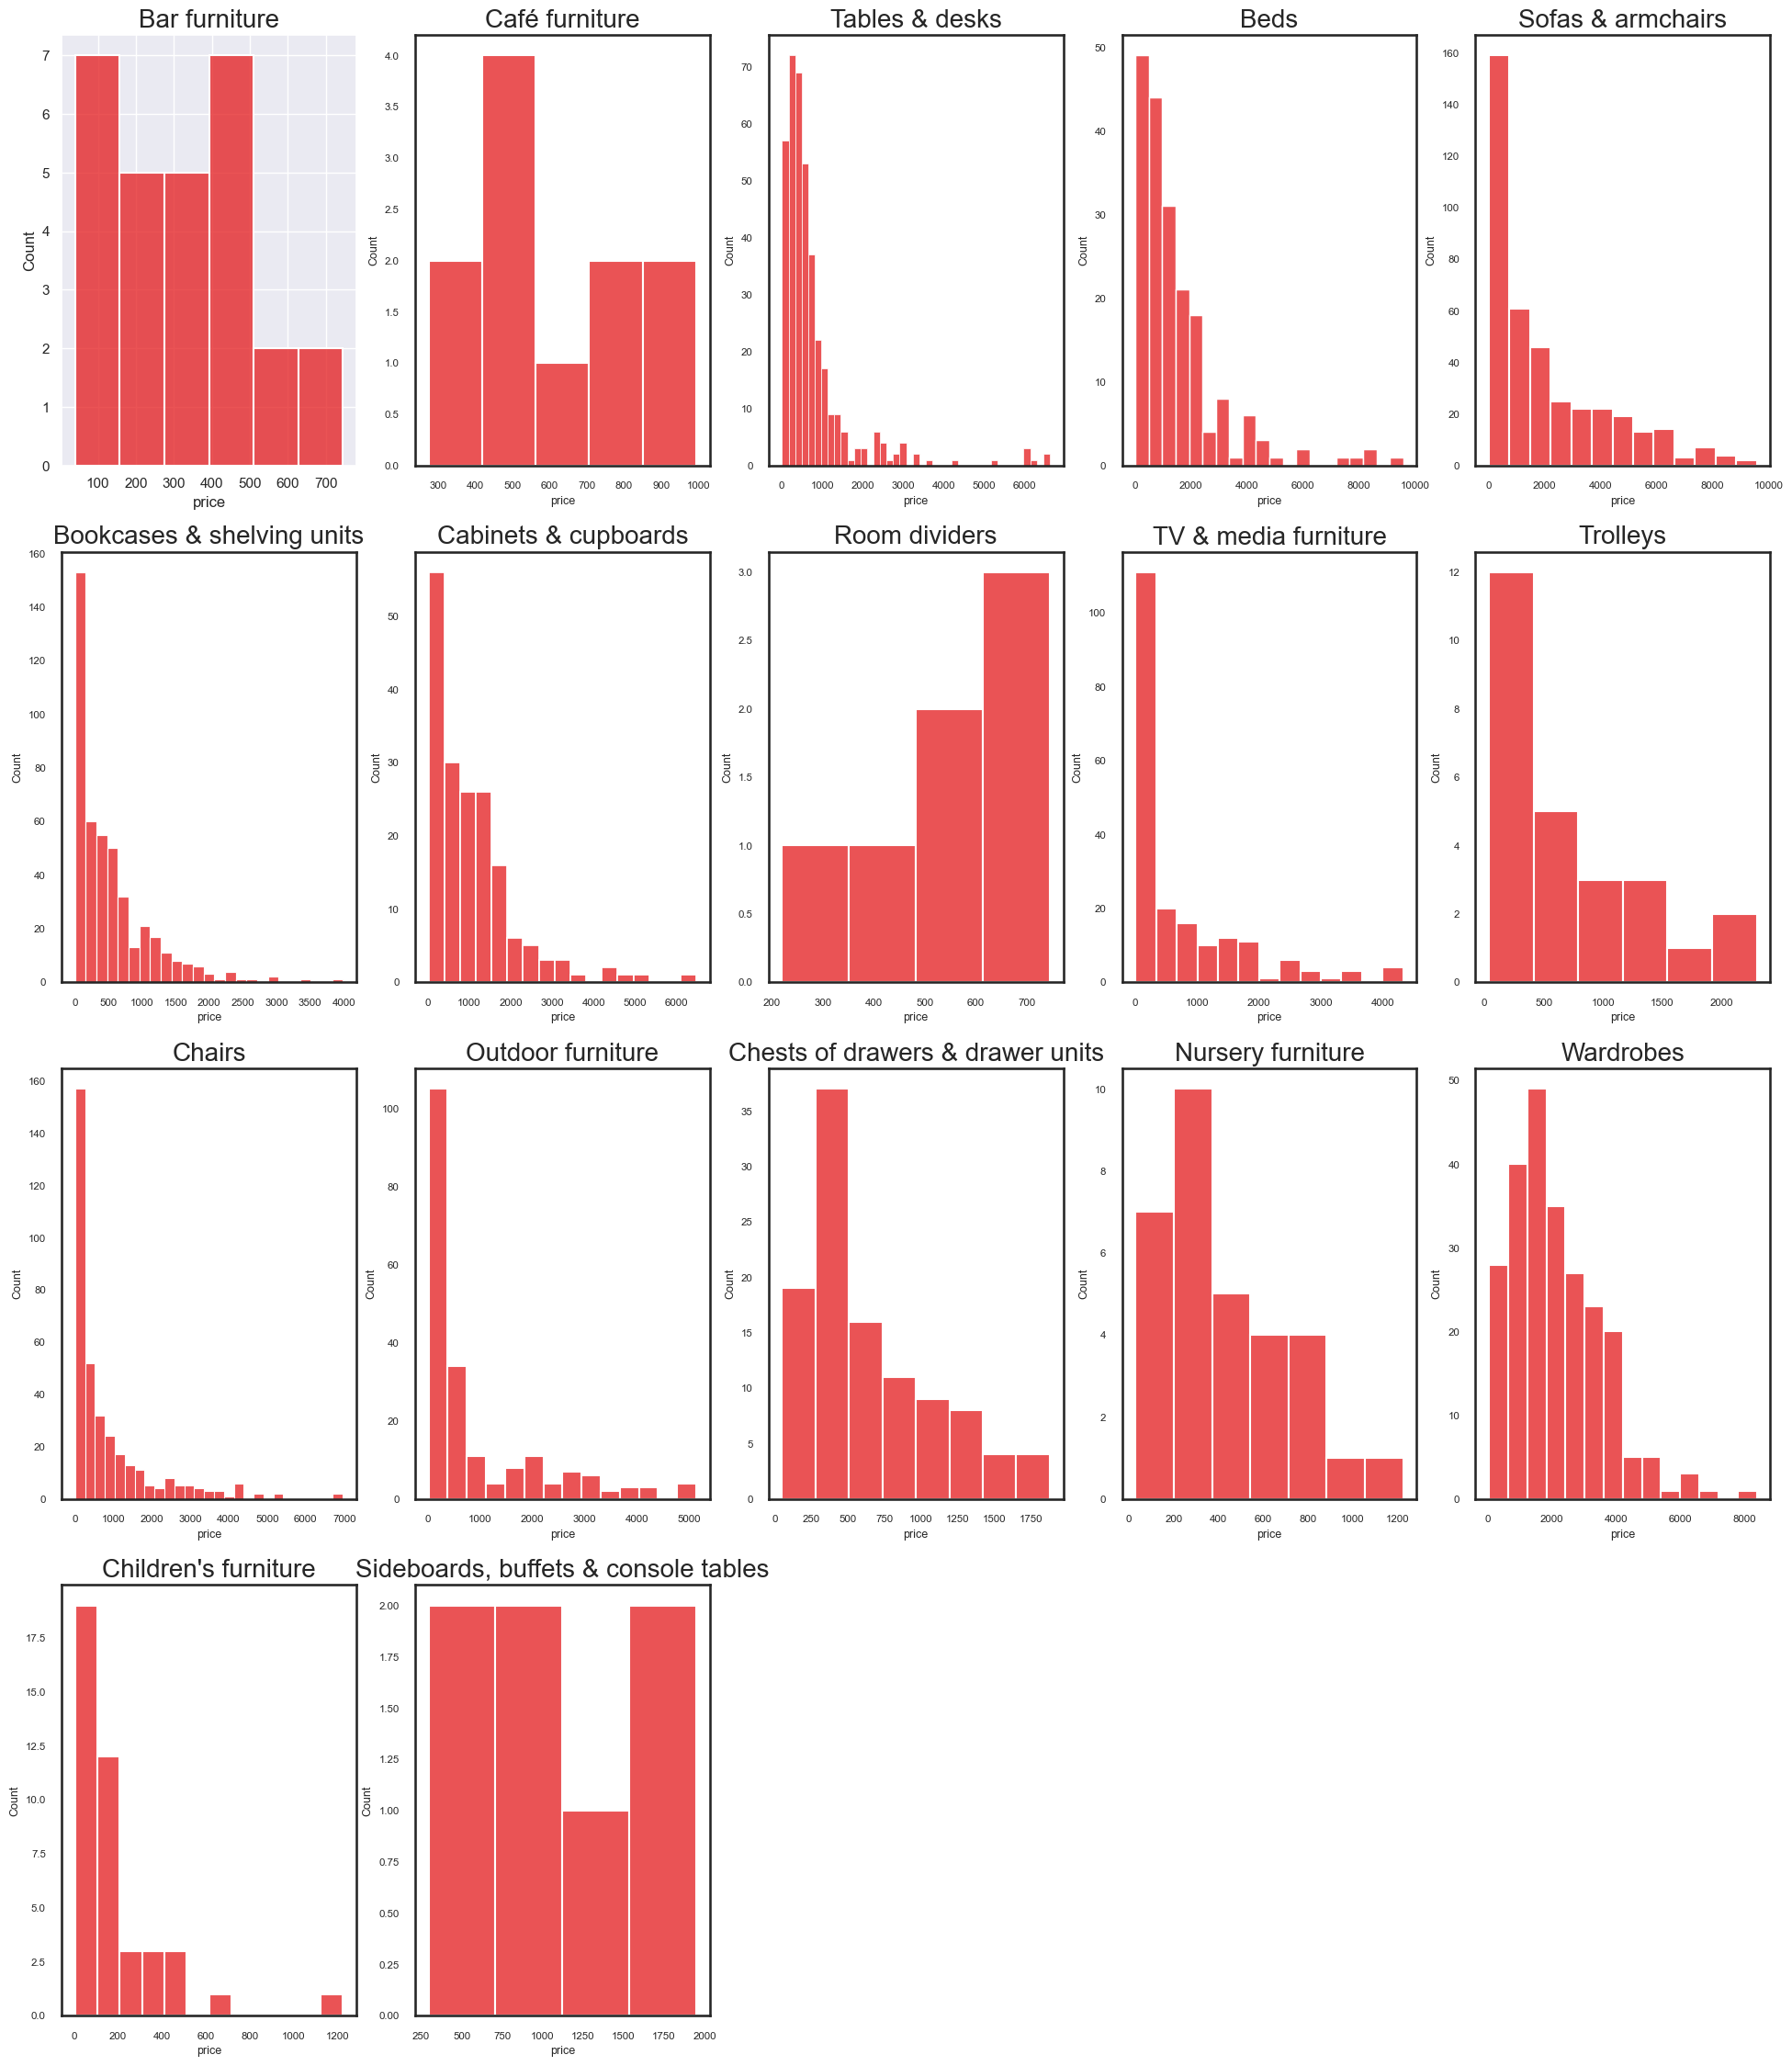

In [269]:
fig, axes = plt.subplots(figsize=(24, 28))
fig.suptitle("",fontsize=30)
for  i, el in enumerate(ikea.category.unique()):
    plt.subplot(4,5, i+1)
    plt.title(el,   fontsize=20)
    sns.set(context='talk',style='white', palette='Set1',font_scale=.5)
    sns.histplot(data=ikea[ikea['category']==el], x="price")

<p style="color:#003399; background-color:#ffcc00; padding: 20px; font-size: 26px">Based on EDA and common sense, choose two hypotheses that you want to test/analyze. For each hypothesis, list the null hypothesis and other possible alternative hypotheses, design tests to distinguish between them, and run them. Describe the results.</p><p>Основываясь на EDA и здравом смысле, выберите две гипотезы, которые вы хотите проверить / проанализировать. Для каждой гипотезы перечислите нулевую гипотезу и другие возможные альтернативные гипотезы, разработайте тесты, чтобы различать их, и выполните их. Опишите результаты.</p>

In [270]:
ikea_droped = ikea.copy(deep=True)
ikea_droped.drop(columns=['gabarity'],inplace=True)
ikea_droped.dropna(inplace=True)
ikea_droped.head(5)

collection        category   price  old_price  other_colors  \
0              FREKVENS   Bar furniture  265.00     265.00             0   
1             NORDVIKEN  Café furniture  995.00     995.00             0   
3                  STIG   Bar furniture   69.00      69.00             1   
4               NORBERG  Tables & desks  225.00     225.00             0   
5                INGOLF   Bar furniture  345.00     345.00             0   
...                 ...             ...     ...        ...           ...   
3688   MEHAMN/AULI/PAX        Wardrobes 2045.00    2045.00             0   
3689            ELVARLI       Wardrobes  750.00     820.00             0   
3690            ELVARLI       Wardrobes 1572.00    1755.00             0   
3691            ELVARLI       Wardrobes  924.00    1050.00             0   
3692            ELVARLI       Wardrobes 2745.00    3130.00             0   

                            designer  depth  height  width  \
0               Nicholai Wiig Hansen  51.00   99.00  51.00   
1                  Francis Cayouette 140.00  105.00  80.00   
3                      Henrik Preutz  50.00  100.00  60.00   
4                     Marcus Arvonen  60.00   43.00  74.00   
5                       Carina Bengs  45.00   91.00  40.00   
...                              ...    ...     ...    ...   
3688  Ehlén Johansson/IKEA of Sweden  66.00  236.00 200.00   
3689                 Ehlén Johansson  50.00  350.00  91.00   
3690                 Ehlén Johansson  50.00  350.00 135.00   
3691                 Ehlén Johansson  50.00  350.00 175.00   
3692                 Ehlén Johansson  50.00  350.00 178.00   

                              name             Ikea  collection_set  \
0            Bar table, in/outdoor  other designers               1   
1                        Bar table  other designers               1   
3          Bar stool with backrest  other designers               1   
4     Wall-mounted drop-leaf table  other designers               1   
5          Bar stool with backrest  other designers               1   
...                            ...              ...             ...   
3688          Wardrobe combination      IKEA inside               3   
3689                     1 section  other designers               1   
3690                    2 sections  other designers               1   
3691                    2 sections  other designers               1   
3692                    3 sections  other designers               1   

      designer_set  
0                1  
1                1  
3                1  
4                1  
5                1  
...            ...  
3688             2  
3689             1  
3690             1  
3691             1  
3692             1  

[2051 rows x 13 columns]

In [271]:
import scipy as sc
tab=pd.crosstab( ikea_droped['designer'], ikea_droped['category'],
                margins=False)

chi = stats.chi2_contingency(observed=tab,correction=False)
significance_level = 0.05
# pea = sc.stats.pearsonr(ikea_d['price'], ikea_d['depth'])
# spi=sc.stats.spearmanr(ikea_d['width'], ikea_d['depth'])
print('Мы отвергаем нулевую гипотезу и принимаем претензию альтернативной гипотезы что две фичи зависимы' \
      if chi[1]<=significance_level  else 'Может быть принята с ошибкой первого рода = значит две фичи независимы')
print("p_value: " +str(chi[1]))

Мы отвергаем нулевую гипотезу и принимаем претензию альтернативной гипотезы что две фичи зависимы
p_value: 0.0


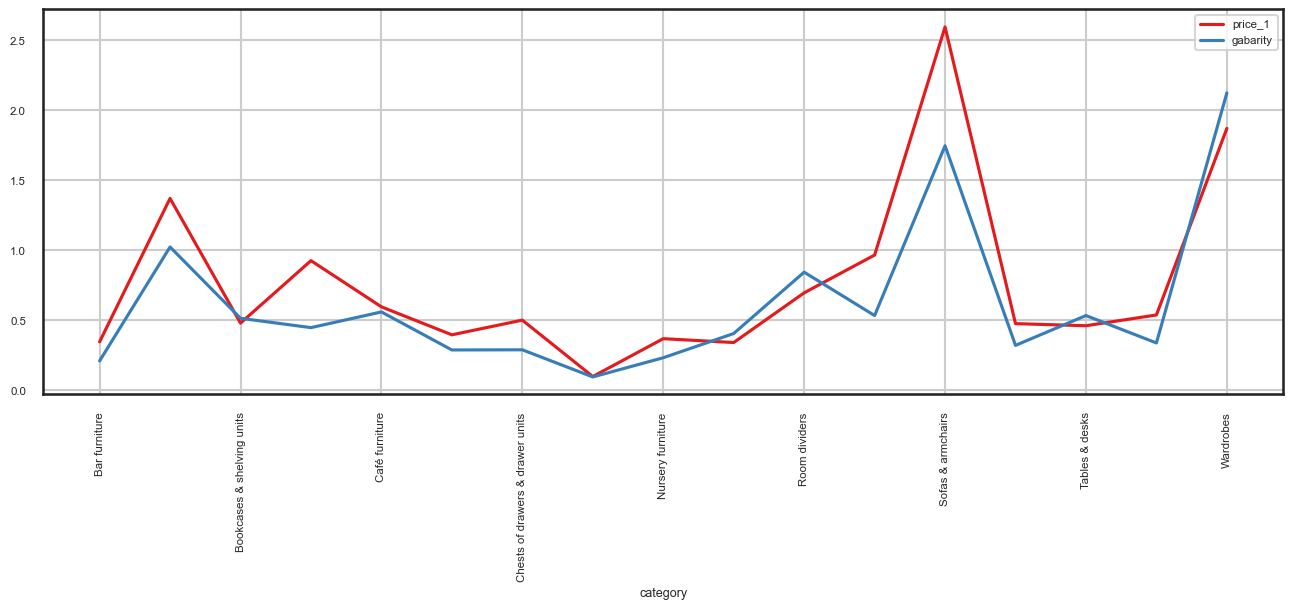

In [272]:
def plot(categorical):
    ikea_droped['price_1'] = ikea_droped.price/1000
    ikea_droped['gabarity']=(ikea_droped.width/100)*(ikea_droped.depth/100)*(ikea_droped.height/100)
    plt.rcParams["figure.figsize"] = (16,5)
    ikea_droped.groupby([categorical])['price_1','gabarity'].median().plot()
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()
    ikea_droped.drop(columns=['price_1'], inplace=True)
plot('category')

<div style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">check our data for normality using the Shapiro test and qq test:</p>
<ul>
    <li>H_0 - price data set for products created with additional designers obtained from normal distribution.</li>
    <li>H_1 - set of numerical data obtained from a non-nomal distribution</li>
    <li>significance_level = 5%</li>
</ul>
</div>
<p>проверим наши данные на нормальность с помощью критерия Шапиро и qq test:</p>
<ul>
    <li>H_0 - набор данных price для товаров созданных с помощью доп дизайнеров получен из нормального распределения.</li>
    <li>H_1 - набор численных данных получен из не номального распределения</li>
    <li>significance_level = 5%</li>
</ul>

p-value price:  False 4.864866495757347e-11


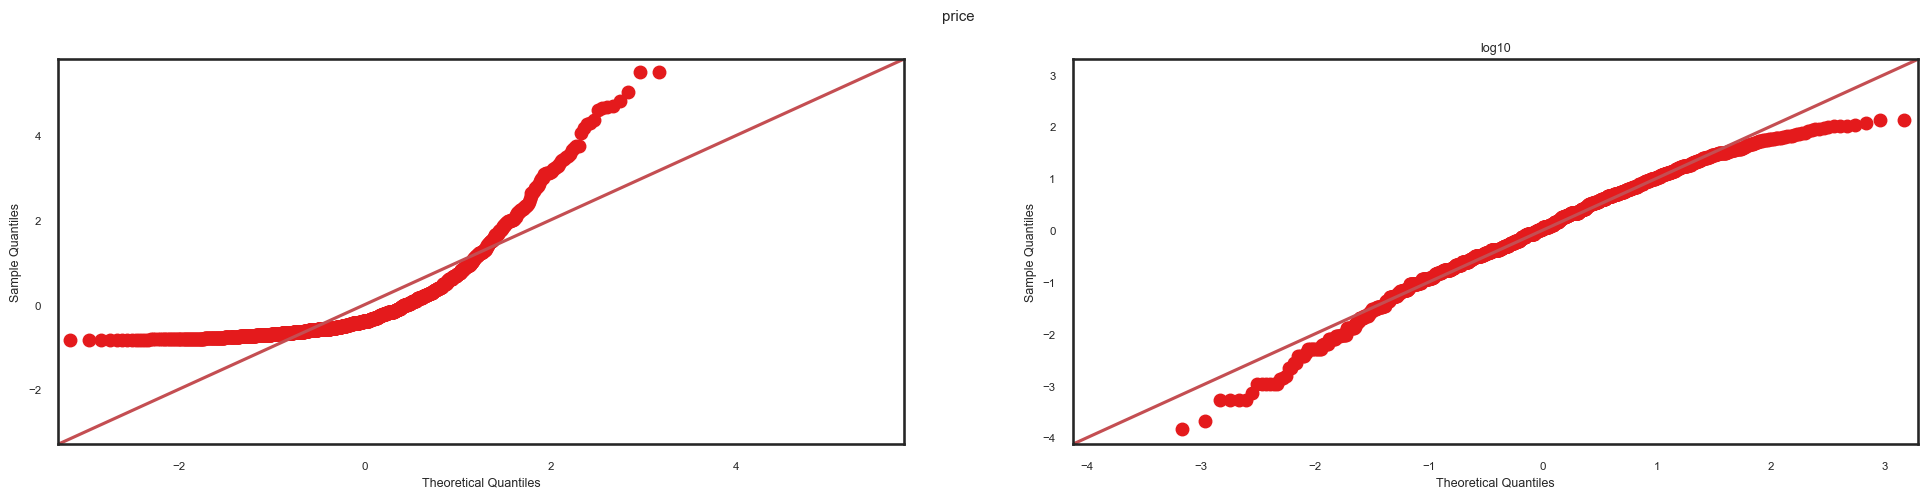

In [273]:
tab=ikea_droped[ikea_droped['Ikea']=='other designers']
var_price = (np.log10(tab.price) - np.log10(tab.price).mean())/np.log10(tab.price).std()
res_p = stats.shapiro(var_price)
print('p-value price: ', res_p[1]>0.05, res_p[1])

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

for j in ['price']:
    data=tab[j]
    data_log = np.log10(data)
    fig, axes = plt.subplots(1, 2, figsize=(24,5))
    fig.suptitle(f'{j}')
    for i, cols in enumerate([data, data_log]):
        plt.title('log10')
        sm.qqplot(cols, line = "45",fit = True, ax=axes[i])
plt.show()

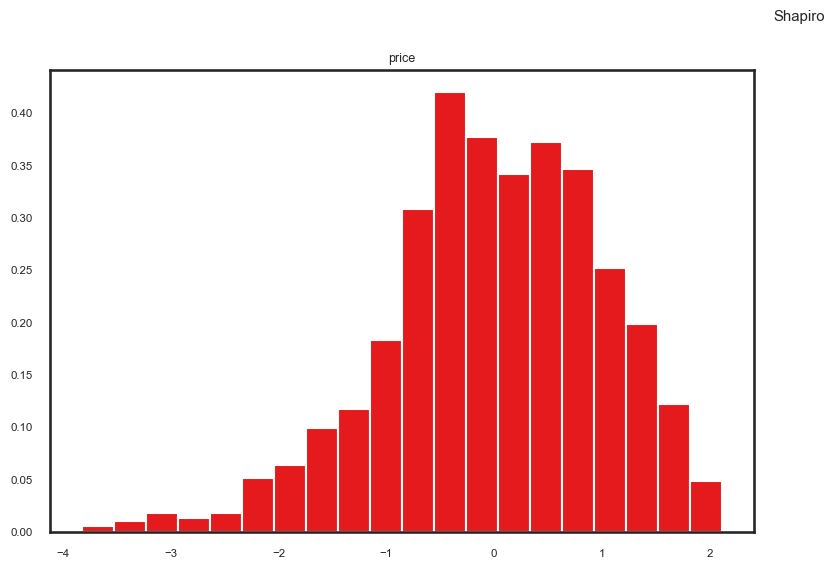

In [274]:
import statsmodels.api as sm

arr=[var_price]
arr_name=['price']
fig, axes = plt.subplots(figsize=(20,6))
fig.suptitle('Shapiro')
for i, el in enumerate(arr):
    plt.subplot(1, 2, i+1)
    plt.title(f'{arr_name[i]}')
    plt.hist(x=el, bins=20 ,density=True)

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">The p-value of the test turns out to be very small. Since this value is less than 0.05, we have enough evidence to say that the sample data is not derived from normal sizes. however, the quantile test shows that the price distribution is very close to normal, and the height distribution is clearly bimodal.</p>
<i>Значение p теста оказывается очень маленьким. Поскольку это значение меньше 0,05, у нас есть достаточно доказательств, чтобы сказать, что данные выборки не получены из габаритов с нормальным распределением. однако квантиль тест показывает что распределение цены очень близко к нормальному, а распределение высоты явно бимодальное.</i>

In [275]:
# сравнение распределений 
def equality_var(var_hipt, var_samp, name, alt):
#     hipt =  (var_hipt-var_hipt.mean())/var_hipt.std()
#     samp = (var_samp-var_samp.mean())/var_samp.std()
    hipt=var_hipt
    samp=var_samp
    res_man = stats.mannwhitneyu(hipt, samp, alternative=alt) # Mann Whitneyu тест 
    res_ks = stats.ks_2samp(hipt, samp)#критерий Смирнова
    res_km = stats.kstest(hipt, samp)#критерий Колмагорова
    res_flig= stats.fligner(hipt,samp) #тест на равность дисперсий
    res_st_f = stats.ttest_ind(hipt, samp, equal_var=False) #критерий Стьдента
    res_st_t = stats.ttest_ind(hipt, samp, equal_var=True) #критерий Cтюдента
    res_st = stats.ttest_ind(hipt, samp) #критерий Cтюдента
    print(f'{name}\n\
           Mann Whitneyu p_value: {res_man[1]>0.05} {res_man[0]:.7f} {res_man[1]:.7f}\n\
           Smirnov p_value:       {res_ks[1]>0.05} {res_ks[0]:.7f} {res_ks[1]:.7f}\n\
           Kolmagorov p_value:    {res_km[1]>0.05} {res_km[0]:.7f} {res_km[1]:.7f}\n\
           Fligner p_value:       {res_flig[1]>0.05} {res_flig[0]:.7f} {res_flig[1]:.7f}\n\
           Student p_value:       {res_st_f[1]>0.05} {res_st_f[0]:.7f} {res_st_f[1]:.7f}\n\
           Student p_value:       {res_st_t[1]>0.05} {res_st_t[0]:.7f} {res_st_t[1]:.7f}\n\
           Student p_value:       {res_st[1]>0.05} {res_st[0]:.7f} {res_st[1]:.7f}'.format())


In [276]:
#отрисовка гистограмм  
def histograms( xx, yy, x_name, y_name ):
    plt.hist(xx, alpha=0.9, color='red', bins=20, weights=[1./len(xx)]*len(xx))
    plt.hist(yy, alpha=0.7, color='blue', bins=20, weights=[1./len(yy)]*len(yy))
    
    plt.axvline(xx.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(yy.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.axvline(xx.median(), color='red', alpha=0.8, linestyle='dotted')
    
    plt.axvline(yy.median(), color='blue', alpha=0.8, linestyle='dotted')
    plt.legend([x_name, y_name])

In [277]:
ikea['category'].value_counts()

Bookcases & shelving units              447
Sofas & armchairs                       397
Tables & desks                          386
Chairs                                  356
Wardrobes                               238
Outdoor furniture                       202
TV & media furniture                    198
Beds                                    193
Cabinets & cupboards                    177
Chests of drawers & drawer units        108
Children's furniture                     42
Nursery furniture                        32
Bar furniture                            28
Trolleys                                 26
Café furniture                           11
Room dividers                             7
Sideboards, buffets & console tables      7
Name: category, dtype: int64

(-1.0999999846465096,
 1.0999999992688814,
 -1.0999993020658085,
 1.099999965731958)

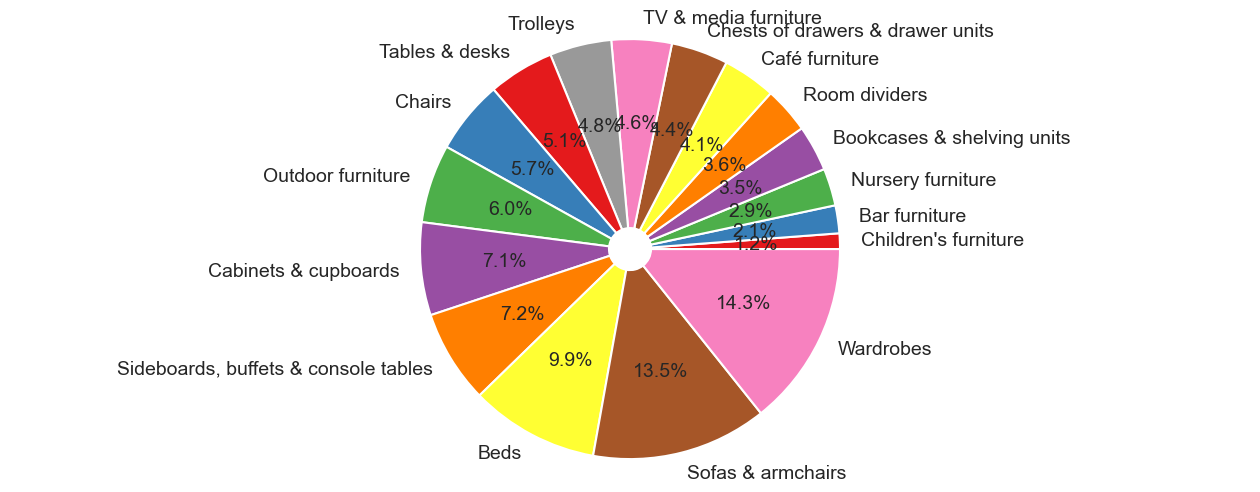

In [278]:
val=ikea[['category','price']].groupby('category').agg({'price':'mean'}).sort_values(by='price').reset_index().dropna()

fig, ax = plt.subplots(figsize=(16,6))
vals = val.price
labels = val.category.unique()
ax.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.9), textprops={'fontsize': 14})
ax.axis("equal")


<div style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">
<p>I assume that since the mean of Nursery furniture price is relitively similar the mean price of 'Bar Furniture, I would like to check if this result is statistically significant.</p>
<ul>
<li>H_0 : 'Nursery furniture' price destribution equal 'Bar furniture' price destribution
that we would like to reject of the Alternative Hypothesis</li>
<li>H_1: 'Nursery furniture' price destribution not equal 'Bar furniture' price destribution</li>
    <li> significance level alpha is 0.05</li> 
H0 => µ1 = µ2 (population mean of dataset1 is equal to dataset2)

HA => µ1 ≠µ2 (population mean of dataset1 is different from dataset2)

In [279]:
var_hipt=ikea_droped[ikea_droped.category=='Nursery furniture'].price
var_samp=ikea_droped[ikea_droped.category=='Bar furniture'].price

In [280]:
print(len(var_hipt)+len(var_samp)-2)

52


<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">Check the normality of both destribution by Shapiro критерий с confidence level = 95% </p>

In [281]:
hipt=(var_hipt-var_hipt.mean())/var_hipt.std()
res_h=stats.shapiro(hipt)
samp=(var_samp-var_samp.mean())/var_samp.std()
res_s=stats.shapiro(samp)
print('p_value Nursery furniture price : ', res_h[1]>0.05, res_h[1])
print('p_value Bar furniture price : ', res_s[1]>0.05, res_s[1])

p_value Nursery furniture price :  False 0.015131528489291668
p_value Bar furniture price :  True 0.13381700217723846


t_crit(df=52, confidence_level=95%) = 2.007 Significance Level  = 0.05 

In [282]:
name='price'
equality_var(var_hipt, var_samp, name,'two-sided')

price
           Mann Whitneyu p_value: True 432.5000000 0.2385935
           Smirnov p_value:       True 0.2197802 0.4437035
           Kolmagorov p_value:    True 0.2197802 0.4437035
           Fligner p_value:       True 0.7048530 0.4011578
           Student p_value:       True 1.3936849 0.1697668
           Student p_value:       True 1.3759063 0.1747480
           Student p_value:       True 1.3759063 0.1747480


t < t_crit  and p_value > alpha so we cannot reject H0

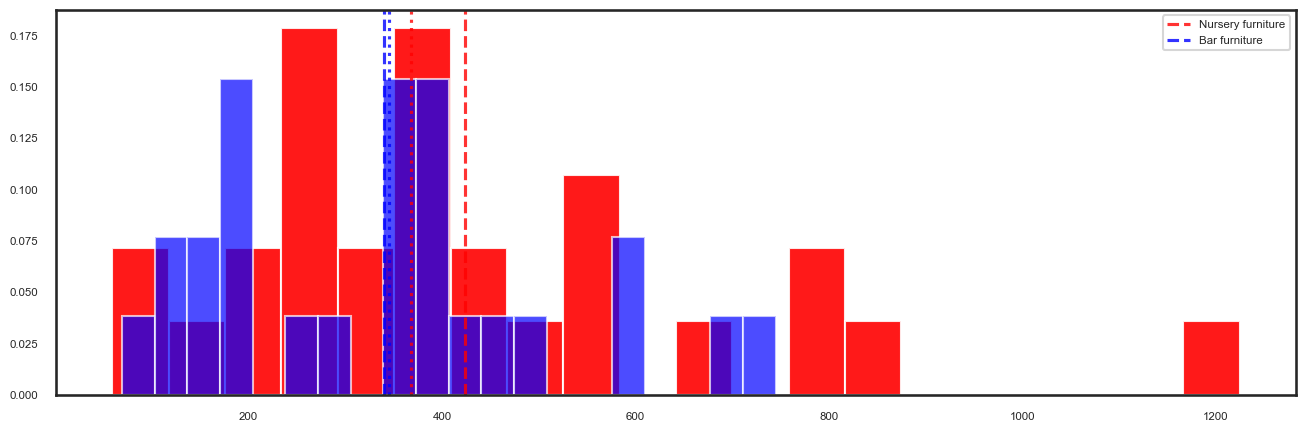

In [283]:
histograms( var_hipt, var_samp, 'Nursery furniture', 'Bar furniture'  )

In [284]:
#проверка на соответствие распределению (нормальному, равномерному, пуассоновскому или экспоненциальному).

def variation(col, col_name):
    data = (col - col.mean())/col.std()
    try:
        norm = stats.norm(loc=data.mean(), scale=data.std()).rvs(size=len(data))
        res_ks_n = stats.ks_2samp(norm, data).pvalue
        res_mw_n = stats.mannwhitneyu(norm, data).pvalue
        print(f'normal distribution       {col_name} ', f'KS P_value: {res_ks_n>0.05},'  f'  MW P_value: {res_mw_n>0.05}{res_mw_n}')
    except:
        pass
    try:
        poisson = stats.poisson.rvs(mu=data.mean(), size=len(data.astype(int)))
        res_ks_p = stats.ks_2samp(poisson, data).pvalue
        res_mw_p = stats.mannwhitneyu(poisson, data).pvalue
        print(f'Poisson distribution         {col_name} ', f'KS P_value: {res_ks_p>0.05},'  f'  MW P_value: {res_mw_p>0.05}{res_mw_p}')
    except:
        pass
    try:
        uniform = stats.uniform(data.mean()).rvs(size=len(data))
        res_ks_u = stats.ks_2samp(uniform, data).pvalue
        res_mw_u = stats.mannwhitneyu(uniform, data).pvalue
        print(f'uniform distribution     {col_name} ', f'KS P_value: {res_ks_u>0.05},'  f'  MW P_value: {res_mw_u>0.05}{res_mw_u}')
    except:
        pass
    try:
        expon = stats.expon.rvs(size=len(data))
        res_ks_e = stats.ks_2samp(expon, data).pvalue
        res_mw_e = stats.mannwhitneyu(expon, data).pvalue
        print(f'exponential distribution {col_name} ', f'KS P_value: {res_ks_e>0.05}',  f'  MW P_value: {res_mw_e>0.05}{res_mw_e}')
    except:
        pass
    try:
        lognorm = stats.lognorm.rvs(s=data.min(), scale=data.std(), size=len(data))
        res_ks_l = stats.ks_2samp(lognorm, data).pvalue
        res_mw_l = stats.mannwhitneyu(lognorm, data).pvalue
        print(f'lognormal distribution  {col_name} ', f'KS P_value: {res_ks_l>0.05}',  f'  MW P_value: {res_mw_l>0.05}{res_mw_l}')
    except:
        pass
    

In [285]:
variation(var_hipt, 'Nursery furniture price')
print('______________________________________')
variation(var_samp, 'Bar furniture price')

normal distribution       Nursery furniture price  KS P_value: True,  MW P_value: True0.5606998199710789
uniform distribution     Nursery furniture price  KS P_value: False,  MW P_value: False0.0007574358037449373
exponential distribution Nursery furniture price  KS P_value: False   MW P_value: False0.00021930414550716426
______________________________________
normal distribution       Bar furniture price  KS P_value: True,  MW P_value: True0.7348013927556367
Poisson distribution         Bar furniture price  KS P_value: False,  MW P_value: True0.31340772913475856
uniform distribution     Bar furniture price  KS P_value: False,  MW P_value: False0.0009495663591239783
exponential distribution Bar furniture price  KS P_value: False   MW P_value: False0.0005964307730786271


We can see, that these two data  that come from the same destribution - normal destribution

<div style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">
<p >When I looked at the designer data, I highlighted products created by the IKEA group and products created by outsourced designers. I'm guessing 'IKEA of Sweeden' isn't junk meaning, which means the items designed by the outsourced designers should cost more. Let's test this hypothesis:
<ul>
<li>H_0: price destribution for items designed with internal designers are equal to the items designed with external designers.</li>
<li>H_1: price destribution for items designed with internal designers significantly leas then items designed with external designers</li>
    <li> confidence level is 95%</li></ul></div><p>Когда я рассматривала данные по дизайнерам, я выделила товары созданные группой IKEA и товары созданные привлеченными дизайнерами. Я преполагаю, что 'IKEA of Sweeden' не является мусорным значением, а значит товары соэданные привлеченными дизайнерами должны стоить дороже. Проверим эту гипотезу:</p>

In [286]:
var_hipt1=ikea_droped[ikea_droped.Ikea =='IKEA only'].price
var_samp1=ikea_droped[ikea_droped.Ikea =='other designers'].price

In [287]:
print(f'IKEA only sample size :{len(var_hipt1)}          mean : {var_hipt1.mean()}   std : {var_hipt1.std()}\n\
other designers sample size: {len(var_samp1)}   mean: {var_samp1.mean()}   std: {var_samp1.std()}')

IKEA only sample size :475          mean : 687.1113684210527   std : 760.8715931501789
other designers sample size: 1321   mean: 1267.1988644965936   std: 1515.483915446146


<div style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">
<p>let's check if the means of samples from our data are normally distributed with the Shapiro-Wilk test for normality.</p>
<ul>
<li>H_0 hypothesis: the data was drawn from a normal distribution.</li>
<li>H_1 : the data was drawn from not normal distribution. </li>
<li>the chance of rejecting the null hypothesis when it is true is close to 5%</li> 

In [288]:
hipt1=(np.log10(var_hipt1)-np.log10(var_hipt1.mean()))/np.log10(var_hipt1.std())
res_h1=stats.shapiro(hipt1)
samp1=(np.log10(var_samp1)-np.log10(var_samp1.mean()))/np.log10(var_samp1.std())
res_s1=stats.shapiro(samp1)

print('p_value IKEA only price : ', res_h1[1]>0.05, res_h1[1])
print('p_value other designer price : ', res_s1[1]>0.05, res_s1[1])

p_value IKEA only price :  False 3.9597075556230266e-06
p_value other designer price :  False 4.86336214355898e-11


<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">we reject the H_0 hypothesis that our data are normaly distributed, so we need to use Mann Whitney test with one_tail.</p>

In [289]:
res_mann = stats.mannwhitneyu(var_hipt1, var_samp1,  alternative='less') # Mann Whitneyu тест 
print(f'Mann Whitneyu : {res_mann[1] > 0.05} {res_mann}') 

Mann Whitneyu : False MannwhitneyuResult(statistic=233865.5, pvalue=8.619393464834947e-17)


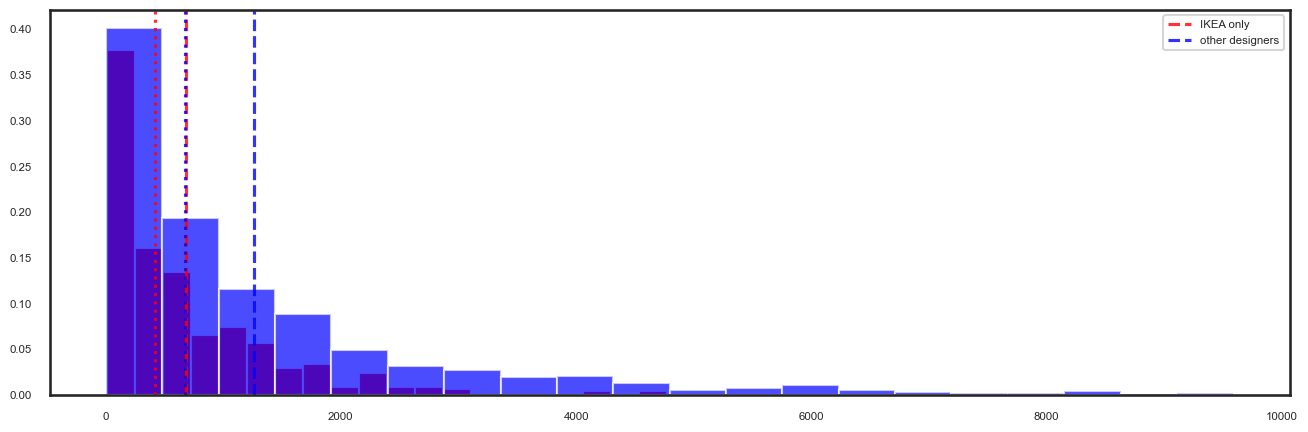

In [290]:
histograms(var_hipt1, var_samp1, 'IKEA only', 'other designers')

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">the null hypothesis is lower than 5%, so we can reject it at a confidence level of 5%,  in favor of the alternative, that the destribution of prices for items designed by IKEA staff are less then items designed by external designers.</p>

In [291]:
#создадим функцию сравнения дисперсий

In [292]:
variation(np.log10(var_hipt1), 'IKEA only price' )

print('___________________________________________')

variation(np.log10(var_samp1), 'other designers price')

normal distribution       IKEA only price  KS P_value: False,  MW P_value: True0.3479251167854035
Poisson distribution         IKEA only price  KS P_value: False,  MW P_value: False0.03560482952960373
uniform distribution     IKEA only price  KS P_value: False,  MW P_value: False5.852661152649462e-14
exponential distribution IKEA only price  KS P_value: False   MW P_value: False1.071986968295702e-31
___________________________________________
normal distribution       other designers price  KS P_value: False,  MW P_value: True0.186480322976473
Poisson distribution         other designers price  KS P_value: False,  MW P_value: True0.44944942917195296
uniform distribution     other designers price  KS P_value: False,  MW P_value: False9.791858546459599e-49
exponential distribution other designers price  KS P_value: False   MW P_value: False3.1672960666569877e-107


and checking diferenr destricution we can see that 'Ikea only prices' closer the same as 'other designer destribution' 

<p style="color:#003399; background-color:#ffcc00; padding: 20px; font-size: 26px">
    Train the model to predict the price of furniture.
Please advise which columns should not be included in the model and why.
Create a cross-validation pipeline to train and evaluate the model, including (if necessary) steps such as filling in missing values and normalizing.
Suggest methods to improve model performance.
Describe the results</p>
<p>Обучите модель предсказывать цену на мебель.
Посоветуйте, какие столбцы не следует включать в модель и почему.
Создайте пайплайн кросс-валидации для обучения и оценки модели, включая (при необходимости) такие шаги, как заполнение пропущенных значений и нормализация.
Предложите методы повышения производительности модели.
Опишите результаты<p>

In [293]:
print(f'depth_NaN: {round(ikea.depth.isnull().sum()*100/len(ikea.depth), 2)}%')

depth_NaN: 22.59%


In [294]:
print(f'height_NaN:{round(ikea.height.isnull().sum()*100/len(ikea.height),2)}%')

height_NaN:19.72%


In [295]:
print(f'width_NaN: {round(ikea.width.isnull().sum()*100/len(ikea.width),2)}%')

width_NaN: 13.42%


In [296]:
print(f'gabarity_NaN: {round(ikea.gabarity.isnull().sum()*100/len(ikea.gabarity),2)}%')

gabarity_NaN: 25.5%


Унас есть 25%данных с отсутвующими данными

In [297]:
# correlation with other features
correlation = ikea.corr()
w=correlation['width'].sort_values(ascending = False)
d=correlation['depth'].sort_values(ascending = False)
h=correlation['height'].sort_values(ascending = False)
p=correlation['price'].sort_values(ascending = False)

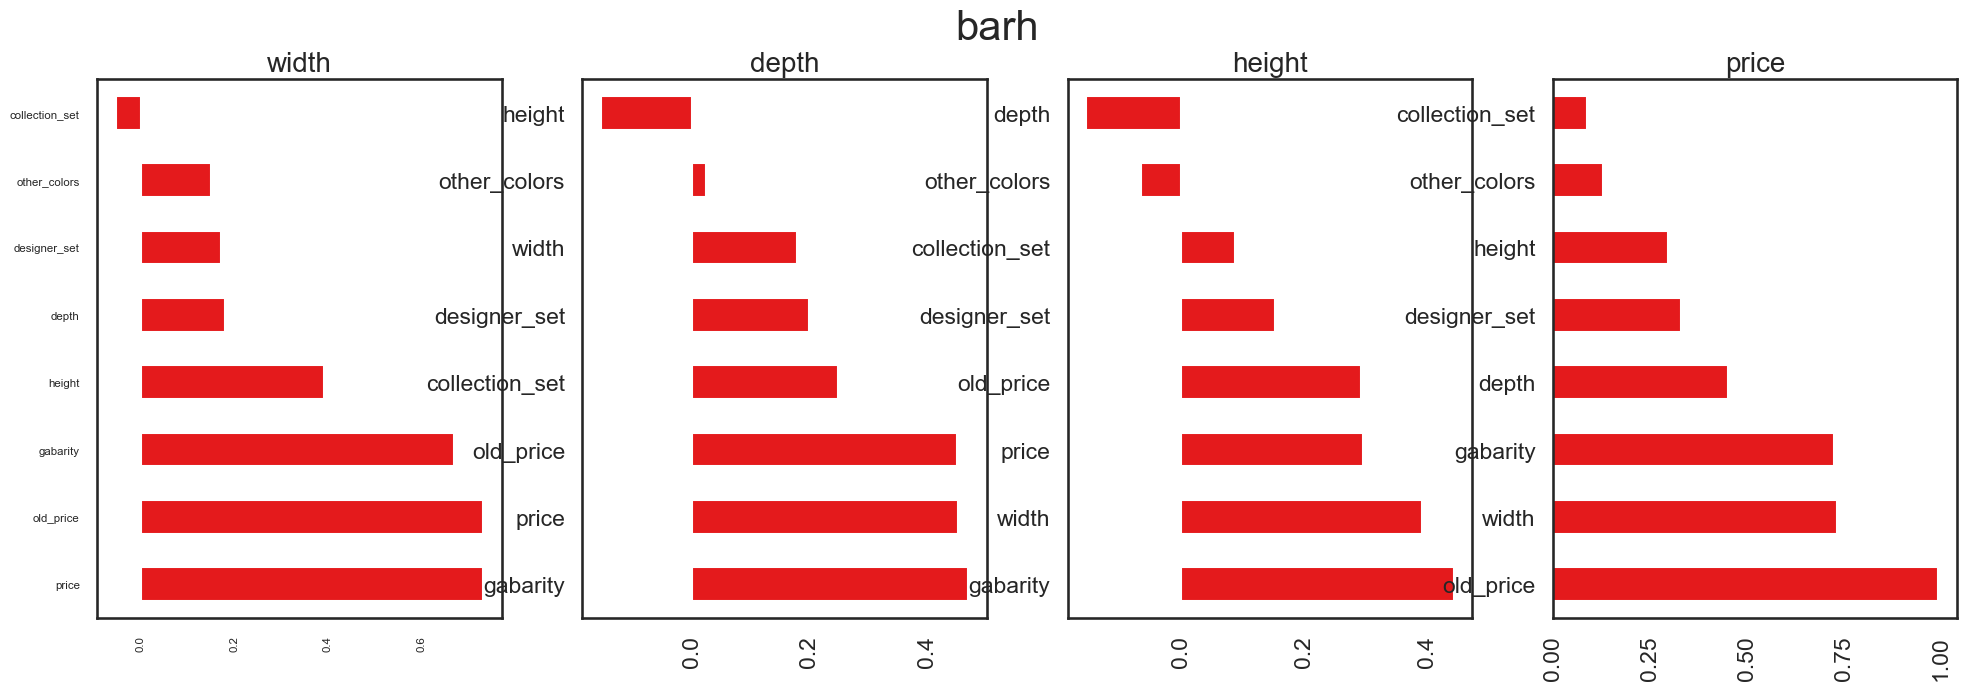

In [298]:
countanalyse('barh', ikea, [w[1:], d[1:], h[1:], p[1:]], 1,4, 'barh','')

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">products with a longer length cost more and have a greater height
products with greater depth have more products in the set
products with a higher height have a greater length and higher prices</p><p>товары с большей длинной стоят больше и имеют большую высоту
товары с большей глубиной имеют большее кол-во товаров в сете 
товары с большей высотой имеют большую длинну и выше цену</p>

WE can reduce features in our data before fitting
It enables the machine learning algorithm to train faster.
It reduces the complexity of a model and makes it easier to interpret.
It improves the accuracy of a model if the right subset is chosen.
It reduces Overfitting.

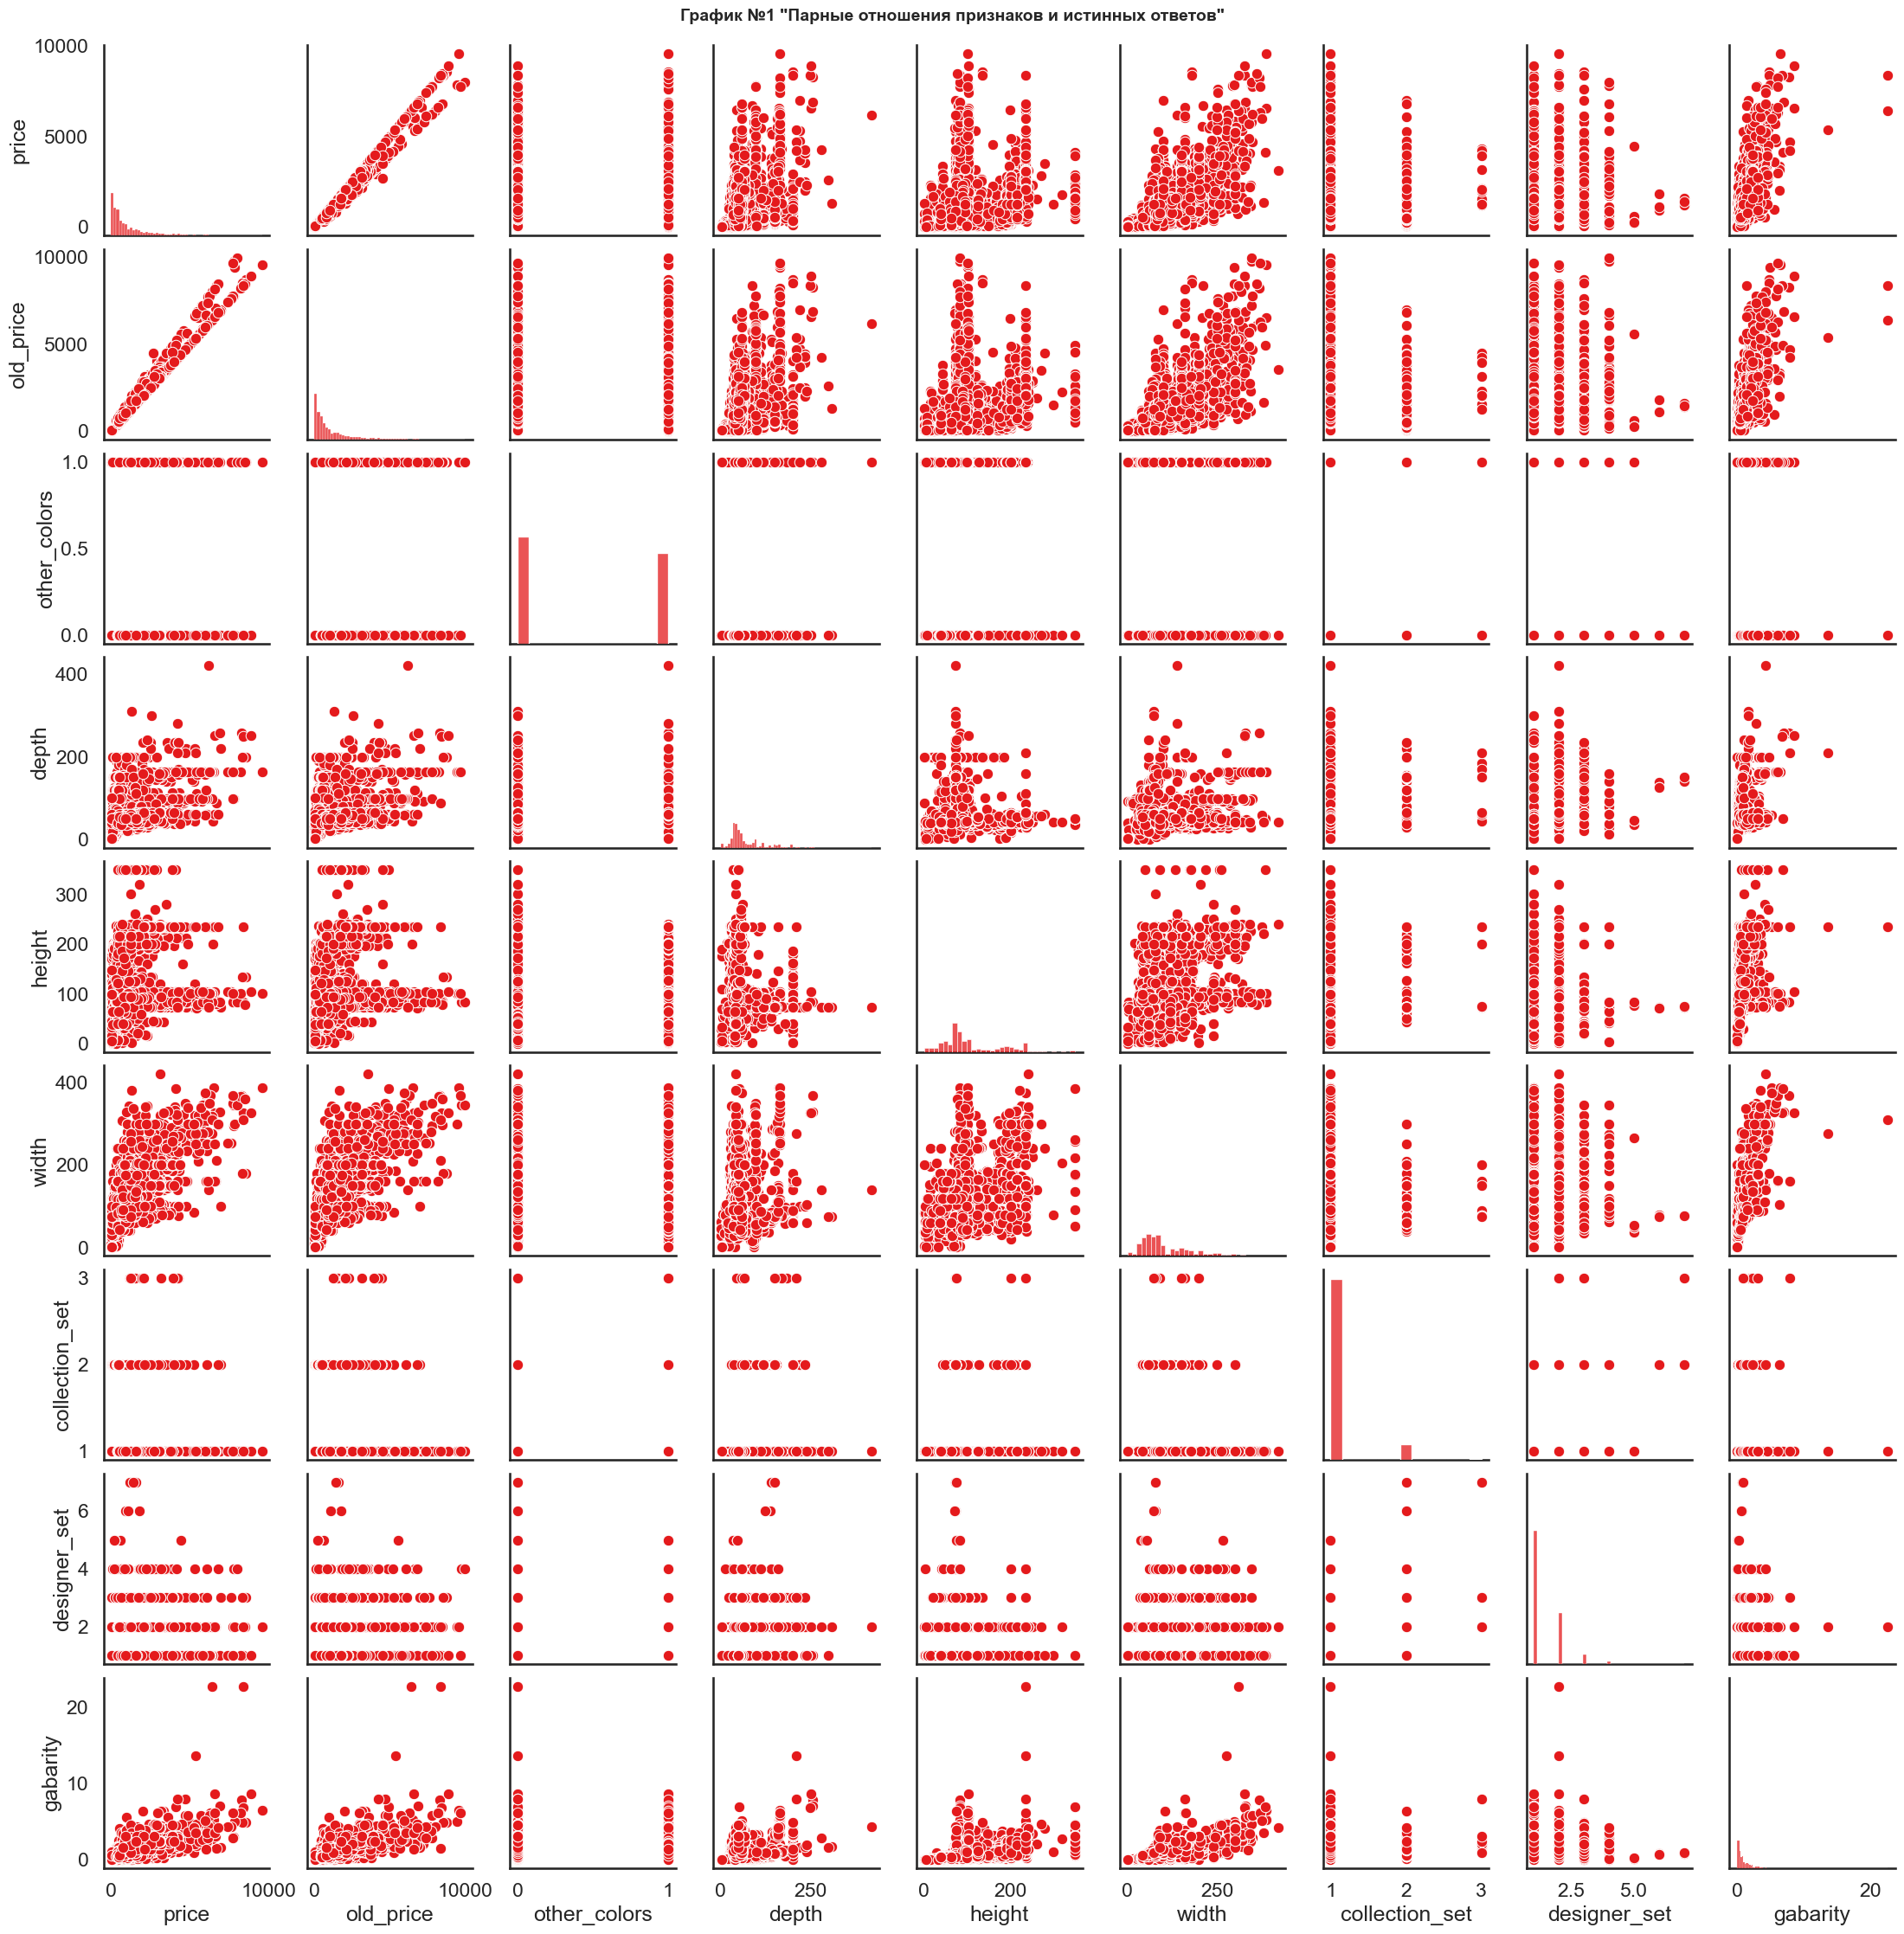

In [299]:
sns_plot = sns.pairplot(ikea.select_dtypes(include='number'))
sns_plot.fig.suptitle('График №1 "Парные отношения признаков и истинных ответов"', 
                      y = 1, fontsize=14, fontweight='bold')
plt.show()

In [300]:
def score(table):
    w=stats.zscore(table['width'].to_numpy(),ddof=0, nan_policy='omit')
    h=stats.zscore(table['height'].to_numpy(),ddof=0, nan_policy='omit')
    d=stats.zscore(table['depth'].to_numpy(),ddof=0, nan_policy='omit')
    g=stats.zscore(table['gabarity'].to_numpy(),ddof=0, nan_policy='omit')
    w = len(w[w>3])
    h=  len(h[h>3])
    d=  len(d[d>3])
    g=  len(g[g>3])
    return f'w - {w} h - {h} d - {d} g - {g}'


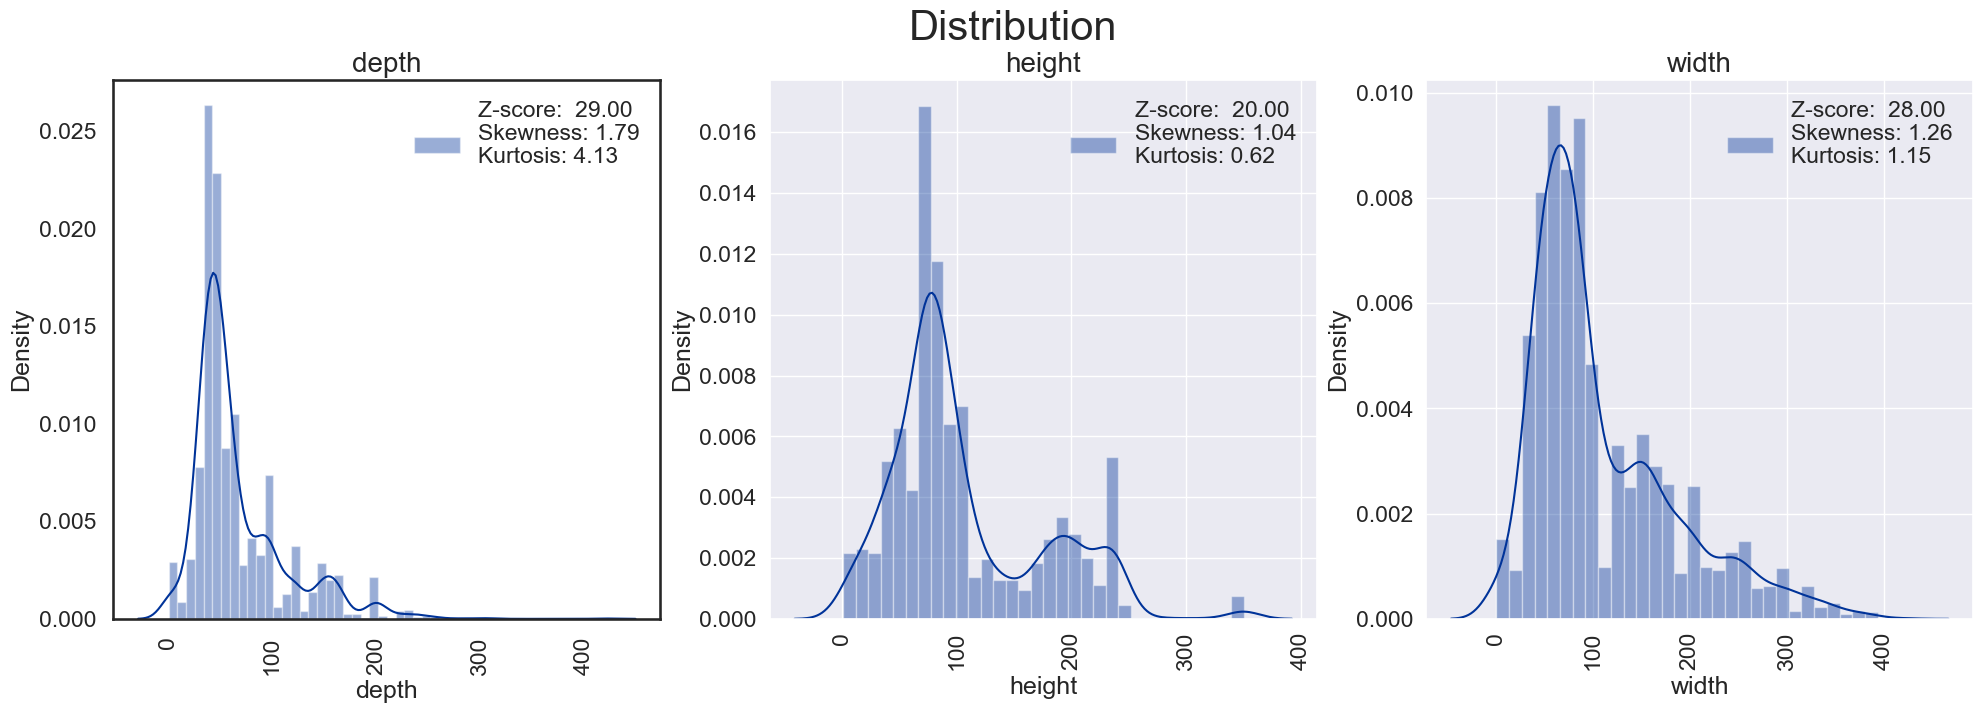

In [301]:
# Plot width, depth, hight distribution
countanalyse('displot', ikea, ['depth','height','width'], 1,3, 'Distribution','')

In [302]:
# Gabarites summary statistics 
ikea[['width','depth','height', 'gabarity']].describe()

width   depth  height  gabarity
count 2472.00 2210.00 2292.00   2127.00
mean   109.86   67.62  105.97      1.04
std     74.31   45.74   66.04      1.37
min      0.90    1.00    1.00      0.00
25%     60.00   40.00   68.00      0.23
50%     81.00   50.00   83.00      0.56
75%    150.00   84.00  140.00      1.42
max    420.00  420.00  350.00     22.68

<h2 style="color:#003399">Feature selection — Correlation and P-value</h2>

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">fill in the remaining NaNs using different strategies and derive features by comparing pvalues</p><p>заполним оставшиеся NaN с помощь разных стратегий и выведем фичерсы путем сравнения pvalue</p>

In [303]:
ikea.columns

Index(['collection', 'category', 'price', 'old_price', 'other_colors',
       'designer', 'depth', 'height', 'width', 'name', 'Ikea',
       'collection_set', 'designer_set', 'gabarity'],
      dtype='object')

In [304]:
ikea[['width','depth', 'height','gabarity']].isnull().sum()

width       383
depth       645
height      563
gabarity    728
dtype: int64

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">Encoding the Categorical Variable</p>

In [305]:
from sklearn.preprocessing import LabelEncoder
def feature_encode(df):
    ikea_corr = df.copy(deep=True)
    col_na = ikea_corr.select_dtypes(include=["object"]).columns.tolist()
    label_encoder = LabelEncoder()
    ikea_corr[col_na] = ikea_corr[col_na].apply(label_encoder.fit_transform).astype('float64')
    ikea_corr.drop(columns=["null"], inplace=True)
    ikea_corr = ikea_corr.astype('float64')
    return ikea_corr

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">Generating the correlation heat-map</p>

In [306]:
def corr_matrix(ikea_corr):
#     Generating the correlation matrix
    correlation = ikea_corr.corr()
    plt.figure(figsize=(10,7))
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',annot_kws={'fontsize': 14})
    plt.title('Correlation between Features')
    plt.show()
    return correlation

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">Comparing the correlation between features and remove one of two features that have a correlation higher than 0.9</p>

In [307]:
def corr_remove(correlation, ikea_corr):
    columns = np.full((correlation.shape[0],), True, dtype=bool)
    for i in range(correlation.shape[0]):
        for j in range(i+1, correlation.shape[0]):
            if correlation.iloc[i,j] >= 0.9:
                if columns[j]:
                    columns[j] = False

    selected_columns = ikea_corr.columns[columns].tolist()
    ikea_corr = ikea_corr[selected_columns]
    #Removing the column diagnosis because it is the column we are trying to predict
    selected_columns.remove('price')
    return selected_columns, ikea_corr

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">Selecting the columns based on how they affect the p-value.</p>

In [308]:
def backwardElimination(x, Y, sl, columns):
    import statsmodels.api as sm
    numVars = len(x[0])
#   We assume to null hypothesis to be “The selected combination of dependent variables do not have any effect on the independent variable”.
    for i in range(0, numVars):
        #Then we build a small regression model and calculate the p values.
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                #If the p values is higher than the threshold, we discard that combination of features.
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                
    regressor_OLS.summary()
    print(f'selected columns : {columns}')
    columns=np.append(columns, ['price'])
    return columns

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">Creating a Dataframe with the columns selected using the p-value and correlation</p>

<h2 style="color:#003399">IMPORT SKLEARN LIBRARIES </H2>

In [309]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoCV, RidgeCV, ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn import set_config
set_config(display="diagram")
from sklearn.svm import SVR
%%time
tqdm.pandas()   #tqdm is used to show any code running with a progress bar. 

In [311]:
def feature_selection(df):
    ikea_corr=feature_encode(df)
    correlation=corr_matrix(ikea_corr)
    selected_columns, ikea_corr=corr_remove(correlation, ikea_corr)
    selected_columns = backwardElimination(ikea_corr[selected_columns].values, ikea_corr['price'].values, 0.05, selected_columns)
    return selected_columns

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">Adding "null" column that count quantity of NaN in size rows</p>

In [312]:
from sklearn.base import TransformerMixin
class MyNullCount(TransformerMixin):
    def __init(self):
        super().__init__()
    def fit(self, X, y=None):
        self.X=X
        return self
    def transform(self, X):
        X['null']=X[['width','depth','height']].isnull().sum(axis=1)
        return X

In [313]:
null = MyNullCount()
null.fit(ikea)
ikea=null.transform(ikea)

In [314]:
ikea.columns

Index(['collection', 'category', 'price', 'old_price', 'other_colors',
       'designer', 'depth', 'height', 'width', 'name', 'Ikea',
       'collection_set', 'designer_set', 'gabarity', 'null'],
      dtype='object')

In [315]:
ikea[['width','depth','height','gabarity']].isnull().sum()

width       383
depth       645
height      563
gabarity    728
dtype: int64

In [316]:
ikea.shape

(2855, 15)

<h2 style="color:#003399">IKEA_droped droping all rows that has NaN in width, depth, height </h2>

In [317]:
from sklearn.base import TransformerMixin
class DropTransformer(TransformerMixin):

    def __init__(self):
        super().__init__()

    def fit(self, X, y=None):
        self.X = X
        return self

    def transform(self, X, y=None):
        droped_full = X[X['null']!=0]
        droped_full.drop(columns=['width', 'depth', 'height', 'gabarity'], inplace=True)
        X=X[X['null']==0]
        X['gabarity']=(X['width']/100)*(X['height']/100)*(X['depth']/100)
        return X, droped_full

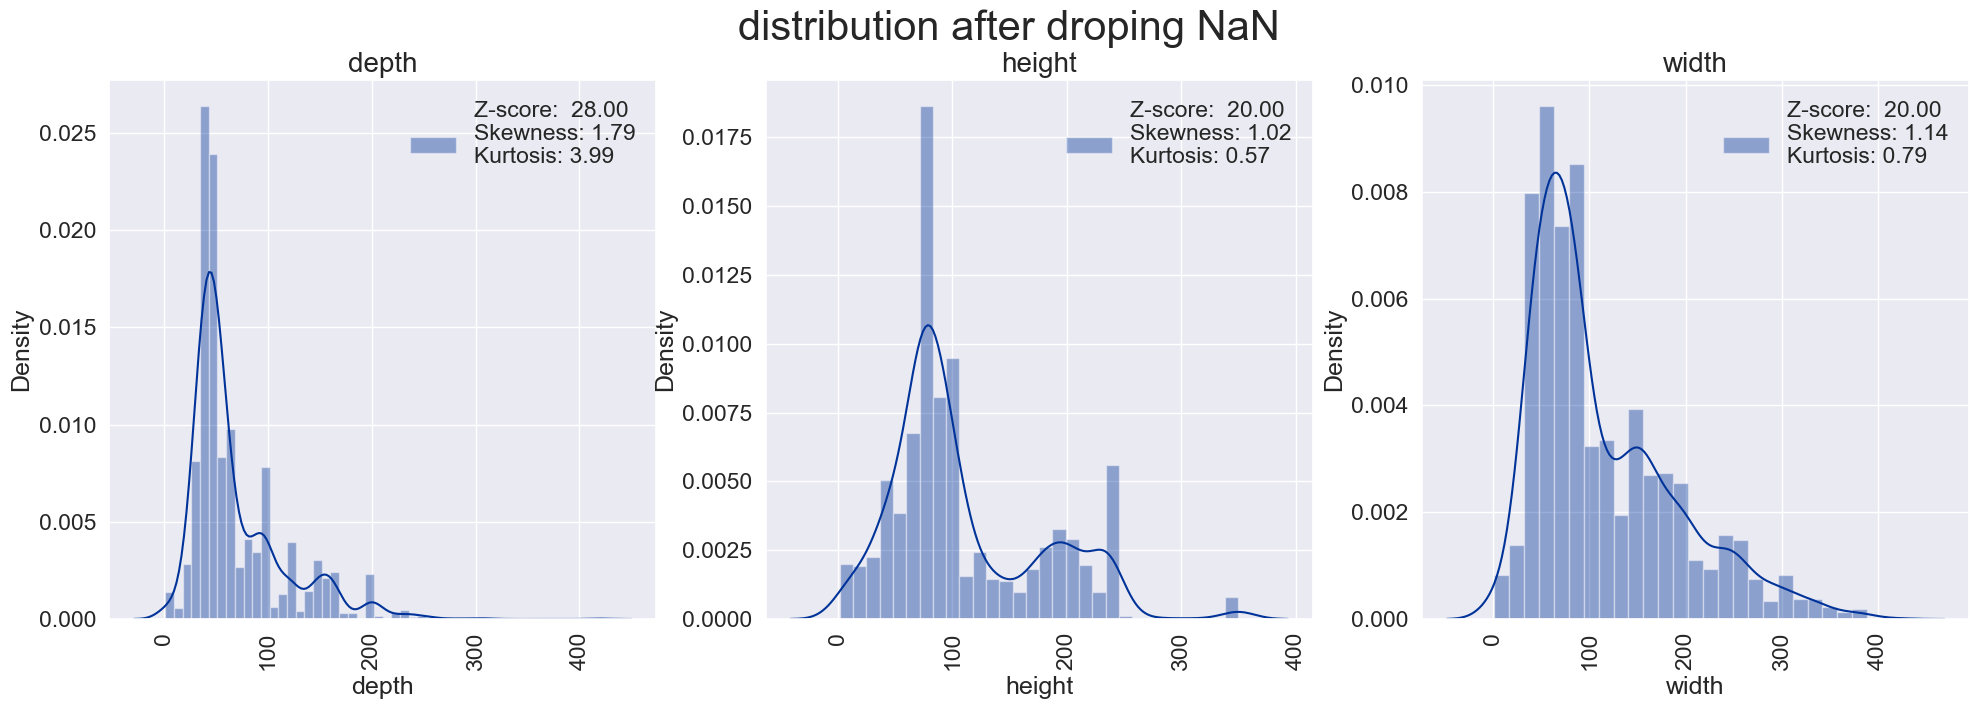

In [318]:
ikea_droped = ikea.copy(deep=True)
droper = DropTransformer()
droper.fit(ikea_droped)
ikea_droped, droped_full = droper.transform(ikea_droped)
countanalyse('displot',ikea_droped, ['depth','height', 'width'], 1,3, 'distribution after droping NaN', '')

In [319]:
ikea_droped[['width','depth','height','gabarity']].isnull().sum()

width       0
depth       0
height      0
gabarity    0
dtype: int64

In [320]:
labels_tab = pd.DataFrame(columns= ikea.columns.unique())
labels_tab.loc[0, 'table'] = 'ikea'
for var in ikea.columns.unique():
    labels_tab.loc[0, var] = len(ikea[var].unique())
labels_tab.loc[1, 'table'] = 'ikea_droped'
for var in ikea_droped.columns.unique():
    labels_tab.loc[1, var] = len(ikea_droped[var].unique())
labels_tab.loc[2, 'table'] = 'droped_full'
for var in droped_full.columns.unique():
    labels_tab.loc[2, var] = len(droped_full[var].unique())
labels_tab

collection category price old_price other_colors designer depth height  \
0        565       17   952       828            2      179   158    203   
1        427       17   832       738            2      151   149    196   
2        281       16   309       273            2       97   NaN    NaN   

  width name Ikea collection_set designer_set gabarity null        table  
0   272  690    3              3            7     1224    4         ikea  
1   254  466    3              3            7     1220    1  ikea_droped  
2   NaN  304    3              2            5      NaN    3  droped_full

Unfortunatly we see that we lost 138 labels of collections, 28 labels of designers and 224 unique names of items that is not good as we wouldn't be ably to predict price for these items using these features, so we will separatly predict deleted rows without size features.

In [321]:
print(ikea_droped.shape)
print(droped_full.shape)

(2051, 15)
(804, 11)


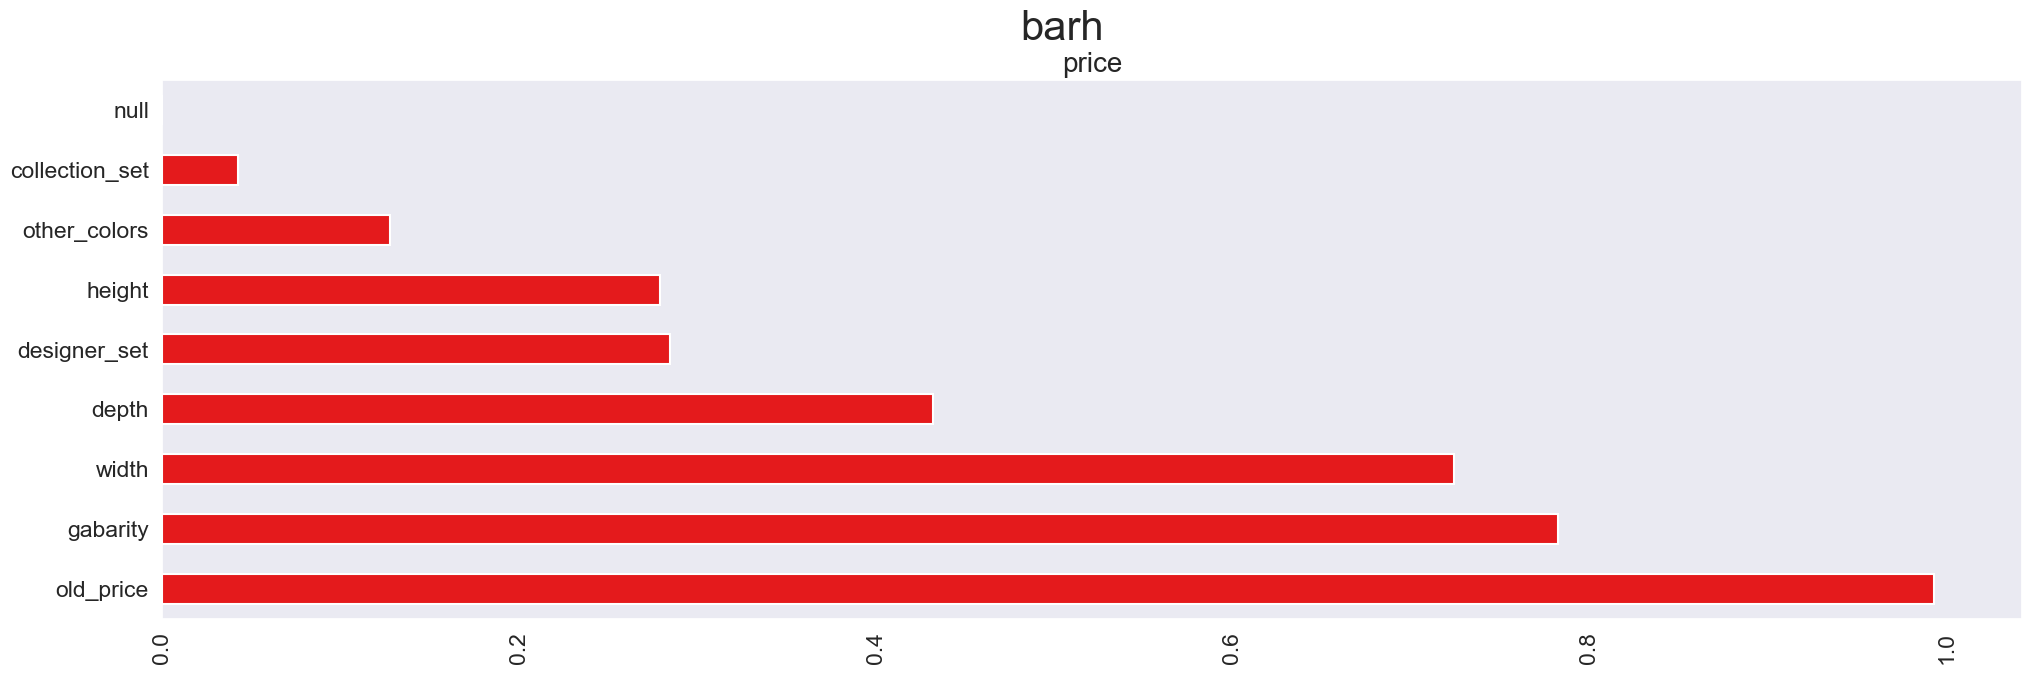

In [322]:
correlation = ikea_droped.corr()
p=correlation['price'].sort_values(ascending = False)
countanalyse('barh', ikea_droped, [ p[1:]], 1,1, 'barh','')

ikea after drope items feature selection

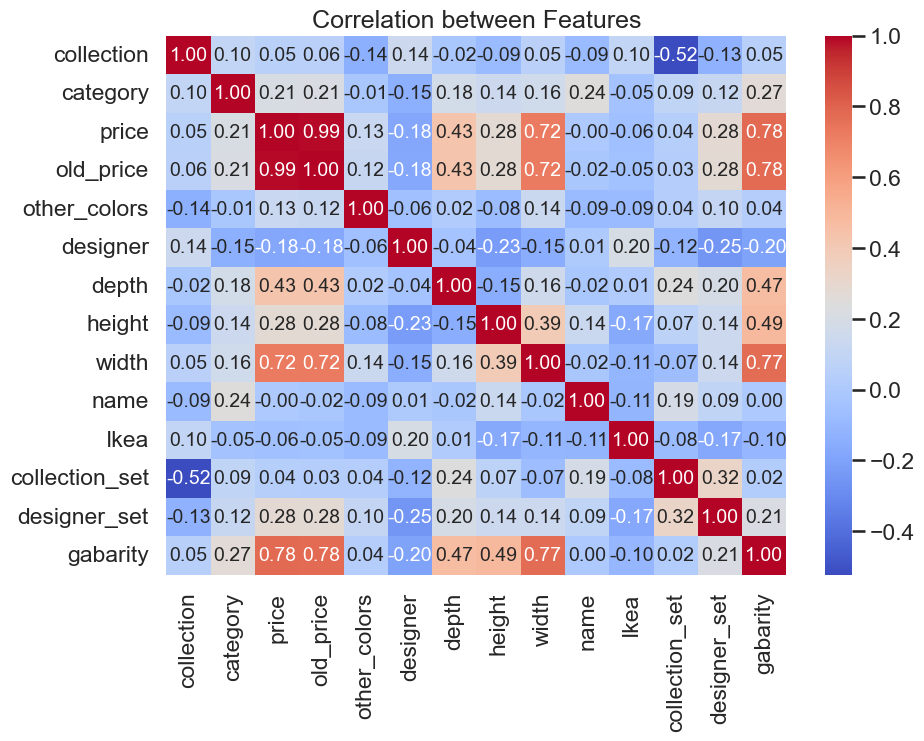

selected columns : ['other_colors' 'designer' 'depth' 'height' 'width' 'collection_set'
 'designer_set' 'gabarity']


In [323]:
selected_columns = feature_selection(ikea_droped)
ikea_droped_selected = ikea_droped[selected_columns]

Droped items feature selection 

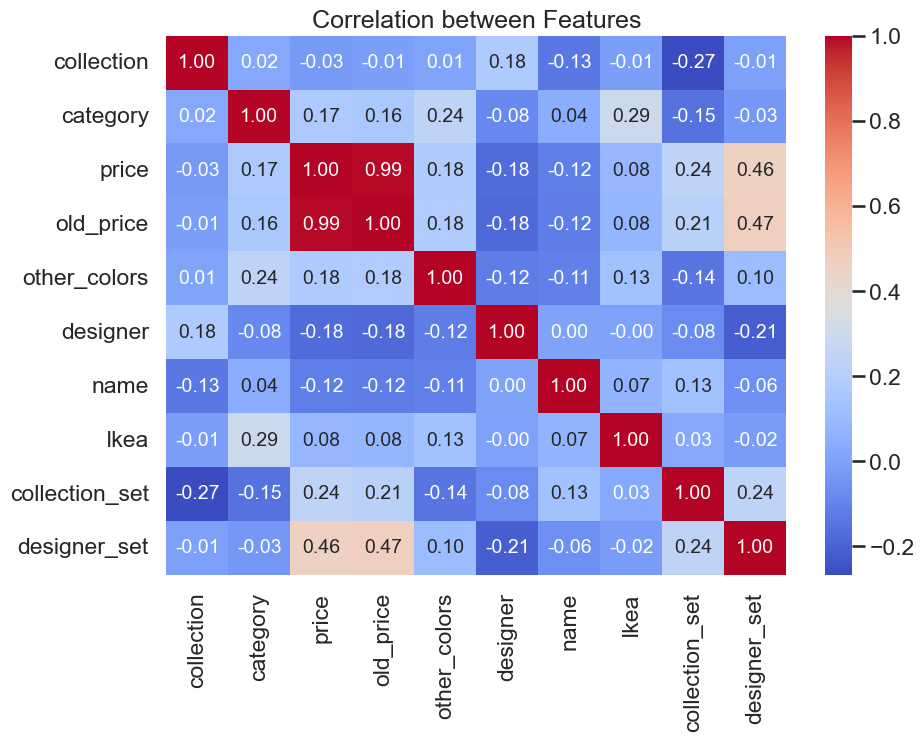

selected columns : ['category' 'designer' 'name' 'designer_set']


In [324]:
selected_columns = feature_selection(droped_full)
droped_full_selected = droped_full[selected_columns]

<h2 style="color:#003399">IKEA_JV inputing $median$ by $name$ then least by $collection$ then least by $category$ </h2>

In [325]:
ikea[ikea["gabarity"].isnull()==True].head(5)

collection        category  price  old_price  other_colors  \
17   KULLABERG   Bar furniture 140.00     175.00             1   
34  HENRIKSDAL   Bar furniture  40.00      40.00             0   
43    STENSELE  Café furniture 550.00     550.00             0   
47      MINNEN            Beds 395.00     445.00             0   
52       SLÄKT            Beds 540.00     540.00             0   

                           designer  depth  height  width  \
17                      Sarah Fager  36.00     NaN  36.00   
34                   IKEA of Sweden    NaN     NaN    NaN   
43                  Maja Ganszyniec    NaN  105.00    NaN   
47  IKEA of Sweden/Tina Christensen    NaN     NaN  85.00   
52   Ebba Strandmark/IKEA of Sweden    NaN     NaN  91.00   

                                   name             Ikea  collection_set  \
17                                Stool  other designers               1   
34    Cover for bar stool with backrest        IKEA only               1   
43                            Bar table  other designers               1   
47  Ext bed frame with slatted bed base      IKEA inside               1   
52  Ext bed frame with slatted bed base      IKEA inside               1   

    designer_set  gabarity  null  
17             1       NaN     1  
34             1       NaN     3  
43             1       NaN     2  
47             2       NaN     2  
52             2       NaN     2

as for the ikea sity we can see that most of lost size is not on the main information and some items it's additional items to the furniture it usualy has no some pf size at all. So we can fined median price by name but it is not actual by category an collection.

In [326]:
class MyImputer(TransformerMixin):
    def __init(self):
        super().__init__()
    def fit(self, X, y=None):
        self.X=X
        return self
    def transform(self, X, y=None):
        for i in X['name'].unique():
            try:
                X.loc[X['name'] == i, ['width','height','depth']] = X.loc[X['name'] == i, ['width','height','depth']].fillna(X.loc[X['name'] == i, ['width','height','depth']].median())
            except:
                pass
        X['gabarity']=X['gabarity'].fillna((X['width']/100) * (X['depth']/100) * (X['height'] )/100)
        X.dropna(inplace=True)
        return X

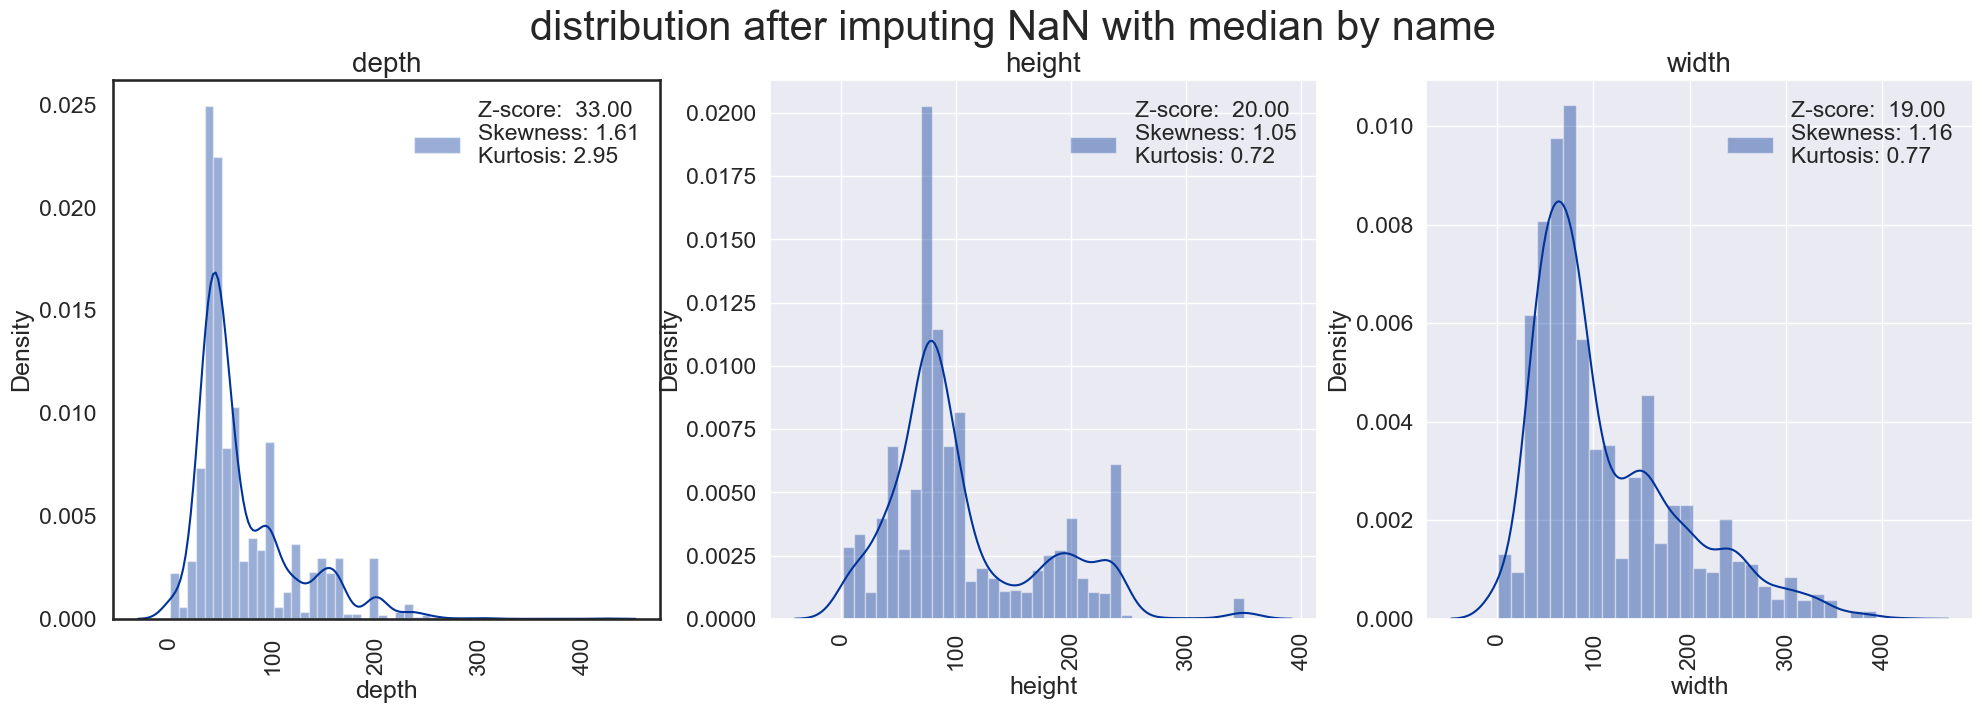

In [327]:
ikea_JV= ikea.copy(deep=True)
my_imputer = MyImputer()
my_imputer.fit(ikea_JV)
ikea_JV=my_imputer.transform(ikea_JV)
countanalyse('displot',ikea_JV, ['depth','height', 'width'], 1,3, 'distribution after imputing NaN with median by name', '')

In [328]:
ikea_JV[['width','depth','height','gabarity']].isnull().sum()

width       0
depth       0
height      0
gabarity    0
dtype: int64

In [329]:
ikea_JV.shape

(2343, 15)

In [330]:
labels_tab.loc[3, 'table'] = 'ikea_JV'
for var in ikea_JV.columns.unique():
    labels_tab.loc[3, var] = len(ikea_JV[var].unique())
labels_tab

collection category price old_price other_colors designer depth height  \
0        565       17   952       828            2      179   158    203   
1        427       17   832       738            2      151   149    196   
2        281       16   309       273            2       97   NaN    NaN   
3        499       17   881       774            2      165   155    199   

  width name Ikea collection_set designer_set gabarity null        table  
0   272  690    3              3            7     1224    4         ikea  
1   254  466    3              3            7     1220    1  ikea_droped  
2   NaN  304    3              2            5      NaN    3  droped_full  
3   265  467    3              3            7     1333    4      ikea_JV

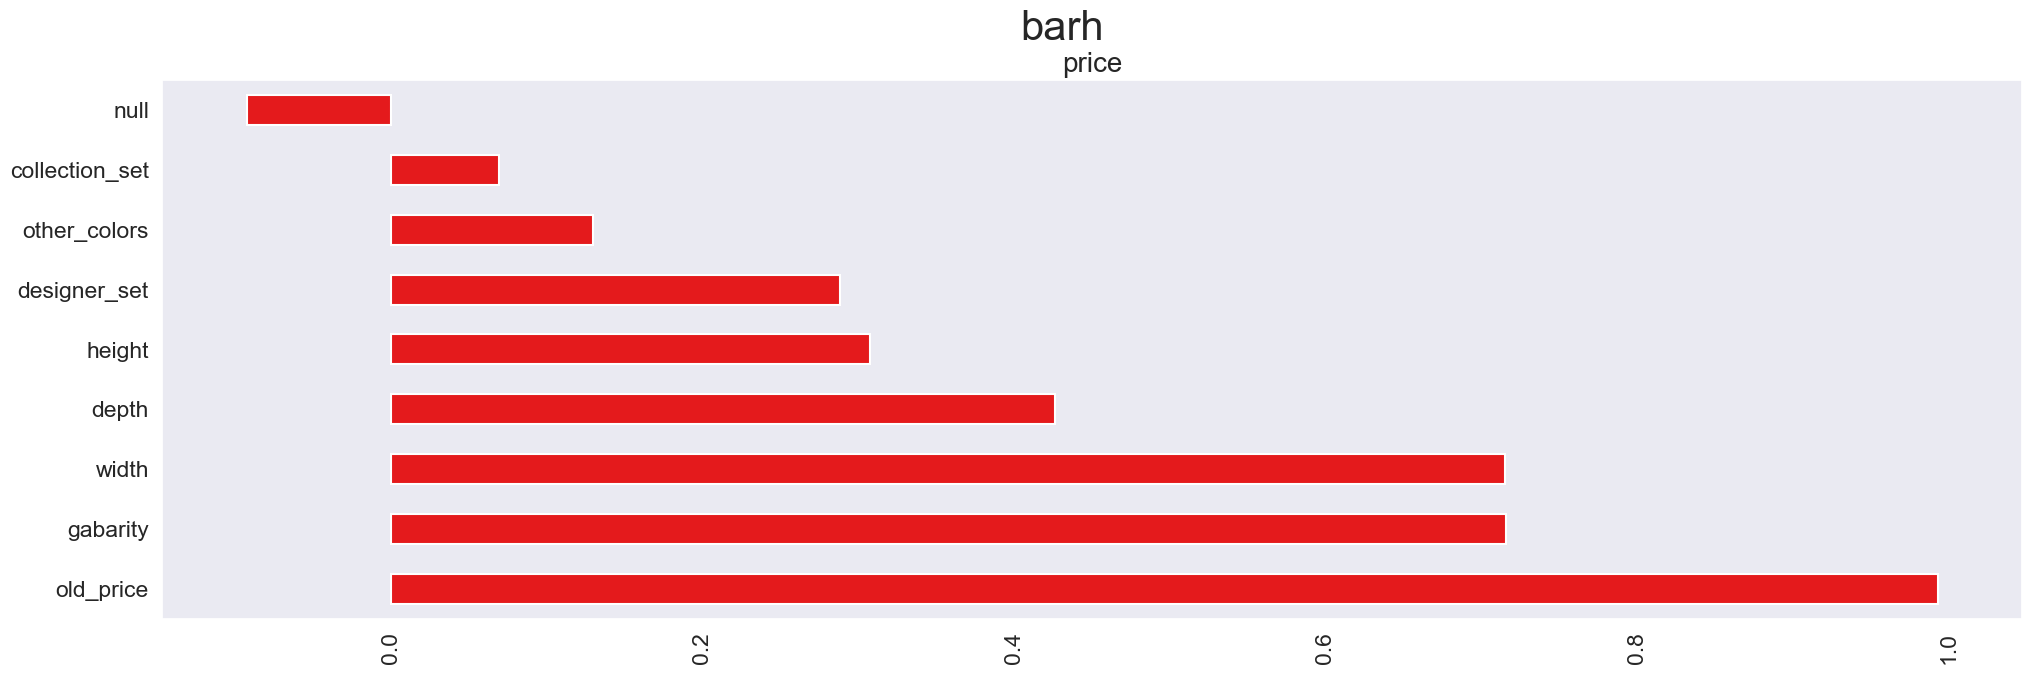

In [331]:
correlation = ikea_JV.corr()
p=correlation['price'].sort_values(ascending = False)
countanalyse('barh', ikea_JV, [ p[1:]], 1,1, 'barh','')

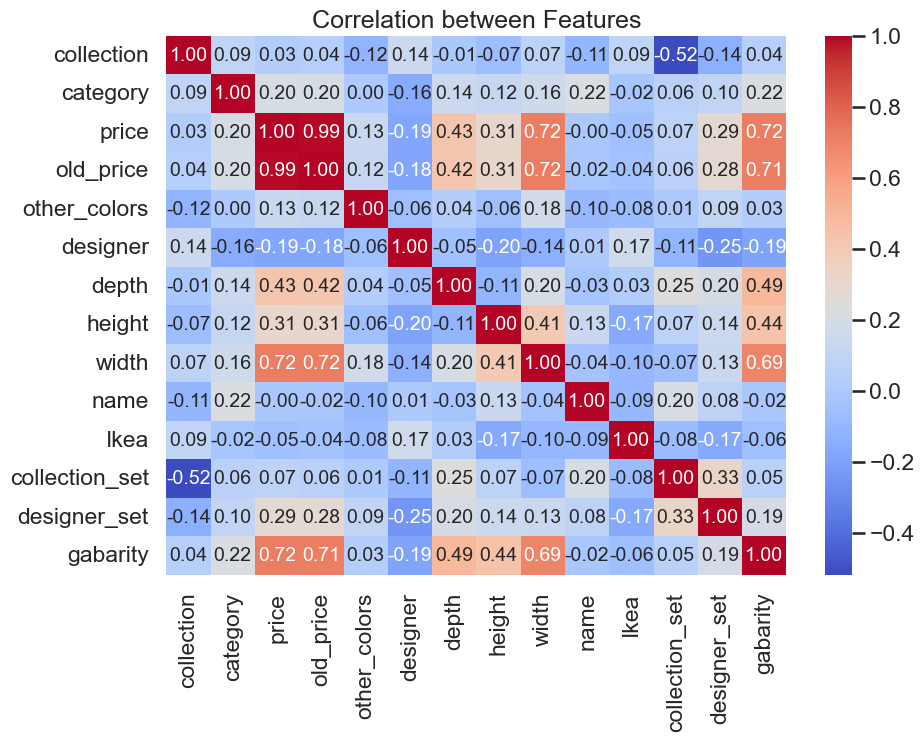

selected columns : ['collection' 'designer' 'depth' 'height' 'width' 'collection_set'
 'designer_set' 'gabarity']


In [332]:
selected_columns = feature_selection(ikea_JV)
ikea_JV_selected = ikea_JV[selected_columns]

<h2 style="color:#003399">IKEA_SI Replace missing values using a descriptive statistic MEDIAN with SIMPLEIMPUTER  </h2>

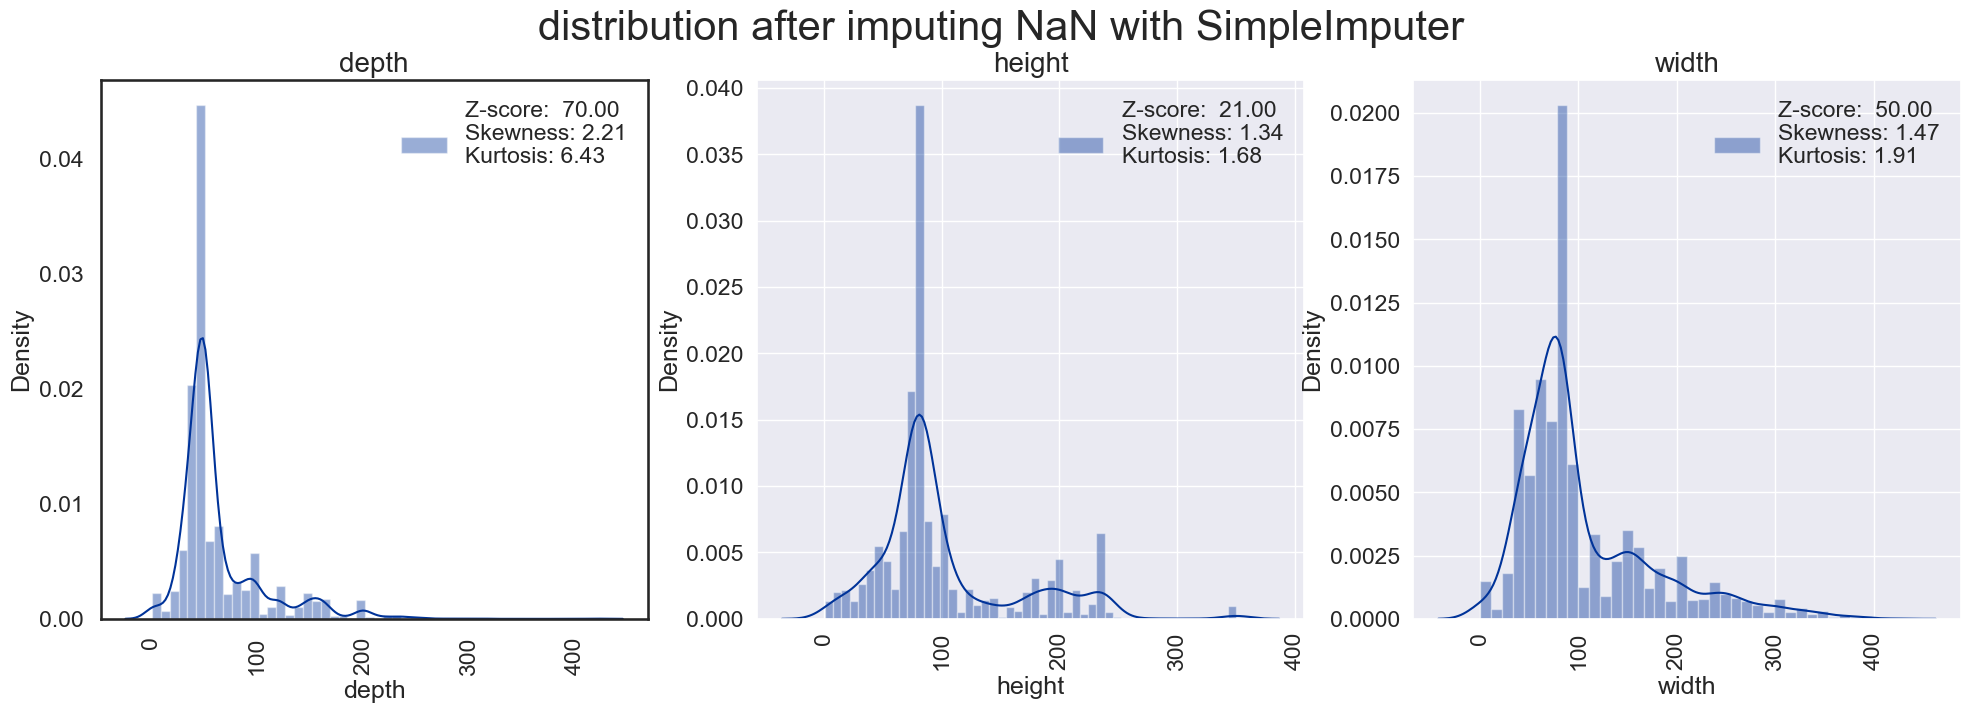

In [333]:
from sklearn.impute import SimpleImputer
ikea_SI = ikea.copy()
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
ikea_SI['width'] = imputer.fit_transform(ikea_SI[['width']])
ikea_SI['depth'] = imputer.fit_transform(ikea_SI[['depth']])
ikea_SI['height'] = imputer.fit_transform(ikea_SI[['height']])
ikea_SI['gabarity'] = ikea_SI['gabarity'].fillna((ikea_SI.width/100)*(ikea_SI.depth/100)*(ikea_SI.height/100))
countanalyse('displot',ikea_SI, ['depth','height', 'width'], 1,3, 'distribution after imputing NaN with SimpleImputer', '')


In [334]:
ikea_SI[['width','depth', 'height','gabarity']].isnull().sum()

width       0
depth       0
height      0
gabarity    0
dtype: int64

In [335]:
ikea_SI.shape

(2855, 15)

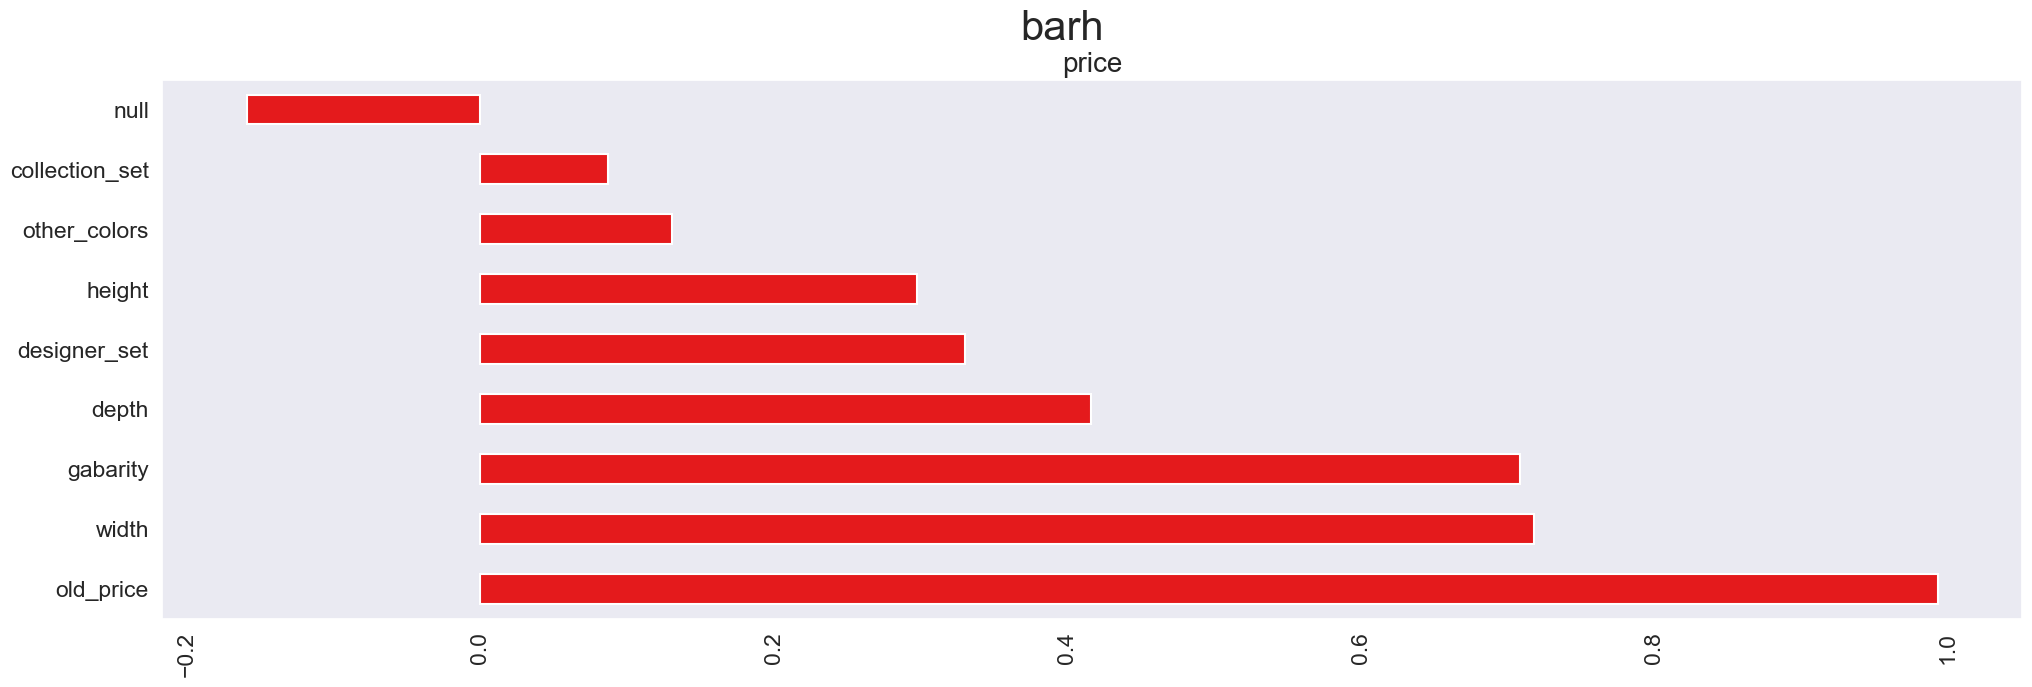

In [336]:
correlation = ikea_SI.corr()
p=correlation['price'].sort_values(ascending = False)
countanalyse('barh', ikea_SI, [ p[1:]], 1,1, 'barh','')

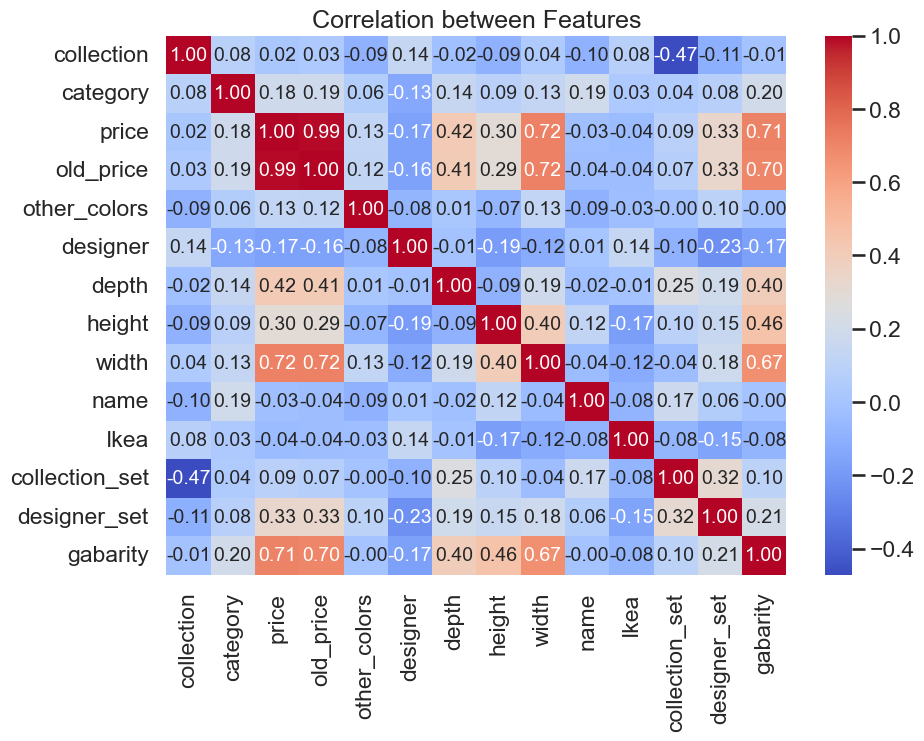

selected columns : ['collection' 'other_colors' 'designer' 'depth' 'height' 'width'
 'collection_set' 'designer_set' 'gabarity']


In [337]:
selected_columns = feature_selection(ikea_SI)
ikea_SI_selected = ikea_SI[selected_columns]

<h2 style="color:#003399">IKEA_KNN $k-Nearest\; Neighbors$ imputes missing values using the weighted or unweighted mean of the desired number of nearest neighbors. </h2>

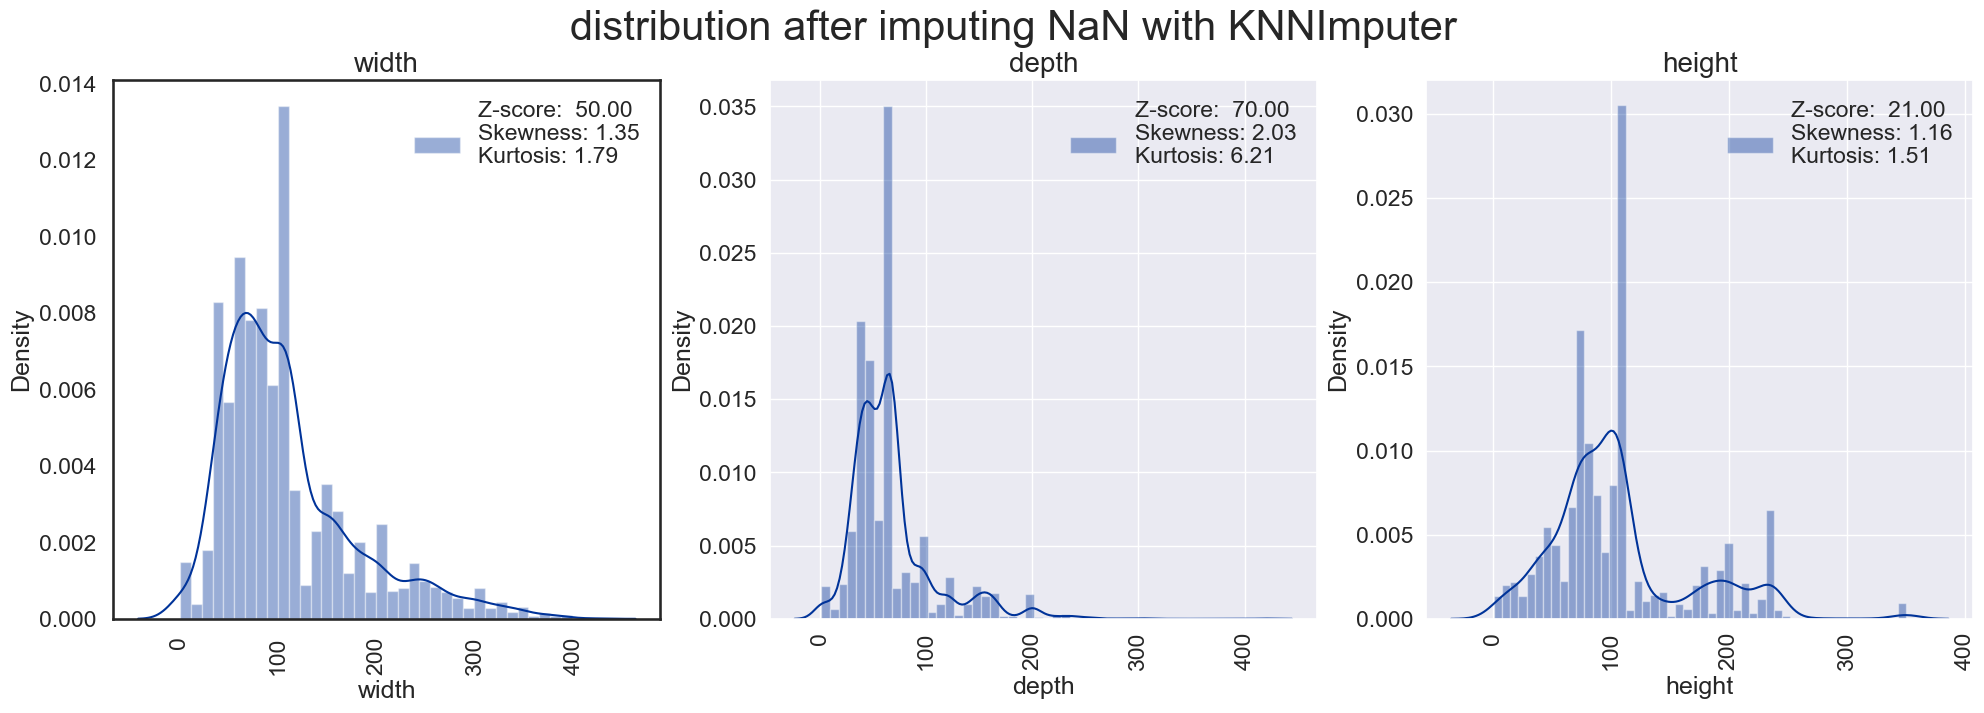

In [338]:
ikea_KNN = ikea.copy()
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=28)

ikea_KNN['width'] = imputer.fit_transform(ikea_KNN[['width']])
ikea_KNN['depth'] = imputer.fit_transform(ikea_KNN[['depth']])
ikea_KNN['height'] = imputer.fit_transform(ikea_KNN[['height']])
ikea_KNN['gabarity'] = ikea_KNN['gabarity'].fillna((ikea_KNN.width/100)*(ikea_KNN.depth/100)*(ikea_KNN.height/100))
countanalyse('displot', ikea_KNN, ['width','depth','height'], 1,3, 'distribution after imputing NaN with KNNImputer','')

In [339]:
ikea_KNN[['width','depth', 'height','gabarity']].isnull().sum()

width       0
depth       0
height      0
gabarity    0
dtype: int64

In [340]:
ikea_KNN.shape

(2855, 15)

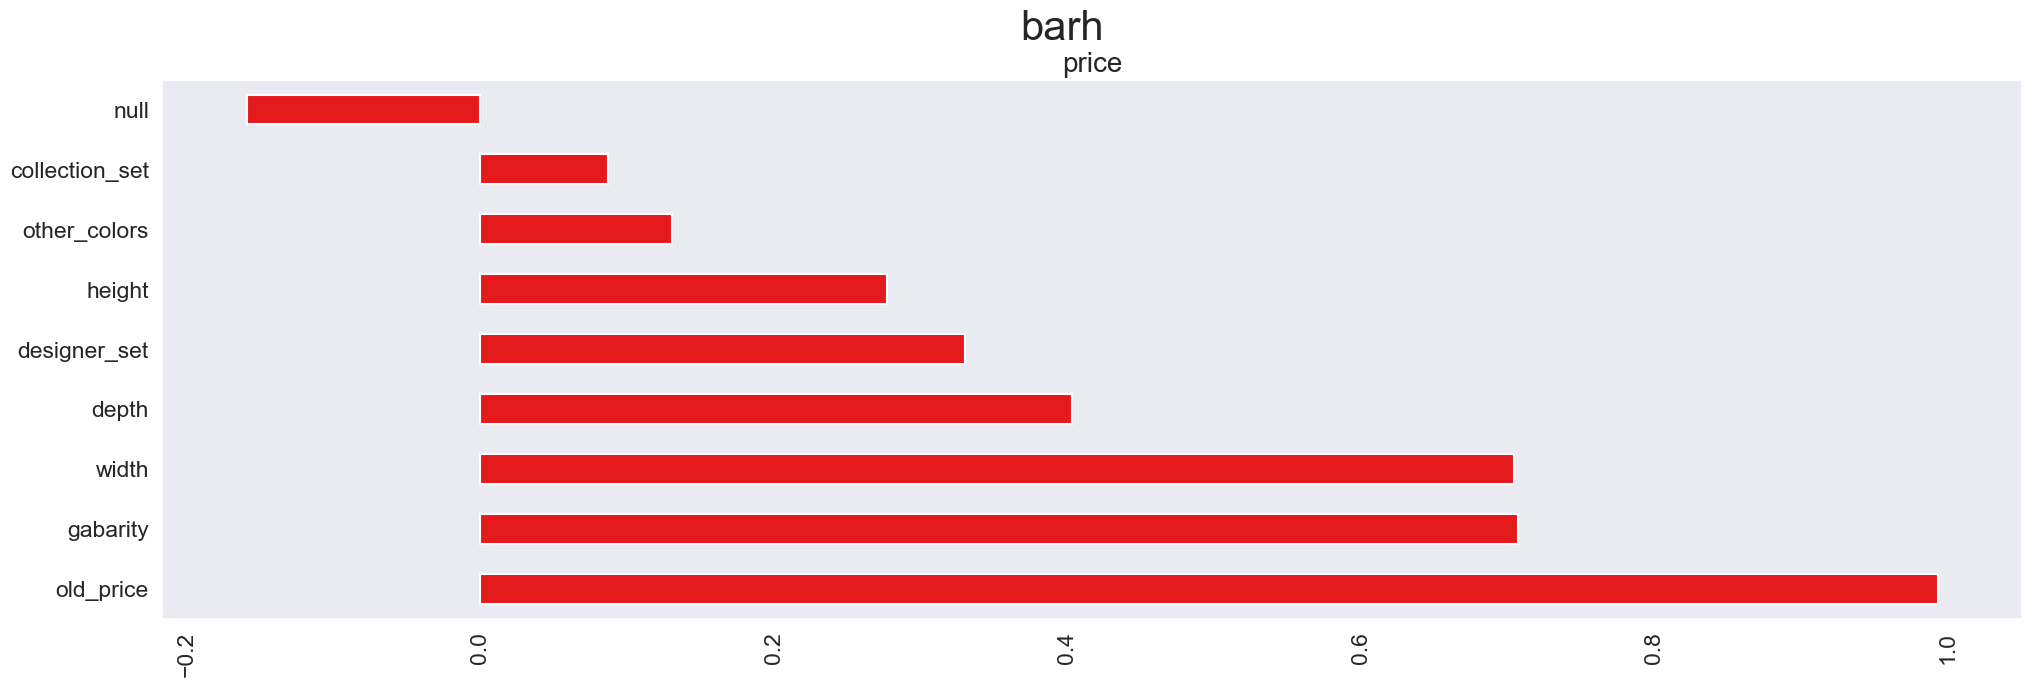

In [341]:
correlation = ikea_KNN.corr()
p=correlation['price'].sort_values(ascending = False)
countanalyse('barh', ikea_KNN, [ p[1:]], 1,1, 'barh','')

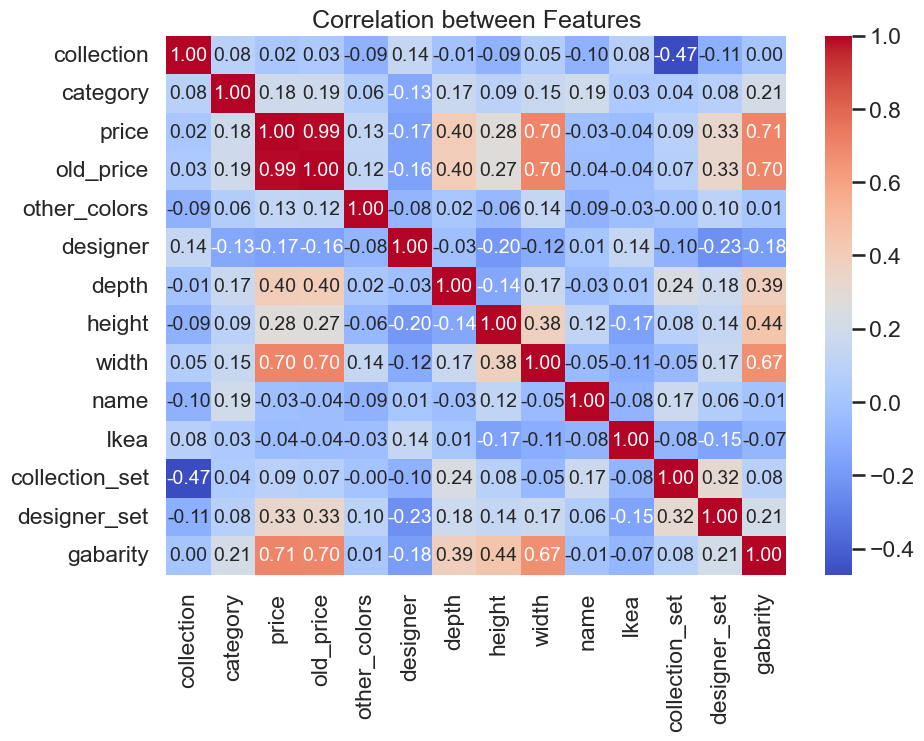

selected columns : ['collection' 'other_colors' 'designer' 'depth' 'height' 'width'
 'collection_set' 'designer_set' 'gabarity']


In [342]:
selected_columns = feature_selection(ikea_KNN)
ikea_KNN_selected = ikea_KNN[selected_columns]

<h2 style="color:#003399">IKEA_II $IterativeImputer$ with a strategy for imputing missing values by modeling each feature with missing values as a function of other features in a $round-robin$ fashion. </h2>

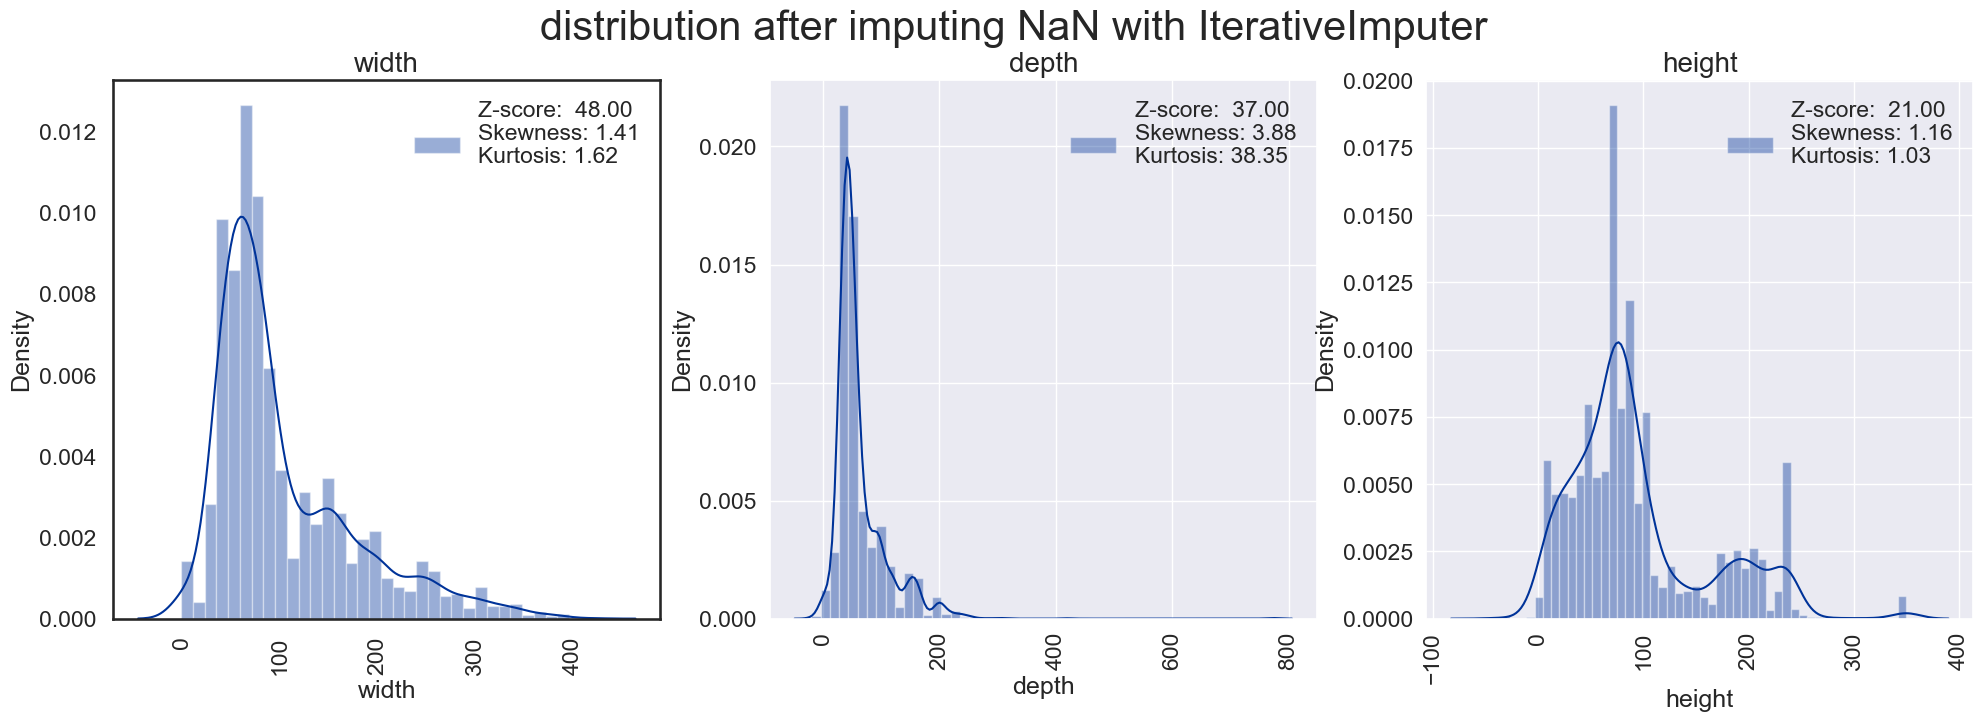

In [343]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
num_na = ikea.select_dtypes(exclude=["object"]).columns.tolist()
ikea_II = ikea.copy(deep=True)
imputer = IterativeImputer()
ikea_II[num_na]=imputer.fit_transform(ikea_II[num_na])
# ikea_II['gabarity'] = ikea_II['gabarity'].fillna((ikea_II.width/100)*(ikea_II.depth/100)*(ikea_II.height/100))
countanalyse('displot', ikea_II, ['width','depth','height'], 1,3, 'distribution after imputing NaN with IterativeImputer','')

In [344]:
ikea_II[['width','depth', 'height','gabarity']].isnull().sum()

width       0
depth       0
height      0
gabarity    0
dtype: int64

In [345]:
ikea_II.shape

(2855, 15)

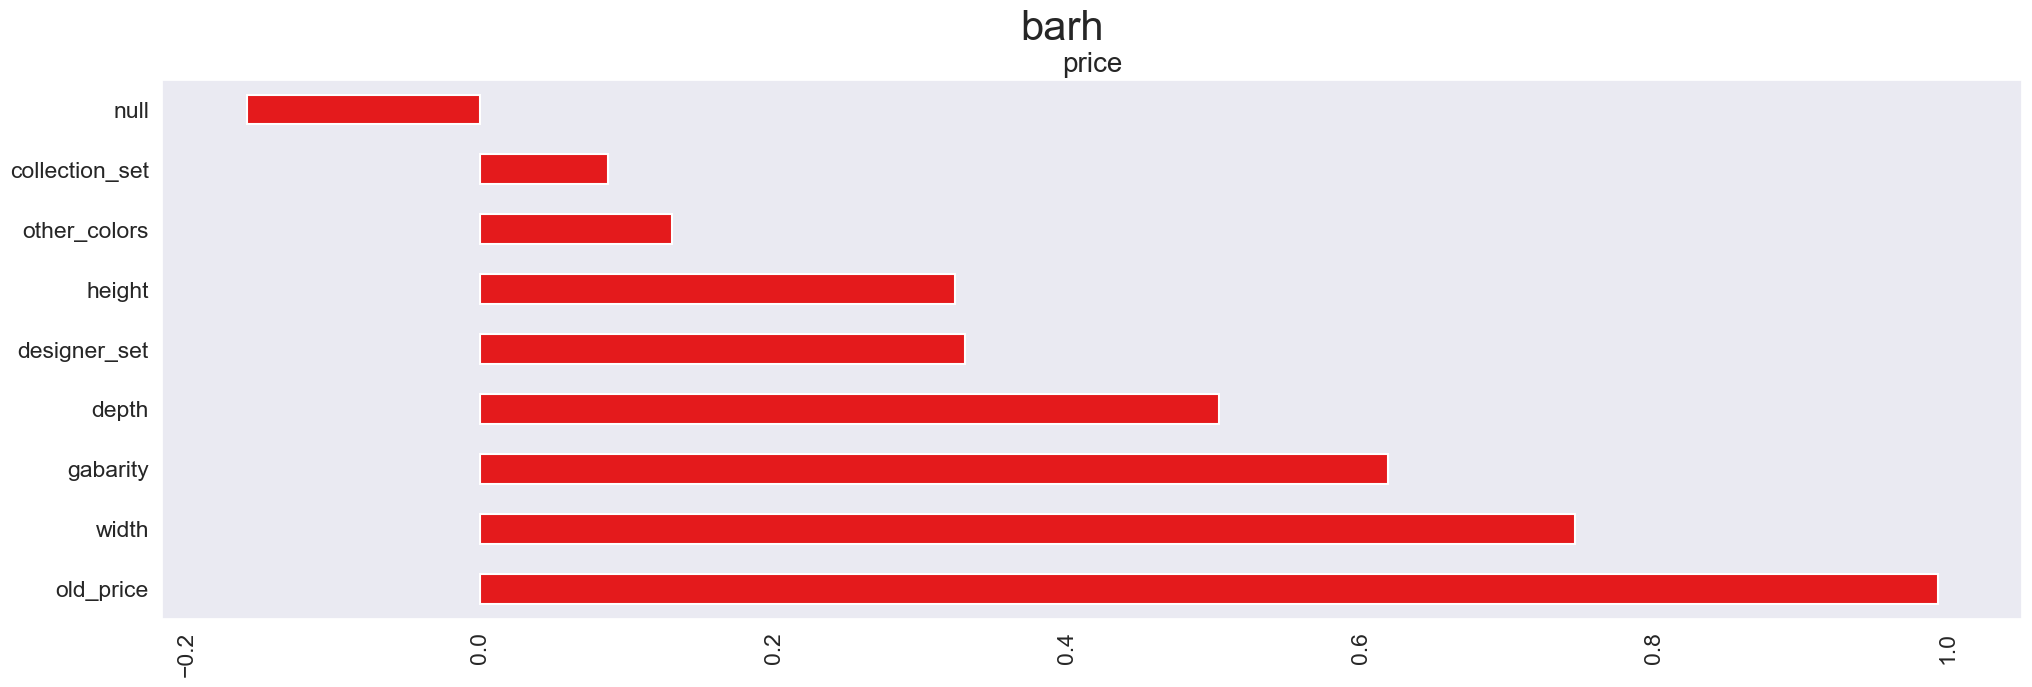

In [346]:
correlation = ikea_II.corr()
p=correlation['price'].sort_values(ascending = False)
countanalyse('barh', ikea_II, [ p[1:]], 1,1, 'barh','')

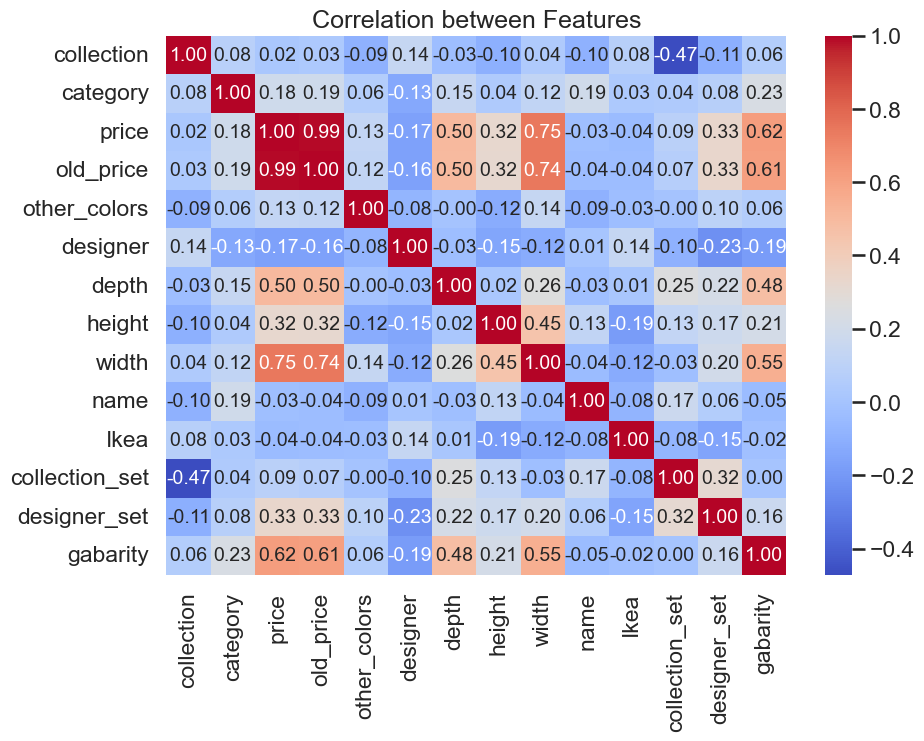

selected columns : ['collection' 'designer' 'depth' 'width' 'collection_set' 'designer_set'
 'gabarity']


In [347]:
selected_columns = feature_selection(ikea_II)
ikea_II_selected = ikea_II[selected_columns]

для данных, после заполнения пропусков разными методами,рассчитаем асимметрию и эксцесс для наших данных, мы можем использовать функции skew() и kurt(). 
а также просчитаем z-score и проверим как изменятся значения стандартных отклонений 'width','depth','height','gabarity'.

In [348]:
tt = {'skew_width': [ikea_droped.width.skew(), ikea_SI.width.skew(), ikea_KNN.width.skew(), ikea_II.width.skew(), ikea_JV.width.skew()], 
      'kurt width': [ikea_droped.width.kurt(), ikea_SI.width.kurt(), ikea_KNN.width.kurt(), ikea_II.width.kurt(), ikea_JV.width.kurt()],
      'skew_depth': [ikea_droped.depth.skew(), ikea_SI.depth.skew(), ikea_KNN.depth.skew(), ikea_II.depth.skew(), ikea_JV.depth.skew()],
      'kurt_depth': [ikea_droped.depth.kurt(), ikea_SI.depth.kurt(), ikea_KNN.depth.kurt(), ikea_II.depth.kurt(), ikea_JV.depth.kurt()],
      'skew_height': [ikea_droped.height.skew(), ikea_SI.height.skew(), ikea_KNN.height.skew(), ikea_II.height.skew(), ikea_JV.height.skew()],
      'kurt_height': [ikea_droped.height.kurt(), ikea_SI.height.kurt(), ikea_KNN.height.kurt(), ikea_II.height.kurt(), ikea_JV.height.kurt()],
      'z-score': [score(ikea_droped), score(ikea_SI), score(ikea_KNN), score(ikea_II), score(ikea_JV) ]}

df = pd.DataFrame(tt, index=['ikea_droped', 'ikea_SI', 'ikea_KNN', 'ikea_II', 'ikea_JV'])
df

skew_width  kurt width  skew_depth  kurt_depth  skew_height  \
ikea_droped        1.14        0.79        1.79        3.99         1.02   
ikea_SI            1.47        1.91        2.21        6.43         1.34   
ikea_KNN           1.35        1.79        2.03        6.21         1.16   
ikea_II            1.41        1.62        3.88       38.35         1.16   
ikea_JV            1.16        0.77        1.61        2.95         1.05   

             kurt_height                      z-score  
ikea_droped         0.57  w - 20 h - 20 d - 28 g - 37  
ikea_SI             1.68  w - 50 h - 21 d - 70 g - 42  
ikea_KNN            1.51  w - 50 h - 21 d - 70 g - 42  
ikea_II             1.03  w - 48 h - 21 d - 37 g - 36  
ikea_JV             0.72  w - 19 h - 20 d - 33 g - 37

<h2 style="color:#003399">Skewness</h2>
<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">measures the asymmetry of a distribution</p>

<h2 style="color:#003399">Kurtosis</h2>
<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">measures the heaviness of a distribution's tails relative to a normal distribution.</p>

<div style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">
    <p>All our data are positivly skewed so we have mean > median > mode and more then $1$</p>

<p>And we have width & height platykurtic distribution as kurt less then 3 it shows negative excess kurtosis it shows destrebution with flat tails, that indicate the small outliers in distribution
and $depth$ leptokurtic as kurt more then $3$. it's a positive excess kurtosis it shows havy tails on either side, indicating large outliers</p>
    </div

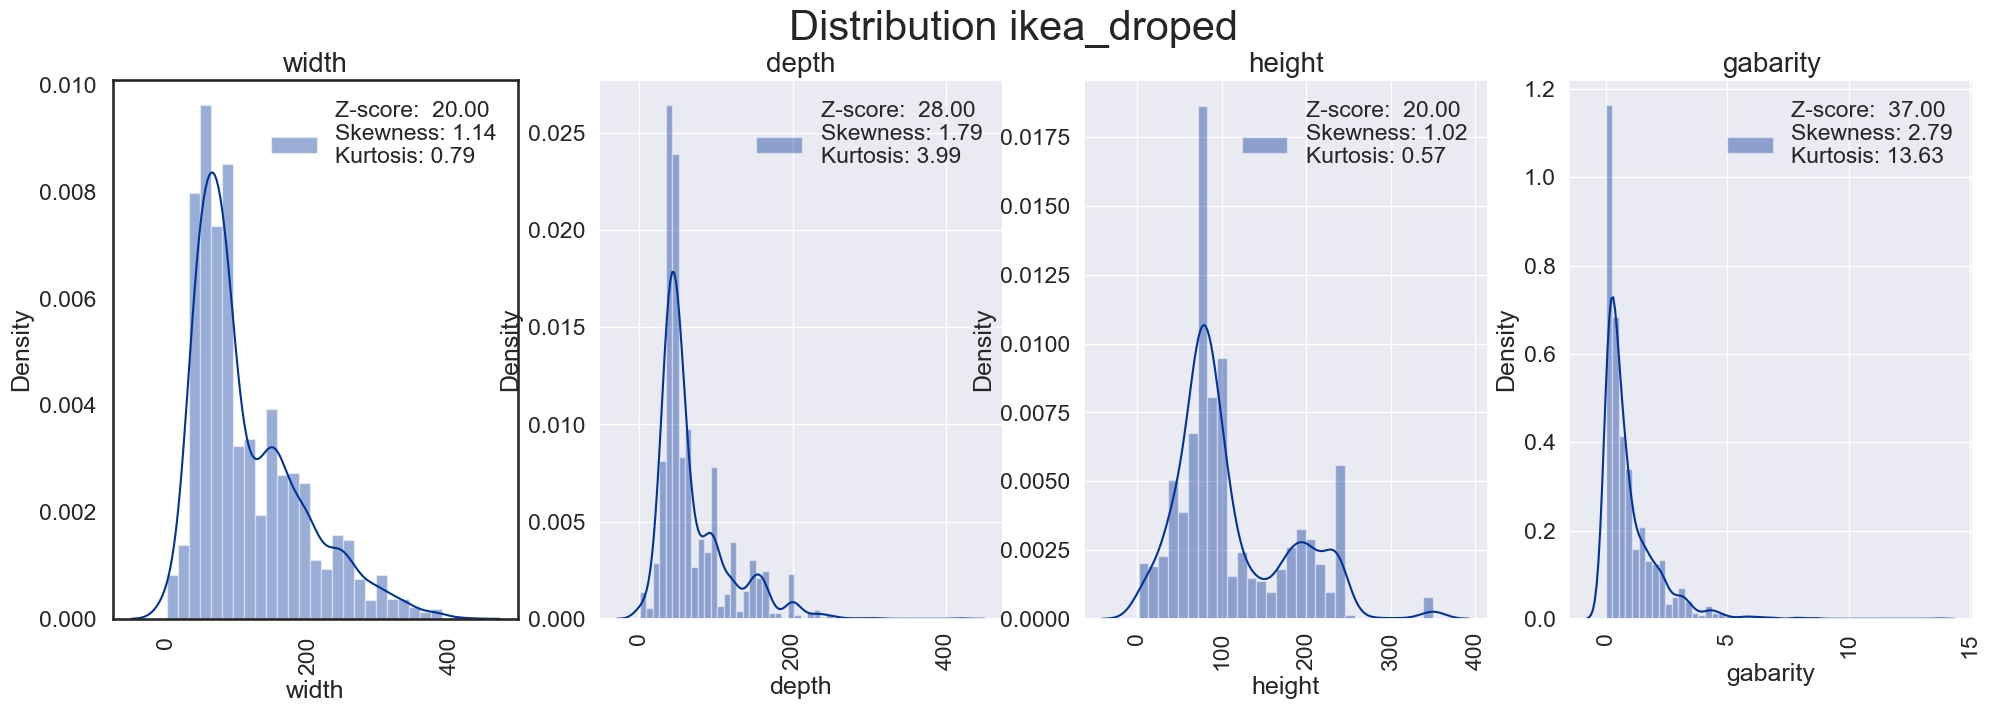

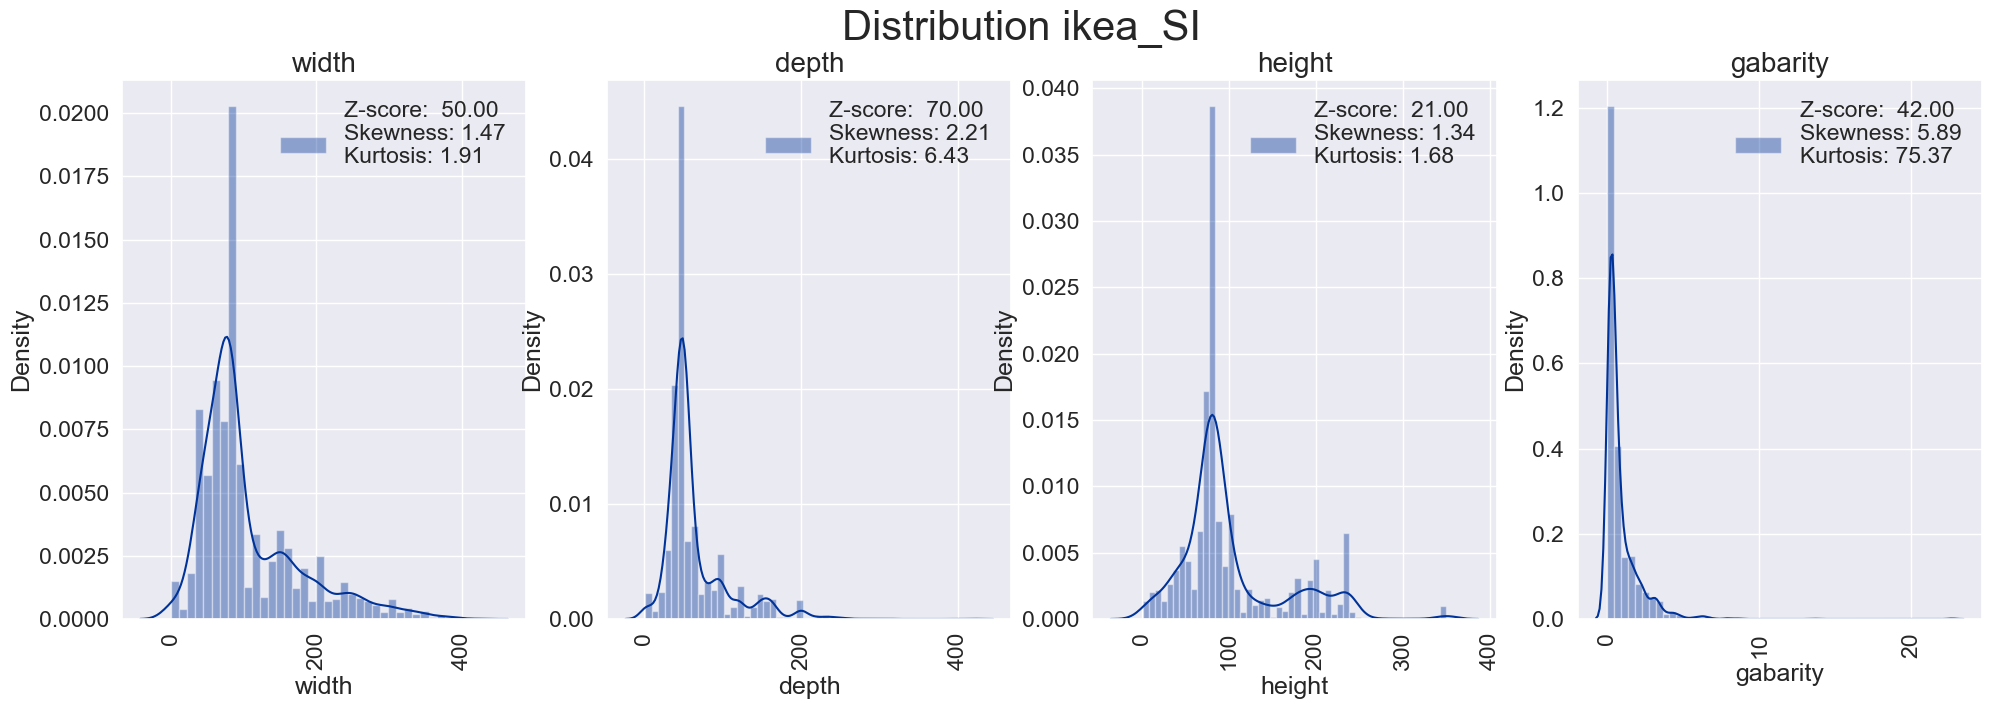

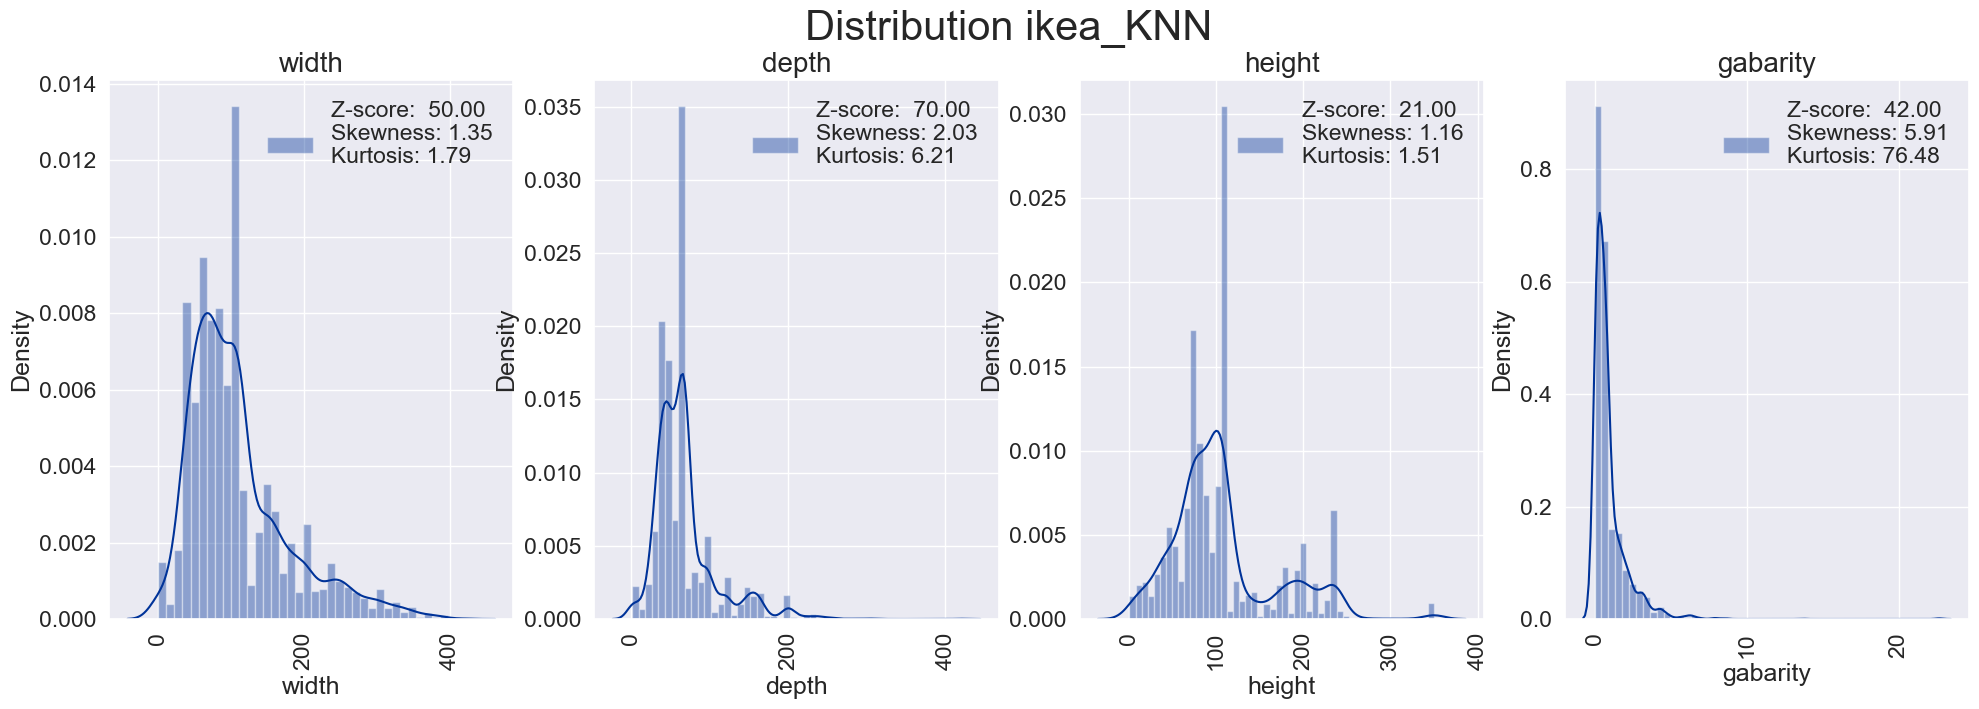

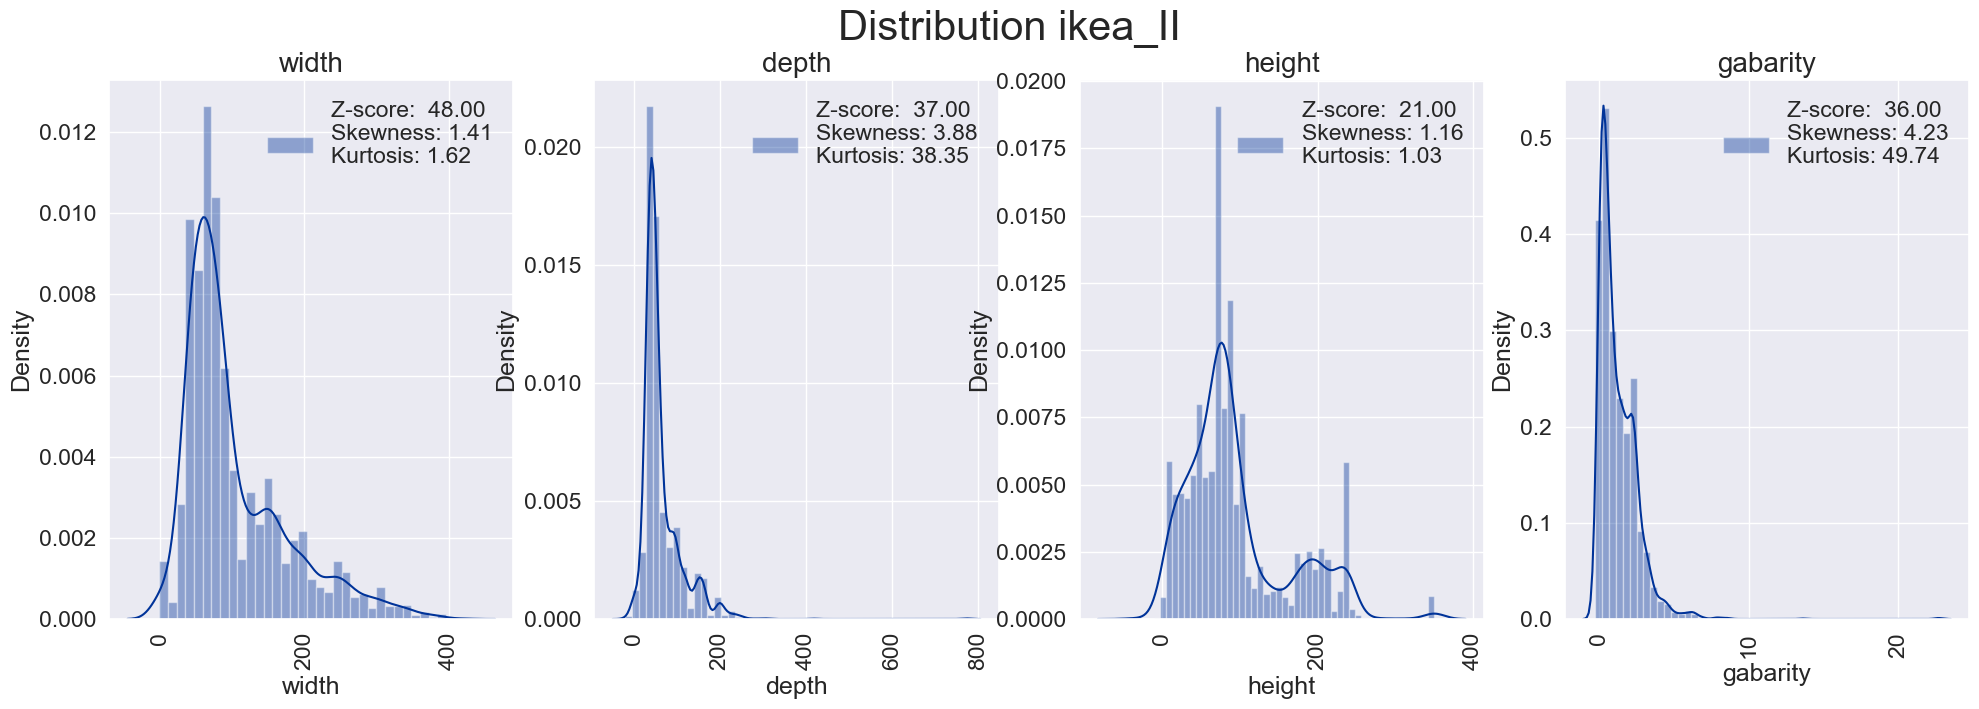

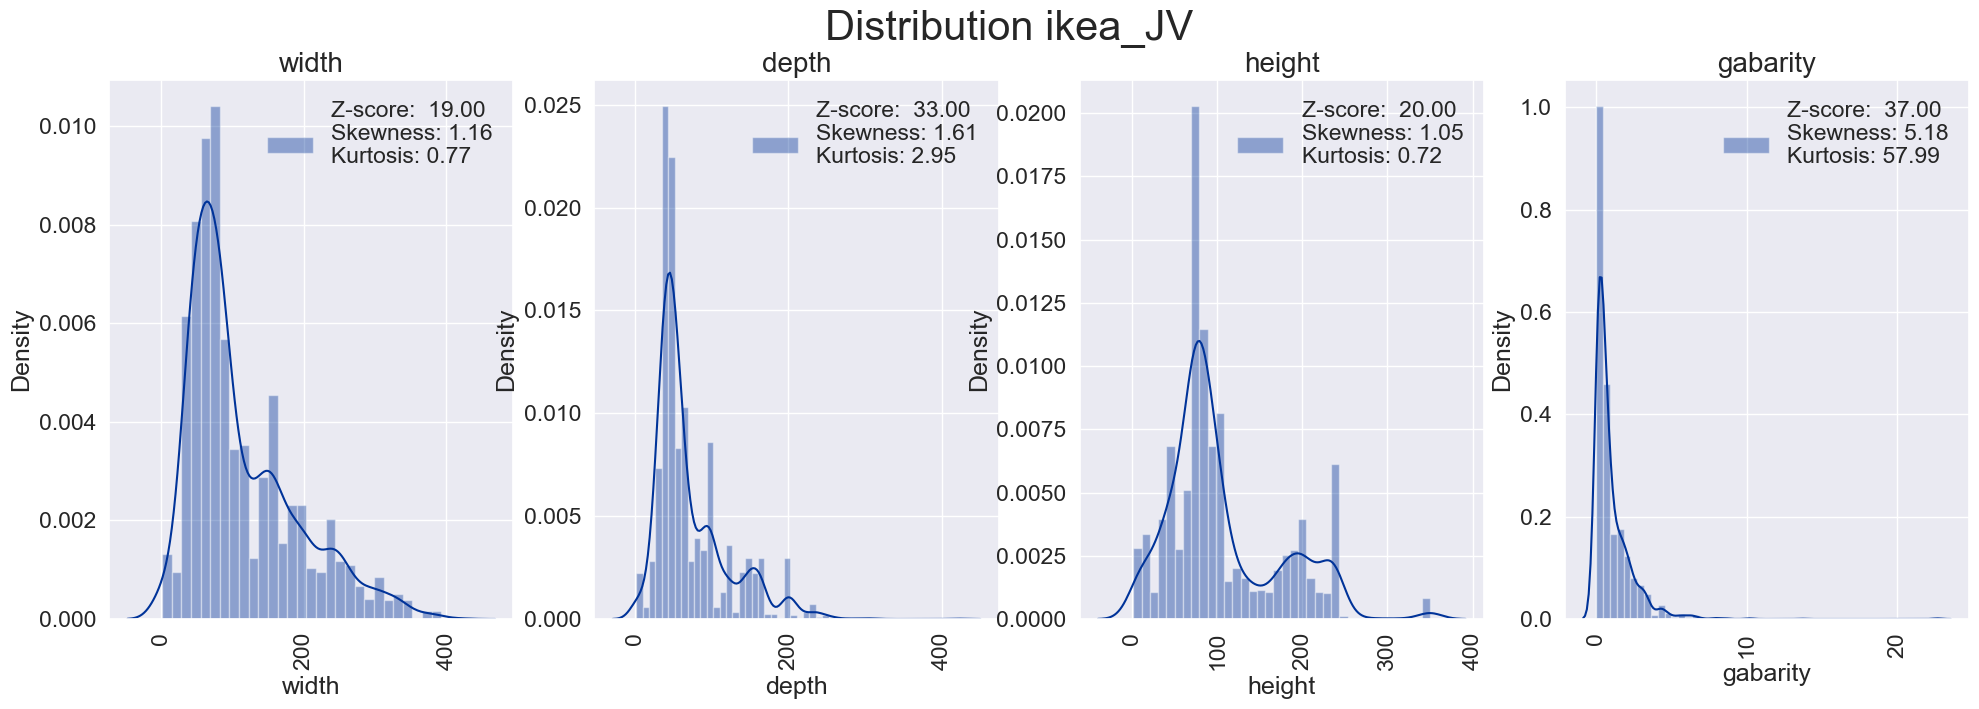

In [349]:
countanalyse('displot', ikea_droped, ['width','depth','height', 'gabarity'], 1,4, 'Distribution ikea_droped','')
countanalyse('displot', ikea_SI, ['width','depth','height', 'gabarity'], 1,4, 'Distribution ikea_SI','')
countanalyse('displot', ikea_KNN, ['width','depth','height', 'gabarity'], 1,4, 'Distribution ikea_KNN','')
countanalyse('displot', ikea_II, ['width','depth','height', 'gabarity'], 1,4, 'Distribution ikea_II','')
countanalyse('displot', ikea_JV, ['width','depth','height', 'gabarity'], 1,4, 'Distribution ikea_JV','')

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">We can see that most sutible JV_Imputer as it has outlines and make minimal cahanges in size destribution. But I want to try  all data to test my assumption </p>

 <h2 style="color:#003399">Set up GridSearchCV to find best estimator(s)</h2>

In [350]:
def bestEstimator(table, imp):
    # remove the highly correlated features
    X = table.drop(["price"], axis=1).copy(deep=True)
    try:
        X.drop(['old_price'], axis=1, inplace=True)
    except:
        pass
    y = table["price"].copy(deep=True)
    R = pd.DataFrame( columns=['split_n','best_estimator','best_param', 'best_score', 'best_index', 'refit_time','data'])
    for split_n in [0.1, 0.2, 0.3]:
    #     create a training and a test set
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=split_n, random_state=42
        )
        # first select the numerical and categorical columns
        cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
        num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

        # pipeline for categorical data
        cat_preprocessing = Pipeline(steps=[
            ('encoder', OneHotEncoder()),

        ])

        # pipeline for numerical data
        num_preprocessing = Pipeline(steps=[
#             ('imputer', imputer),
            ('scaler', StandardScaler()),
        ])

        # combine both pipeline using a columnTransformer
        preprocessing = ColumnTransformer(transformers=[
            ("num", num_preprocessing, num_cols),
            ("cat", cat_preprocessing, cat_cols),
        ])


        # make a pipeline that does everything
        full_pipe = Pipeline(steps=[
            ("preprocess", preprocessing),
            ("regressor", RandomForestRegressor()),
        ])

        param_grid = {
#             "preprocess__num__imputer": [imputer],
            "preprocess__num__scaler": [StandardScaler(), MinMaxScaler(), RobustScaler()],
            "preprocess__cat__encoder": [OneHotEncoder(handle_unknown="ignore")],
            "regressor": [
                KNeighborsRegressor(n_neighbors=16),
                LinearRegression(),
                RandomForestRegressor(random_state=42),
                DecisionTreeRegressor(max_depth=10, random_state=42),
                GradientBoostingRegressor(random_state=0),
                ExtraTreesRegressor(random_state=42),
                BayesianRidge(),
                AdaBoostRegressor(),
                BaggingRegressor(),
                RidgeCV(),
                SVR(kernel='linear'),
                LassoCV(),
            ],
        }

        grid_search = GridSearchCV(
            full_pipe,
            param_grid=param_grid,
            cv=3,
            verbose=1,
            return_train_score=True,
            refit=True,
        )

        grid_search.fit(X_train, y_train)

        R = R.append({'split_n': split_n,
                     'best_estimator': grid_search.best_estimator_,
                     'best_param' : grid_search.best_params_,
                     'best_score' : grid_search.best_score_,
                     'best_index' : grid_search.best_index_,
                     'refit_time' : grid_search.refit_time_,
                     'data': [X_train, X_test, y_train, y_test]
                    },ignore_index = True)
    R.sort_values(by='best_score', ascending=False).reset_index()
    return R

In [351]:
SI=bestEstimator(ikea_SI, 'SimpleImputer')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [352]:
SI_selected=bestEstimator(ikea_SI_selected, 'SimpleImputer')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [353]:
KNN=bestEstimator(ikea_KNN, 'KNNImputer')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [354]:
KNN_selected=bestEstimator(ikea_KNN_selected, 'KNNImputer')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [355]:
II=bestEstimator(ikea_II, 'IterativeImputer')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [356]:
II_selected=bestEstimator(ikea_II_selected, 'IterativeImputer')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [357]:
Droped=bestEstimator(ikea_droped, 'droped')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [358]:
Droped_selected=bestEstimator(ikea_droped_selected, 'droped')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [359]:
JV=bestEstimator(ikea_JV,'JV')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [360]:
JV_selected=bestEstimator(ikea_JV_selected,'JV')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [361]:
droped_f = bestEstimator(droped_full, 'D_F')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [362]:
droped_full_s = bestEstimator(droped_full_selected, 'D_F')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [363]:
def xx(x):
    clear_output(wait=True)
    display(dropvals)
    if x == 'IterativeImputer':
        model = II
    elif x == 'IterativeImputer_selected':
        model = II_selected
    elif x == 'KNNImputer':
        model = KNN
    elif x == 'KNNImputer_selected':
        model = KNN_selected
    elif x == 'SimpleImputer':
        model = SI
    elif x == 'SimpleImputer_selected':
        model = SI_selected
    elif x == 'droped':
        model = Droped
    elif x == 'droped_selected':
        model = Droped_selected
    elif x == 'JvImputer':
        model = JV
    elif x == 'JvImputer_selected':
        model = JV_selected
    elif x == 'droped_rows':
        model = droped_f
    elif x == 'droped_rows_selected':
        model = droped_full_s
    display(model.loc[0,"best_estimator"])
    display(f'best param : {model.loc[0,"best_param"]}')
    print('Split test/train :', model.loc[0,'split_n'])
    print('Best score :', model.loc[0,'best_score'])
    print('HyperParametrs :', model.loc[0, "best_estimator"]["regressor"].get_params().keys() )
#     prediction(model)
#         sns.regplot(x=a.loc[0, 'data'][3], y=y_pred)
#     features(model)

<h2 style="color:#003399">Making dropdown widget</h2>

In [364]:
from IPython.display import clear_output, Image, display
def dropchange(change):
    try:
        if (change['name'] == 'value') and (change['new'] != change['old']):
            return xx(change['new'])
    except:
        pass

In [365]:
import ipywidgets as widgets
dropvals=widgets.Dropdown(
    options=["Choose Imputer Model","droped",
             "droped_selected","droped_rows","droped_rows_selected",'SimpleImputer', "SimpleImputer_selected",
             "KNNImputer", "KNNImputer_selected", 'IterativeImputer', "IterativeImputer_selected",
             'JvImputer', "JvImputer_selected"],
    description='Model with:',)

dropvals.observe(dropchange)

In [366]:
display(dropvals)

Dropdown(description='Model with:', options=('Choose Imputer Model', 'droped', 'droped_selected', 'droped_rows…

<div style="border-style: groove">
<img src="droped.jpg">
<img src="droped_s.jpg">
<img src="si.jpg">
<img src="si_s.jpg">
<img src="knn.jpg">
<img src="knn_s.jpg">
<img src="ii.jpg">
<img src="ii_s.jpg">
<img src="jvi.jpg">
<img src="jvi_s.jpg">
<img src="droped_rows.jpg">
<img src="droped_rows_s.jpg">
</div>

<h2 style="color:#003399">visualising all results in one table</h2>

In [367]:
frames = [Droped.head(1), II.head(1), SI.head(1), KNN.head(1), JV.head(1), Droped_selected.head(1), II_selected.head(1), SI_selected.head(1), KNN_selected.head(1), JV_selected.head(1), droped_f.head(1), droped_full_s.head(1)]
imputer = ['Droped', 'IterativeImputer', 'SimpleImputer', 'KNNImputer', 'JVImputer', 'Droped_selected', 'IterativeImputer_selected', 'SimpleImputer_selected', 'KNNImputer_selected', 'JVImputer_selected','droped_rows','droped_rows_selected']
Best = pd.concat(frames).reset_index()
Best['Imputer']=imputer
Best[['Imputer','split_n','best_estimator','best_param', 'best_score', 'best_index', 'refit_time']]

Imputer  split_n  \
0                      Droped     0.10   
1            IterativeImputer     0.10   
2               SimpleImputer     0.10   
3                  KNNImputer     0.10   
4                   JVImputer     0.10   
5             Droped_selected     0.10   
6   IterativeImputer_selected     0.10   
7      SimpleImputer_selected     0.10   
8         KNNImputer_selected     0.10   
9          JVImputer_selected     0.10   
10                droped_rows     0.10   
11       droped_rows_selected     0.10   

                                       best_estimator  \
0   (ColumnTransformer(transformers=[('num',\n    ...   
1   (ColumnTransformer(transformers=[('num',\n    ...   
2   (ColumnTransformer(transformers=[('num',\n    ...   
3   (ColumnTransformer(transformers=[('num',\n    ...   
4   (ColumnTransformer(transformers=[('num',\n    ...   
5   (ColumnTransformer(transformers=[('num',\n    ...   
6   (ColumnTransformer(transformers=[('num',\n    ...   
7   (ColumnTransformer(transformers=[('num',\n    ...   
8   (ColumnTransformer(transformers=[('num',\n    ...   
9   (ColumnTransformer(transformers=[('num',\n    ...   
10  (ColumnTransformer(transformers=[('num',\n    ...   
11  (ColumnTransformer(transformers=[('num',\n    ...   

                                           best_param  best_score best_index  \
0   {'preprocess__cat__encoder': OneHotEncoder(han...        0.85         21   
1   {'preprocess__cat__encoder': OneHotEncoder(han...        0.86         17   
2   {'preprocess__cat__encoder': OneHotEncoder(han...        0.83         17   
3   {'preprocess__cat__encoder': OneHotEncoder(han...        0.83          5   
4   {'preprocess__cat__encoder': OneHotEncoder(han...        0.86         33   
5   {'preprocess__cat__encoder': OneHotEncoder(han...        0.82         29   
6   {'preprocess__cat__encoder': OneHotEncoder(han...        0.83         26   
7   {'preprocess__cat__encoder': OneHotEncoder(han...        0.80         17   
8   {'preprocess__cat__encoder': OneHotEncoder(han...        0.80         14   
9   {'preprocess__cat__encoder': OneHotEncoder(han...        0.83         17   
10  {'preprocess__cat__encoder': OneHotEncoder(han...        0.54         33   
11  {'preprocess__cat__encoder': OneHotEncoder(han...        0.52         21   

    refit_time  
0         0.61  
1        10.29  
2        10.71  
3        11.68  
4         0.65  
5         2.70  
6         3.99  
7         6.55  
8         4.61  
9         4.84  
10        0.16  
11        0.05

<h2 style="color:#003399">Для сравнения результатов точности модели используем The Root Mean Squared Error (RMSE) (среднеквадратичная логарифмическая ошибка).</h2>

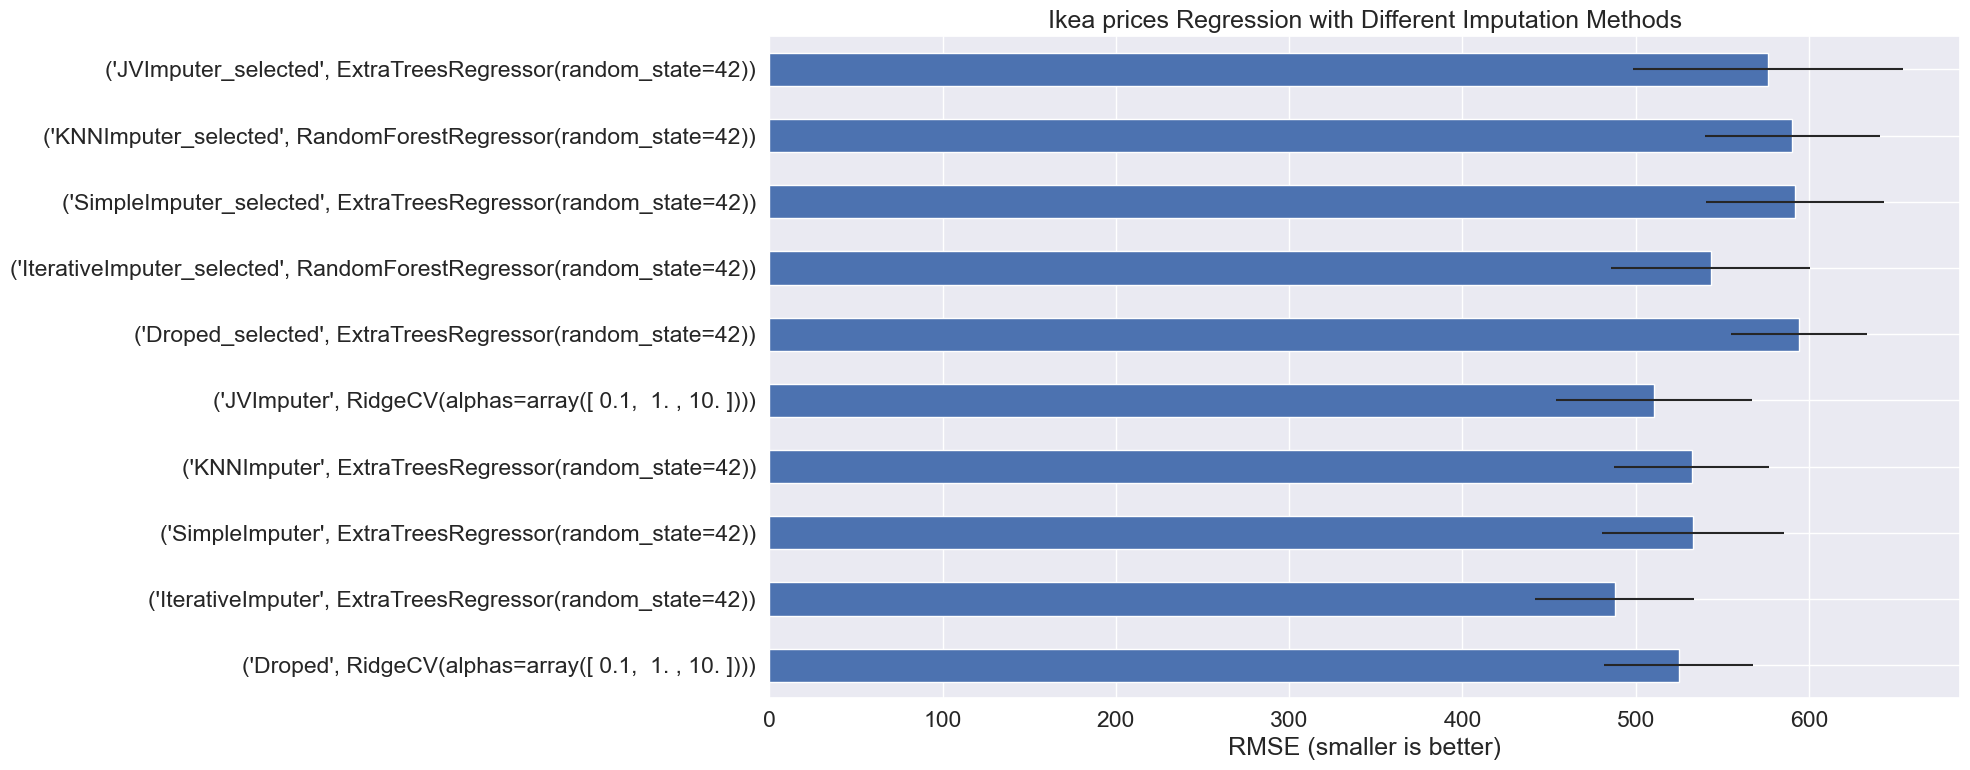

In [368]:
from sklearn.metrics import mean_squared_log_error
score0 = pd.DataFrame()
score0[Best.loc[0,'best_param']["regressor"]] = cross_val_score(Best.loc[0,'best_estimator'], Best.loc[0,'data'][0], Best.loc[0,'data'][2], scoring="neg_root_mean_squared_error",n_jobs = -1)
score1 = pd.DataFrame()
score1[Best.loc[1,'best_param']["regressor"]] = cross_val_score(Best.loc[1,'best_estimator'], Best.loc[1,'data'][0], Best.loc[1,'data'][2], scoring="neg_root_mean_squared_error",n_jobs = -1)
score2 = pd.DataFrame()
score2[Best.loc[2,'best_param']["regressor"]] = cross_val_score(Best.loc[2,'best_estimator'], Best.loc[2,'data'][0], Best.loc[2,'data'][2], scoring="neg_root_mean_squared_error",n_jobs = -1)
score3 = pd.DataFrame()
score3[Best.loc[3,'best_param']["regressor"]] = cross_val_score(Best.loc[3,'best_estimator'], Best.loc[3,'data'][0], Best.loc[3,'data'][2], scoring="neg_root_mean_squared_error",n_jobs = -1)
score4 = pd.DataFrame()
score4[Best.loc[4,'best_param']["regressor"]] = cross_val_score(Best.loc[4,'best_estimator'], Best.loc[4,'data'][0], Best.loc[4,'data'][2], scoring="neg_root_mean_squared_error",n_jobs = -1)
score5 = pd.DataFrame()
score5[Best.loc[5,'best_param']["regressor"]] = cross_val_score(Best.loc[5,'best_estimator'], Best.loc[5,'data'][0], Best.loc[5,'data'][2], scoring="neg_root_mean_squared_error",n_jobs = -1)
score6 = pd.DataFrame()
score6[Best.loc[6,'best_param']["regressor"]] = cross_val_score(Best.loc[6,'best_estimator'], Best.loc[6,'data'][0], Best.loc[6,'data'][2], scoring="neg_root_mean_squared_error",n_jobs = -1)
score7 = pd.DataFrame()
score7[Best.loc[7,'best_param']["regressor"]] = cross_val_score(Best.loc[7,'best_estimator'], Best.loc[7,'data'][0], Best.loc[7,'data'][2], scoring="neg_root_mean_squared_error",n_jobs = -1)
score8 = pd.DataFrame()
score8[Best.loc[8,'best_param']["regressor"]] = cross_val_score(Best.loc[8,'best_estimator'], Best.loc[8,'data'][0], Best.loc[8,'data'][2], scoring="neg_root_mean_squared_error",n_jobs = -1)
score9 = pd.DataFrame()
score9[Best.loc[9,'best_param']["regressor"]] = cross_val_score(Best.loc[9,'best_estimator'], Best.loc[9,'data'][0], Best.loc[9,'data'][2], scoring="neg_root_mean_squared_error",n_jobs = -1)

scores = pd.concat([score0, score1, score2, score3, score4, score5, score6, score7, score8, score9],
              keys=Best['Imputer'].tolist(), axis=1)


# plot imputers results
fig, ax = plt.subplots(figsize=(20, 8))
rmse = -scores.mean()
std = scores.std()
rmse.plot.barh(xerr=std, ax=ax)

ax.set_title("Ikea prices Regression with Different Imputation Methods")
ax.set_xlabel("RMSE (smaller is better)")
ax.set_yticks(np.arange(rmse.shape[0]))
ax.set_yticklabels([label for label in  rmse.index.tolist()])

plt.tight_layout(pad=1)
plt.show()

<h2 style="color:#003399">Choosing best models for next study</h2>

In [369]:
Best=Best[['Imputer','split_n','best_estimator','best_param', 'best_score', 'best_index', 'refit_time']].sort_values(by="best_score", ascending=False)
index4 = Best['Imputer'].index[0]
print(index4)
print(Best.loc[index4, 'Imputer'])
print(Best.loc[index4, 'split_n'])
print(Best.loc[index4, 'best_score'])
print(Best.loc[index4,'best_param']['regressor'].get_params().keys())
# Best.loc[index4, 'best_estimator']

4
JVImputer
0.1
0.8571219962003175
dict_keys(['alpha_per_target', 'alphas', 'cv', 'fit_intercept', 'gcv_mode', 'normalize', 'scoring', 'store_cv_values'])


<img src="4.jpg">

In [370]:
rmse1=pd.DataFrame(rmse).reset_index()
index1=rmse1.sort_values(by=0, ascending=True).head(1).index[0]
print(index1)
print(Best.loc[index1, 'Imputer'])
print(Best.loc[index1, 'split_n'])
print(Best.loc[index1, 'best_score'])
print(Best.loc[index1,'best_param']['regressor'].get_params().keys())
# Best.loc[index1, 'best_estimator']

1
IterativeImputer
0.1
0.8568817261288421
dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


<img src="1.jpg">

In [371]:
index5=5
print(index5)
print(Best.loc[index5, 'Imputer'])
print(Best.loc[index5, 'split_n'])
print(Best.loc[index5, 'best_score'])
print(Best.loc[index5,'best_param']['regressor'].get_params().keys())
# Best.loc[index5, 'best_estimator']

5
Droped_selected
0.1
0.824913854899167
dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


<img src="5.jpg">

In [372]:
index10=10
print(index10)
print(Best.loc[index10, 'Imputer'])
print(Best.loc[index10, 'split_n'])
print(Best.loc[index10, 'best_score'])
print(Best.loc[index10,'best_param']['regressor'].get_params().keys())
# Best.loc[index10, 'best_estimator']

10
droped_rows
0.1
0.5379357720835808
dict_keys(['alpha_per_target', 'alphas', 'cv', 'fit_intercept', 'gcv_mode', 'normalize', 'scoring', 'store_cv_values'])


<img src="10.jpg">

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">Finally, we can examine models and choose best hyperparametrs and re-fit the model using the them and then use it to make predictions on the test set.</p>

<h2 style="color:#003399">Set up GridSearchCV, find best hyperparametrs(s) & Inspect features weight visually</h2>

In [373]:
def bestparam(table, ind, grid_param):

    X1 = table.drop(["price"], axis=1).copy(deep=True)
    try:
        X1.drop(['old_price'], axis=1, inplace=True)
    except:
        pass
    y1 = table["price"].copy(deep=True)
    X1_train, X1_test, y1_train, y1_test = train_test_split(
        X1, y1, test_size=Best.loc[ind, 'split_n'], random_state=42
    )
    # first select the numerical and categorical columns
    cat_cols = X1.select_dtypes(include=["object"]).columns.tolist()
    num_cols = X1.select_dtypes(exclude=["object"]).columns.tolist()

    # pipeline for categorical data
    cat_preprocessing = Pipeline(steps=[
       ('onehot', Best.loc[ind, 'best_param']['preprocess__cat__encoder']),
    ])
    # pipeline for numerical data
    num_preprocessing = Pipeline(steps=[
        ('scaler', Best.loc[ind, 'best_param']['preprocess__num__scaler']),
    ])
    # combine both pipeline using a columnTransformer
    preprocessing = ColumnTransformer(transformers=[
        ("num", num_preprocessing, num_cols), 
        ("cat", cat_preprocessing, cat_cols),
    ])
    # make a pipeline that does everything 
    pipe = Pipeline(steps=[
        ("preprocess", preprocessing),
        ("regressor", Best.loc[ind,'best_param']['regressor']),
    ])

    grid = GridSearchCV(
        pipe,
        param_grid=grid_param,
        verbose=1,
        cv=5,
        return_train_score=True,
        refit=True,
    )

    grid.fit(X1_train, y1_train)

    import sklearn as sk
    print('Best Param :', grid.best_params_)
    print('Best Score :', grid.best_score_)
    print(' ')
    print("Feature Importance")
    print(".......................................................................")
#   Inspect coefficients visually
    sns.set(style="whitegrid")
    if str(Best.loc[ind,'best_estimator']['regressor']) == 'RidgeCV(alphas=array([ 0.1,  1. , 10. ]))':
        model_coef = grid.best_estimator_.named_steps["regressor"].coef_
    else:
        model_coef = grid.best_estimator_.named_steps["regressor"].feature_importances_
    sns.barplot(y=X1_train.columns.array, x=model_coef)
    plt.ylabel('Feature')
    plt.xlabel('Relative Importance (%)')
    plt.title(f'{Best.loc[ind,"best_param"]["regressor"]} - Feature Importance')
    plt.tight_layout();
    plt.show()
#   Fit with best parameter(s)
    pipe.set_params(**grid.best_params_)
    pipe.fit(X1_train, y1_train)
#   Predict and print metrics on test set
    prediction = pipe.predict(X1_test)
    
    print('R^2_train :', pipe.score(X1_train, y1_train))
    print('R^2_test :', pipe.score(X1_test, y1_test))
    print("R-2 :{:.5f}".format(sk.metrics.r2_score(y1_test, prediction)))
    print("MAE :{:.5f}".format(sk.metrics.mean_absolute_error(prediction, y1_test)))
    print("RMSE: {:.5f}".format(np.sqrt(sk.metrics.mean_squared_error(prediction, y1_test))))
    
#   Here we can see how the features are correlated to the model predictions.
    
    test = pd.DataFrame({'Predicted value':prediction, 'Actual value':y1_test})
    fig= plt.figure(figsize=(16,8))
    test = test.reset_index()
    test = test.drop(['index'],axis=1)
    plt.plot(test[:50])
    plt.legend(['Actual value','Predicted value'])

    
    fig= plt.figure(figsize=(16,8))
    sns.regplot(x=y1_test, y=grid.predict(X1_test))
    

<div style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">
<h5>ExtraTreesRegressor</h5>

<p>This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.</p>

<h5>RidgeCV</h5>

<p>Ridge regression with built-in cross-validation.
Ridge model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm.</p></div>

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">Searching params for data with IterativeImputer, MinMaxScaler, OneHotEncoder and ExtraTreesRegressor and make prediction</p>

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Param : {'regressor__criterion': 'squared_error', 'regressor__max_depth': 100, 'regressor__max_features': 'auto', 'regressor__n_estimators': 500}
Best Score : 0.8747034350953715
 
Feature Importance
.......................................................................


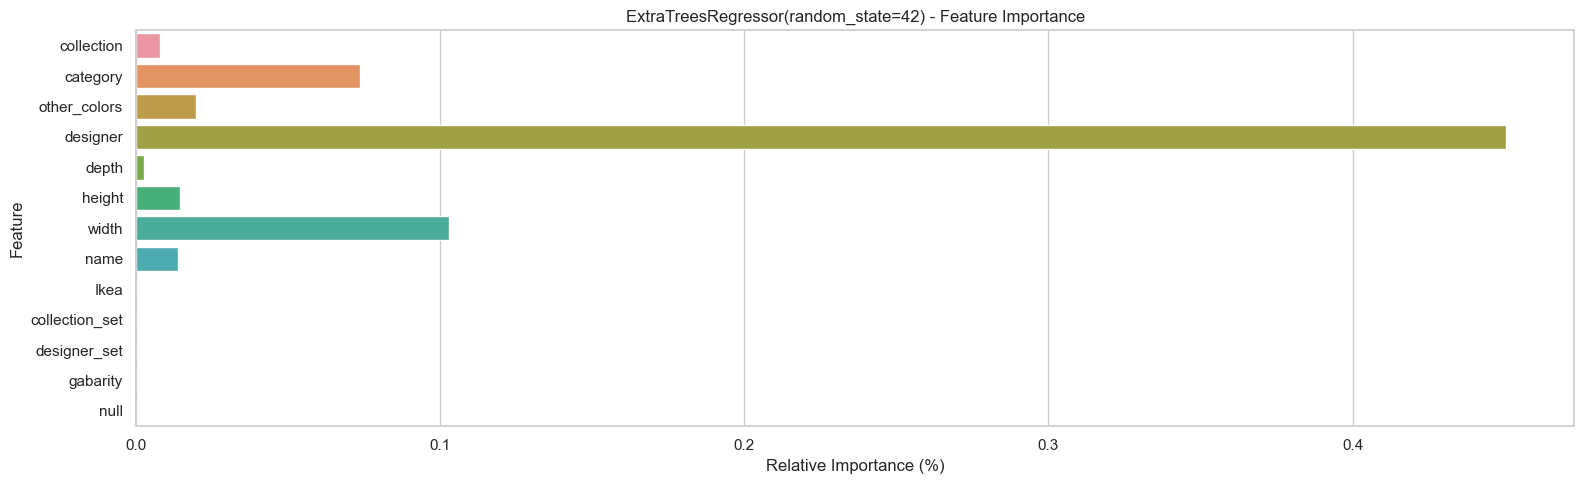

R^2_train : 0.9964020431686159
R^2_test : 0.9165794202011376
R-2 :0.91658
MAE :198.55852
RMSE: 403.29960


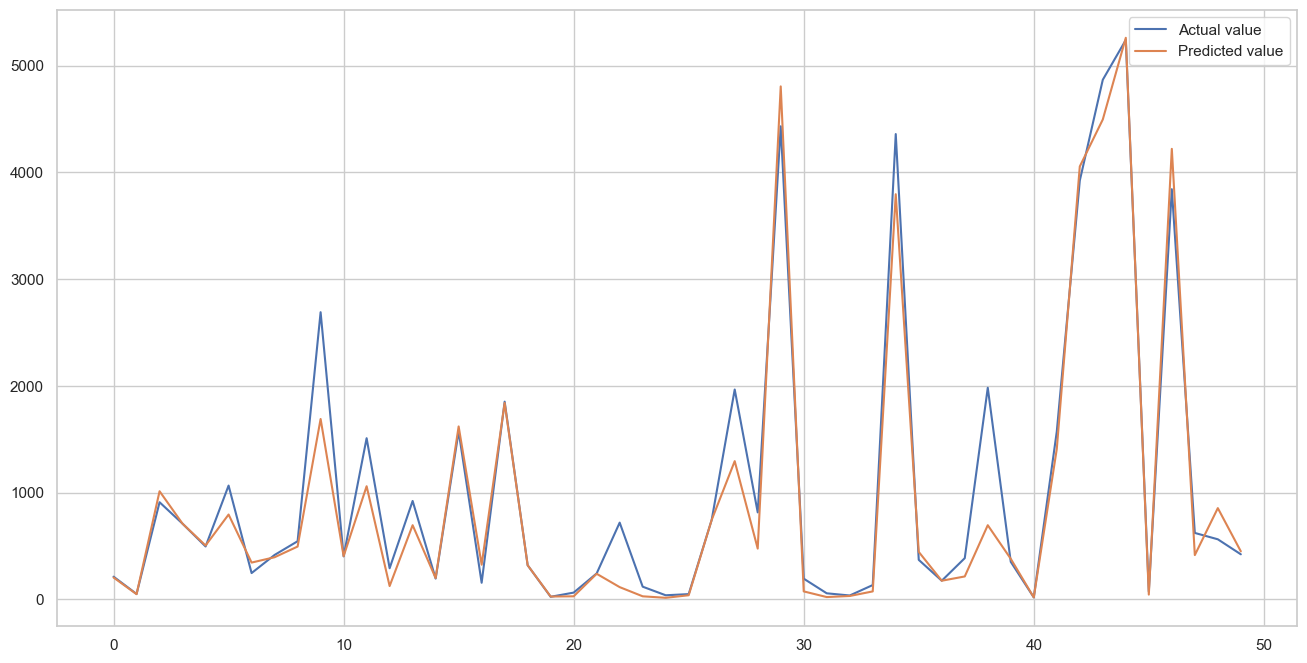

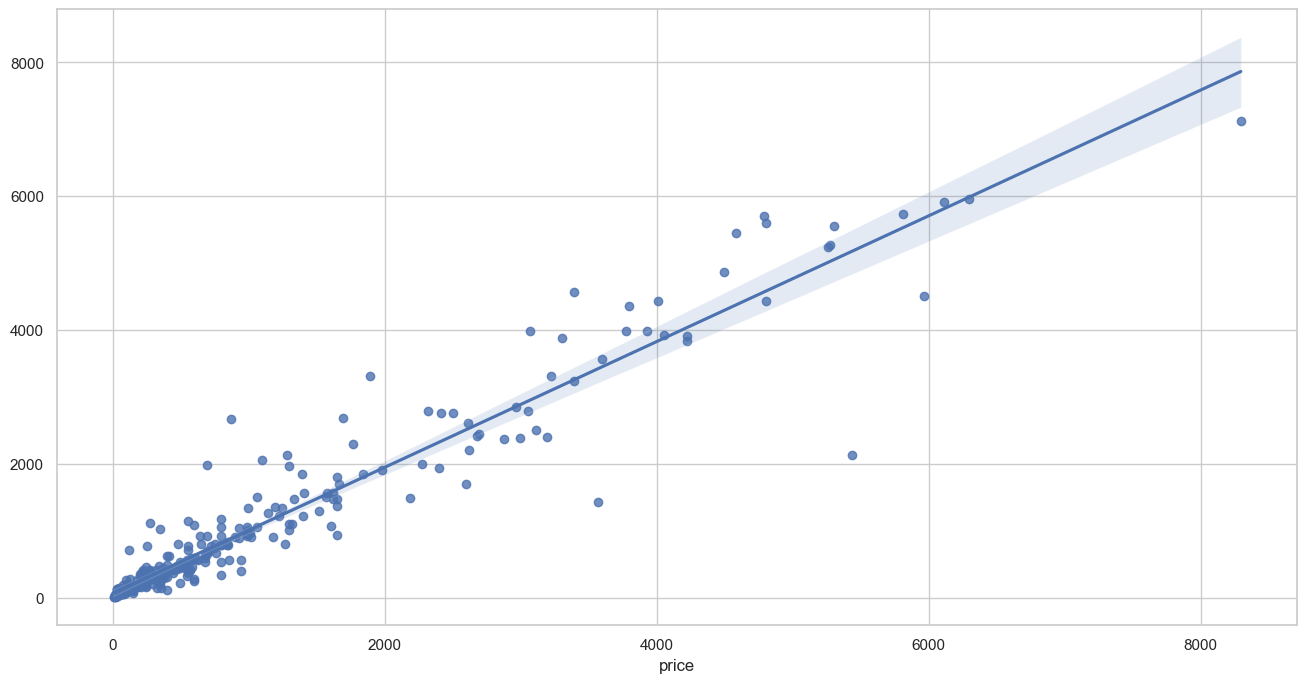

In [374]:
bm_iterative = bestparam(ikea_II, 1,         {
                    'regressor__n_estimators': [100,500],
                    'regressor__criterion': ['squared_error','mse'],
                    'regressor__max_depth': [2,100],
#                     'regressor__min_samples_split': [2,4,6],
#                     'regressor__min_samples_leaf': [1,2],
                    'regressor__max_features': ['auto','sqrt','log2', 1.0],    
#                     'regressor__bootstrap': [True, False],
#                     'regressor__warm_start': [True, False],
                    })

<div style="border-style:solid; border-color: red;">
    <h3 style="color:#003399;text-align: center;">$IterativeImputer,\;  MinMaxScaler,\; OneHotEncoder\; \&\; ExtraTreesRegressor$</h3>
    <h3 style="color:#003399">$$R^2-score\;=\;0.91658$$</h3>  
    <h3 style="color:#003399">$$RMSE\;=\;403.29$$</h3>
    </div>

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">Searching params for data with MyOwnImputer, RobustScaler, OneHotEncoder and RedgeCV and make prediction</p>

In [ ]:
bm_JV = bestparam(ikea_JV, 4, {
                    'regressor__fit_intercept':[True, False],
                    'regressor__gcv_mode':[ 'svd', 'auto', 'eigen']
                    })

<div style="border-style:groove;">
<p style="color:#003399;text-align: center;">MyOwnImputer, RobustScaler, OneHotEncoder and RedgeCV</p>
<p style="color:#003399;text-align: center;">$R^2-score\;=\;0.89129$</p>
<p style="color:#003399;text-align: center;">$RMSE\;=\;435.85$</p></div>

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">Searching params for data with droped NaN selected features RobustScaler, OneHotEncoder and ExtraTreesRegressor and make prediction.</p>

In [ ]:
bm_Droped_selected = bestparam(ikea_droped_selected, 5, {'regressor__n_estimators': [100,500],
                                                        'regressor__criterion': ['squared_error','mse'],
                                                        'regressor__max_depth': [2,100],
                                    #                     'regressor__min_samples_split': [2,4,6],
                                    #                     'regressor__min_samples_leaf': [1,2],
                                                        'regressor__max_features': ['auto','sqrt','log2', 1.0],    
                                    #                     'regressor__bootstrap': [True, False],
                                    #                     'regressor__warm_start': [True, False],
                    })

Fitting 5 folds for each of 32 candidates, totalling 160 fits


<div style="border-style:groove">
<p style="color:#003399;text-align: center;">droped NaN selected features RobustScaler, OneHotEncoder and ExtraTreesRegressor</p>
<p style="color:#003399;text-align: center;">$R^2-score\;=\;0.89357$</p>
<p style="color:#003399;text-align: center;">$RMSE\;=\;477.39$</p></div>

In [ ]:
bm_droped_rows = bestparam(droped_full, 10, {
                    'regressor__fit_intercept':[True, False],
                    'regressor__gcv_mode':[ 'svd', 'auto', 'eigen']
                    })

<div style="border-style:groove">
<p style="color:#003399;text-align: center;">$DropedRows,\; RobustScaler,\; OneHotEncoder\; and RidgeCV$</p>
<p style="color:#003399;text-align: center;">$R^2-score\;=\;0.89357$</p>
<p style="color:#003399;text-align: center;">$RMSE\;=\;477.39$</p></div>

<p style="color:#ffcc00; background-color:#003399; padding: 10px; font-size: 16px">Now we can improve result exemining model with more parametrs or droping outlines</p>

In [ ]:
# ikea_droped['w']=stats.zscore(ikea_droped['width'].to_numpy(),ddof=0, nan_policy='omit')
# ikea_droped['h']=stats.zscore(ikea_droped['height'].to_numpy(),ddof=0, nan_policy='omit')
# ikea_droped['d']=stats.zscore(ikea_droped['depth'].to_numpy(),ddof=0, nan_policy='omit')
# ikea_droped['g']=stats.zscore(ikea_droped['gabarity'].to_numpy(),ddof=0, nan_policy='omit')

# ikea_w = ikea_droped[ikea_droped['w']>3].index
# ikea_h = ikea_droped[ikea_droped['h']>3].index
# ikea_d = ikea_droped[ikea_droped['d']>3].index
# ikea_g = ikea_droped[ikea_droped['g']>3].index

# lst= [*ikea_w, *ikea_h, *ikea_d, *ikea_g]
# s = [*set(lst)]

# ikea_droped = ikea_droped.drop(labels=s, axis=0)

# ikea_droped.drop(columns=['w','d','g','h'], inplace=True)
# ikea_droped.shape